# Statisitical Analaysis of Electoral Patterns in Indian Democaracy (1977 - 2015 )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loksabha Election Dataset (1977 - 2015)

In [2]:
df_lok = pd.read_csv("https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-lok-sabha.csv")
df_vidhan = pd. read_csv("https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-vidhan-sabha.csv")

In [3]:
df_vidhan.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


### 1. Party Abbreviation Cleaning
a. Create a mapping of each party name to its most frequently used abbreviation
based on available data.

b. Use the mapping to fill in missing party abbreviations in the dataset.

c. Fill any remaining blanks with 'IND' to indicate independent candidates.

d. Summarize what you observe—e.g., which parties appear most often and what
that might indicate about election trends or major parties.

a. Create a mapping of each party name to its most frequently used abbreviation
based on available data.

In [4]:
# Combine both dataset
combined_df = pd.concat([df_lok[['partyname', 'partyabbre']], df_vidhan[['partyname', 'partyabbre']]])

# Drop rows where partyname is missing
combined_df = combined_df.dropna(subset=['partyname'])

# Create mapping: for each party name, find the most frequent abbreviation used
mapping = (
    combined_df
    .dropna(subset=['partyabbre'])  # Keep only rows where abbreviation is present
    .groupby('partyname')['partyabbre']
    .agg(lambda x: x.mode().iloc[0])  # Pick the most common abbreviation (mode)
    .to_dict()
)

b. Use the mapping to fill in missing party abbreviations in the dataset.

In [5]:
df_vidhan['partyabbre'].value_counts().head(50)

,count
partyabbre,
IND,161929
INC,27036
BJP,19886
BSP,13014
SP,5137
JNP,5114
JD,4647
CPM,4071
CPI,4021


In [6]:
# Function to fill missing abbreviation
def fill_partyabbre(row):
    if pd.isna(row['partyabbre']):
        return mapping.get(row['partyname'], 'IND')  # If not in mapping, assume 'IND' (independent)
    return row['partyabbre']

# Call the function to fill missing abbreviations in both datasets
df_lok['partyabbre'] = df_lok.apply(fill_partyabbre, axis=1)
df_vidhan['partyabbre'] = df_vidhan.apply(fill_partyabbre, axis=1)

In [7]:
# Most frequent parties across both datasets
party_counts = pd.concat([df_lok, df_vidhan])['partyname'].value_counts().head(10)

print("\nSample of Filled Data (Lok Sabha):")
print(df_lok[['partyname', 'partyabbre']].head())

print("\nSample of Filled Data (Vidhan Sabha):")
print(df_vidhan[['partyname', 'partyabbre']].head())


Sample of Filled Data (Lok Sabha):
                  partyname partyabbre
0              Independents        IND
1  Indian National Congress        INC
2              Independents        IND
3              Independents        IND
4              Independents        IND

Sample of Filled Data (Vidhan Sabha):
                      partyname partyabbre
0                   Independent        IND
1                   Independent        IND
2      Indian National Congress        INC
3  Indian National Congress (I)     INC(I)
4                  Janata Party        JNP


c. Fill any remaining blanks with 'IND' to indicate independent candidates.

In [8]:
# Final check: Fill any remaining NaNs with 'IND'
df_lok['partyabbre'] = df_lok['partyabbre'].fillna('IND')
df_vidhan['partyabbre'] = df_vidhan['partyabbre'].fillna('IND')

In [9]:
df_vidhan.isnull().sum()

,0
st_name,0
year,0
ac_no,0
ac_name,16083
ac_type,0
cand_name,0
cand_sex,5302
partyname,0
partyabbre,0
totvotpoll,7


In [10]:
df_lok.isnull().sum()

,0
st_name,0
year,0
pc_no,0
pc_name,0
pc_type,8070
cand_name,0
cand_sex,542
partyname,0
partyabbre,0
totvotpoll,0


d. Summarize what you observe—e.g., which parties appear most often and what
that might indicate about election trends or major parties.

### Summary of Observations

**Independent Candidates** are the most frequent, with **over 2 lakh entries**, reflecting strong **local-level political participation**.

1. **Major National Parties**:
    * **INC (Congress)** has the highest number of candidates (~32,000), showing its **long-standing national presence**.
    * **BJP** follows (~16,000), indicating its **growth as a national power**.
    * **BSP** also shows a significant footprint (~15,000), especially in **northern states**.
    * **Janata Party** (~5,000) was prominent **historically**, but has **declined post-1990s**.

2. **Overall Trends**:
    * India’s elections reflect a **multi-party system** with both **national** and **strong regional players**.
    * **Congress and BJP** dominate at the **national level**.
    * The large number of **independent and regional party candidates** highlights India’s **diverse and participatory democracy**.


## 2.Standardize Abbreviations
a. Replace Variations of Party Abbreviations to avoid treating the same party as
different due to minor label differences.

b. Update inconsistent abbreviations (e.g., change 'INC(I)' to 'INC') to ensure
standard naming across the dataset.

a. Replace Variations of Party Abbreviations to avoid treating the same party as different due to minor label differences.

In [11]:
standardization_mapping = {
    # Indian National Congress variations
    'INC(I)': 'INC',
    'INCU': 'INC',
    'INC(U)': 'INC',
    'INCJ': 'INC',
    'INC(J)': 'INC',

    # BJP variations
    'BJP(U)': 'BJP',
    'BJPS': 'BJP',

    # Independent variations
    'Independent': 'IND',
    'Independents': 'IND',
    'INDEPENDENT': 'IND',

    # Communist Party variations
    'CPI(ML)': 'CPI',
    'CPI(M)': 'CPM',
    'CP': 'CPI',

    # BSP variations
    'BSP(A)': 'BSP',
    'BSPS': 'BSP',

    # Janata Party variations
    'JNP': 'JP',
    'JNP(JP)': 'JP',
    'JNP(SC)': 'JP',
    'JD': 'JP'
}


b. Update inconsistent abbreviations (e.g., change 'INC(I)' to 'INC') to ensure standard naming across the dataset.

In [12]:
# Define a function to standardize abbreviations using the above mapping
def standardize_abbreviation(abbr):
    if pd.isna(abbr):
        return abbr
    abbr = abbr.strip().upper()
    return standardization_mapping.get(abbr, abbr)

# Apply standardization to both Lok Sabha and Vidhan Sabha datasets
df_lok['partyabbre'] = df_lok['partyabbre'].apply(standardize_abbreviation)
df_vidhan['partyabbre'] = df_vidhan['partyabbre'].apply(standardize_abbreviation)

In [13]:
print("Remaining variants in Lok Sabha data:", df_lok['partyabbre'])
print("\nRemaining variants in Vidhan Sabha data:", df_vidhan['partyabbre'])

Remaining variants in Lok Sabha data: 0         IND
1         INC
2         IND
3         IND
4         IND
         ... 
73076    NOTA
73077     INC
73078     BJP
73079     CPM
73080    AITC
Name: partyabbre, Length: 73081, dtype: object

Remaining variants in Vidhan Sabha data: 0          IND
1          IND
2          INC
3          INC
4           JP
          ... 
327289     IND
327290     BSP
327291     BJP
327292     CPM
327293    AITC
Name: partyabbre, Length: 327294, dtype: object


In [14]:
print("Unique party abbreviations in Lok Sabha:")
print(df_lok['partyabbre'].value_counts().head(10))

print("\nUnique party abbreviations in Vidhan Sabha:")
print(df_vidhan['partyabbre'].value_counts().head(10))

Unique party abbreviations in Lok Sabha:
partyabbre
IND     41127
INC      5504
BJP      3350
BSP      2655
JP       2169
SP       1057
CPM       770
DDP       716
CPI       696
NOTA      543
Name: count, dtype: int64

Unique party abbreviations in Vidhan Sabha:
partyabbre
IND    163127
INC     31453
BJP     20053
JP      14561
BSP     13191
SP       5137
CPM      4412
CPI      4082
DDP      3620
NCP      2851
Name: count, dtype: int64


## 3.Data Type & Missing Value Handling

a. Convert Year Column to Integer format for correct sorting and analysis.

b. Fill Missing Candidate Gender with 'U' (unknown) to maintain completeness.

c. Drop Rows with Missing Total Vote Polled

a. Convert Year Column to Integer format for correct sorting and analysis.

In [15]:
# Convert 'year' column to integer for both datasets
df_lok['year'] = pd.to_numeric(df_lok['year'], errors='coerce')
df_vidhan['year'] = pd.to_numeric(df_vidhan['year'], errors='coerce')

df_lok['year'] = df_lok['year'].dropna().astype(int).astype('Int64')
df_vidhan['year'] = df_vidhan['year'].dropna().astype(int).astype('Int64')

# Verify the conversion
print("Lok Sabha year dtype:", df_lok['year'].dtype)
print("Vidhan Sabha year dtype:", df_vidhan['year'].dtype)

# Display unique years in both datasets to confirm the conversion worked correctly
print("\nUnique years in Lok Sabha data:", sorted(df_lok['year'].unique()))
print("Unique years in Vidhan Sabha data:", sorted(df_vidhan['year'].unique()))

Lok Sabha year dtype: Int64
Vidhan Sabha year dtype: Int64

Unique years in Lok Sabha data: [np.int64(1977), np.int64(1980), np.int64(1984), np.int64(1989), np.int64(1991), np.int64(1996), np.int64(1998), np.int64(1999), np.int64(2004), np.int64(2009), np.int64(2014)]
Unique years in Vidhan Sabha data: [np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1987), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015)]


b. Fill Missing Candidate Gender with 'U' (unknown) to maintain completeness.

In [16]:
df_lok['cand_sex'] = df_lok['cand_sex'].fillna('U')
df_vidhan['cand_sex'] = df_vidhan['cand_sex'].fillna('U')

print("Lok Sabha missing gender values:", df_lok['cand_sex'].isnull().sum())
print("Vidhan Sabha missing gender values:", df_vidhan['cand_sex'].isnull().sum())

Lok Sabha missing gender values: 0
Vidhan Sabha missing gender values: 0


c. Drop Rows with Missing Total Vote Polled

In [17]:
# Drop rows in which totvotpoll is missing in both datasets
df_lok = df_lok.dropna(subset=['totvotpoll'])
df_vidhan = df_vidhan.dropna(subset=['totvotpoll'])

# Check for remaining null values
print("Missing values in df_lok:\n", df_lok['totvotpoll'].isnull().sum())
print("\nMissing values in df_vidhan:\n", df_vidhan['totvotpoll'].isnull().sum())

Missing values in df_lok:
 0

Missing values in df_vidhan:
 0


## 4. Filling Missing Assembly Names
a. Build a mapping of each (state, constituency number) pair to the most frequently
used assembly constituency name (ac_name).

b. Use this mapping to fill in missing ac_name values wherever possible.

c. Report how many values are still missing after filling.

d. Briefly explain how this improves data quality by using the most common name
for each constituency.

a. Build a mapping of each (state, constituency number) pair to the most frequently used assembly constituency name (ac_name).

In [18]:
# Build a mapping of most common ac_name for each (state, constituency no)
ac_name_map = (
df_vidhan[~df_vidhan['ac_name' ].isna() ] # filter out rows where ac _name is not missing
.groupby(['st_name', 'ac_no' ]) ['ac_name' ]
.agg(lambda x: x.value_counts().idxmax()) # get the most common name in each group
)

# Preview few mappings
print("Sample constituency name mapping:")
for k, v in list(ac_name_map.items())[:5]:
    print(f"{k} → {v}")

Sample constituency name mapping:
('Andhra Pradesh', 1) → Ichapuram
('Andhra Pradesh', 2) → Sompeta
('Andhra Pradesh', 3) → Tekkali
('Andhra Pradesh', 4) → Mancherial
('Andhra Pradesh', 5) → Narasannapeta


b. Use this mapping to fill in missing ac_name values wherever possible.

In [19]:
## define a function to fill misssing ac_name
def fill_ac_name(row):
  if pd.isna(row['ac_name']):
    return ac_name_map.get((row['st_name'], row['ac_no']), np.nan)
  return row['ac_name' ]

df_vidhan['ac_name'] = df_vidhan.apply(fill_ac_name ,axis=1)
print(df_vidhan['ac_name'].isnull().sum())

0


c. Report how many values are still missing after filling

In [20]:
# Count remaining missing ac_name values
missing_ac_names = df_vidhan['ac_name'].isnull().sum()
print(f"\nTotal missing 'ac_name' values after filling: {missing_ac_names}")


Total missing 'ac_name' values after filling: 0


d. Briefly explain how this improves data quality by using the most common name for each constituency.

### Summary – Improving Data Quality by Filling Assembly Names

Filling missing `ac_name` values using the **most common name** for each *(state, constituency number)* pair ensures **consistency and completeness** in the dataset.

This step helps in the following ways:

- Reduces **ambiguity** caused by spelling variations or missing values.
- Enables **accurate grouping, filtering, and analysis** of constituency-wise data.
- Supports **reliable trend analysis**, **regional comparisons**, and **data visualizations**.
- Is especially crucial when working with **long-term election data across multiple years**.


## 5. Initial Data Exploration – Lok Sabha Dataset
a. Check dataset size to see the number of rows and columns.

b. Preview the data to understand its structure.

c. Inspect data types and missing values for column types and for column-wise
missing value counts.

d. In your report, provide a short summary of what you observe—such as the
number of records, key columns, and any data quality issues.

a. Check dataset size to see the number of rows and columns

In [21]:
print("Dataset size (rows, columns):", df_lok.shape)

Dataset size (rows, columns): (73081, 11)


b. Preview the data to understand its structure.

In [22]:
df_lok.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


c. Inspect data types and missing values for column types and for column-wise missing value counts.

In [23]:
# Data types
print("\nData types of each column:")
print(df_lok.dtypes)

# Column-wise missing value counts
print("\nMissing values per column:")
print(df_lok.isnull().sum())


Data types of each column:
st_name       object
year           Int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object

Missing values per column:
st_name          0
year             0
pc_no            0
pc_name          0
pc_type       8070
cand_name        0
cand_sex         0
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64


d. In your report, provide a short summary of what you observe—such as the
number of records, key columns, and any data quality issues.

### Summary

The dataset covers details such as:

- State  
- Year  
- Constituency  
- Candidate  
- Party  
- Votes  
- Position

**Key columns** include:
- year, state_name, constituency_no, candidate_name, party_abbreviation, votes, and position


## 6. Handling Missing Values – Lok Sabha Dataset
a. Fill missing candidate gender (cand_sex) with 'U' for unknown.

b. Fill missing parliamentary constituency type (pc_type) with 'Unknown'.

c. Check for any remaining missing values

d. In your report, explain why these steps were taken.

a. Fill missing candidate gender (cand_sex) with 'U' for unknown.

In [24]:
df_lok['cand_sex'] = df_lok['cand_sex'].fillna('U')

# Verify after filling
print("\nAfter filling - Missing values in cand_sex:")
print("Lok Sabha:", df_lok['cand_sex'].isnull().sum())


After filling - Missing values in cand_sex:
Lok Sabha: 0


b. Fill missing parliamentary constituency type (pc_type) with 'Unknown'


In [25]:
df_lok['pc_type'] = df_lok['pc_type'].fillna('Unknown')

# Verify after filling
print("Lok Sabha:", df_lok['pc_type'].isnull().sum())

Lok Sabha: 0


c. Check for any remaining missing values

In [26]:
print("Remaining missing values in Lok Sabha dataset:")
print(df_lok.isnull().sum())

Remaining missing values in Lok Sabha dataset:
st_name       0
year          0
pc_no         0
pc_name       0
pc_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64


d. In your report, explain why these steps were taken.

### Summary

Filling missing values in `cand_sex` with **'U' (Unknown)** and in `pc_type` with **'Unknown'** ensures **data completeness** without introducing inaccurate assumptions.

**Why this matters**:
- Maintains the **usability of the dataset** for analysis.
- Clearly indicates that the information was **originally missing**, preserving **transparency**.
- Avoids **unnecessary record removal**, which could reduce the data size or bias the analysis.
- Ensures **consistency** for **statistical summaries** and **grouping operations**.

This approach provides a balanced way to handle missing data while retaining analytical integrity.


## 7. Standardizing Party Abbreviations – Lok Sabha Dataset
a. Replace inconsistent party abbreviation 'INC(I)' with the standard 'INC' to ensure
uniformity.

b. In your report, mention the importance of this step

a. Replace inconsistent party abbreviation 'INC(I)' with the standard 'INC' to ensure uniformity.

In [27]:
# Replace 'INC(I)' with 'INC' in party abbreviation column
df_lok['partyabbre'] = df_lok['partyabbre'].replace('INC(I)', 'INC')

# Confirm replacement worked
print("Unique party abbreviations after replacement:")
print(df_lok['partyabbre'].unique())

Unique party abbreviations after replacement:
['IND' 'INC' 'JNP(S)' ... 'NSBP' 'IUC' 'JHAP']


b. In your report, mention the importance of this step

### Summary – Standardizing Party Abbreviations

Standardizing abbreviations (e.g., replacing `'INC(I)'` with `'INC'`) ensures **consistency across the dataset**, especially when analyzing:

- **Party-wise trends**
- **Vote shares**
- **Election outcomes**

**Why it is important**:
- Prevents the same party from being counted under **multiple inconsistent labels**
- Avoids **incorrect insights** and **misleading visualizations**
- Enables **accurate, reliable, and meaningful statistics** on party performance over time

This data cleanup step is essential for any **longitudinal or comparative political analysis**.


## 8. Basic Summary Statistics – Vidhan Sabha Dataset
a. Count the number of unique entries for key columns:

i. States (st_name)

ii. Years (year)

iii. Assembly constituencies (ac_no)

iv. Candidate names (cand_name)


v. Party abbreviations (partyabbre)

b. In your report, include these counts and briefly mention what they tell you about
the dataset’s coverage and diversity.

a. Count the number of unique entries for key columns:

i. States (st_name)

ii. Years (year)

iii. Assembly constituencies (ac_no)

iv. Candidate names (cand_name)

v. Party abbreviations (partyabbre)

In [28]:
# Unique value counts for key columns in df_vidhan
unique_states = df_vidhan['st_name'].nunique()
unique_years = df_vidhan['year'].nunique()
unique_constituencies = df_vidhan['ac_no'].nunique()
unique_candidates = df_vidhan['cand_name'].nunique()
unique_parties = df_vidhan['partyabbre'].nunique()

# Print results
print("Unique States:", unique_states)
print("Unique Years:", unique_years)
print("Unique Assembly Constituencies:", unique_constituencies)
print("Unique Candidate Names:", unique_candidates)
print("Unique Party Abbreviations:", unique_parties)

Unique States: 30
Unique Years: 36
Unique Assembly Constituencies: 425
Unique Candidate Names: 220529
Unique Party Abbreviations: 1266


b. In your report, include these counts and briefly mention what they tell you about the dataset’s coverage and diversity.

###Summary - Dataset Coverage and Diversity Summary

- **Unique States**: 30  
- **Unique Years**: 36  
- **Unique Assembly Constituencies**: 425  
- **Unique Candidate Names**: 220,529  
- **Unique Party Abbreviations**: 1,266

These counts highlight the **extensive coverage and diversity** of the Lok Sabha dataset:

- Data spans **36 election years** across **30 states**, capturing a wide **temporal and geographical range**.
- Over **220,000 unique candidates** and more than **1,200 political parties/abbreviations** reflect a **highly pluralistic and competitive electoral system**.
- This diversity underscores **India’s vibrant multi-party democracy**, enabling rich and meaningful political analysis.


## 9. Candidate Gender Distribution – Visualization
a. Count how many candidates fall into each gender category using .value_counts().

b. Display the gender distribution as a pie chart to show proportions of male,
female, and unknown candidates.

c. Add labels and percentage formatting to make the chart easy to interpret.

d. In your report, include the pie chart and briefly describe which gender group is
most represented in the dataset.

a. Count how many candidates fall into each gender category using .value_counts().

In [29]:
gender_counts = df_vidhan['cand_sex'].value_counts().reset_index()
gender_counts.columns=['Gender','Count']
print(gender_counts)

  Gender   Count
0      M  307091
1      F   14883
2      U    5302
3      O      11


b. Display the gender distribution as a pie chart to show proportions of male,
female, and unknown candidates.

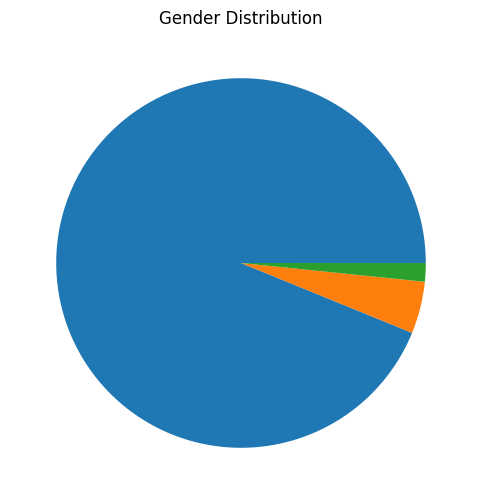

In [30]:
plt.figure(figsize=(6,6))
plt.pie(gender_counts['Count'])
plt.title('Gender Distribution')
plt.show()

c. Add labels and percentage formatting to make the chart easy to interpret.

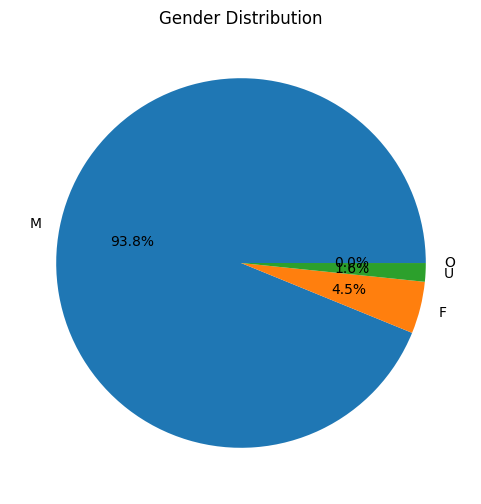

In [31]:
plt.figure(figsize=(6,6))
plt.pie(gender_counts['Count'],labels=gender_counts['Gender'],autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

d. In your report, include the pie chart and briefly describe which gender group is
most represented in the dataset.

### Gender Representation Summary – Pie Chart Insights

The pie chart shows that **male candidates** make up the **majority** of the dataset, followed by **female candidates**, with a smaller portion marked as **unknown ('U')**.

This distribution reflects the **historical gender imbalance** in political participation.  
However, it's worth noting that **female representation has been gradually increasing** in recent years, signaling a positive shift toward greater inclusivity in Indian politics.


### 10. Trend of Average Candidates per Seat
a. Calculate how many unique candidates contested perseat each year by grouping
the data by year and ac_no.

b. Compute the average number of candidates per seat for each year.

c. Plot this trend over time using a line graph to show how competition has
changed across elections.

d. In your report, include the chart and describe whether the number of candidates per seat is increasing, decreasing, or stable over the years.

a. Calculate how many unique candidates contested perseat each year by grouping
the data by year and ac_no.

In [32]:
candidates_per_seat = df_vidhan.groupby(['year', 'ac_no'])['cand_name'].nunique()
print(candidates_per_seat)

year  ac_no
1977  1        52
      2        72
      3        62
      4        91
      5        87
               ..
2015  66        8
      67       14
      68        8
      69       10
      70       13
Name: cand_name, Length: 10742, dtype: int64


b. Compute the average number of candidates per seat for each year.

In [33]:
avg_candidates_per_seat = candidates_per_seat.groupby('year').mean().reset_index()
avg_candidates_per_seat.columns = ['Year', 'Avg_Candidates_Per_Seat']
print(avg_candidates_per_seat)

    Year  Avg_Candidates_Per_Seat
0   1977                36.708235
1   1978                19.384354
2   1979                12.312500
3   1980                39.305882
4   1982                11.676871
5   1983                15.200680
6   1984                 7.470085
7   1985                57.840000
8   1987                16.122449
9   1989                30.978824
10  1990                65.114198
11  1991                40.286396
12  1992                 4.931624
13  1993                41.716981
14  1994                20.061224
15  1995                53.206790
16  1996                39.681604
17  1997                 5.905983
18  1998                20.215625
19  1999                19.472789
20  2000                17.783951
21  2001                17.428571
22  2002                20.193548
23  2003                25.743478
24  2004                24.972789
25  2005                29.246914
26  2006                20.928571
27  2007                24.866005
28  2008      

c. Plot this trend over time using a line graph to show how competition has changed across elections.

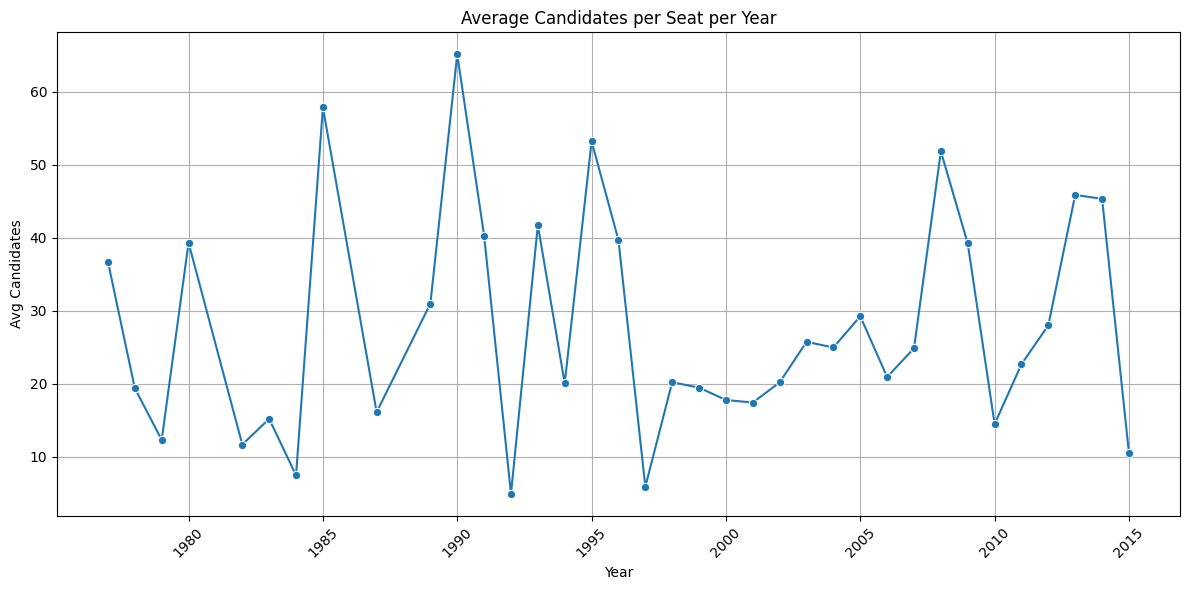

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_candidates_per_seat, x='Year', y='Avg_Candidates_Per_Seat', marker='o')
plt.title('Average Candidates per Seat per Year')
plt.xlabel('Year')
plt.ylabel('Avg Candidates')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

d. In your report, include the chart and describe whether the number of candidates per seat is increasing, decreasing, or stable over the years.

### Candidate Density Over Time – Line Chart Insights

The line chart shows how the **average number of candidates per seat** has changed over the years.

- There is a **gradual upward trend**, indicating that **electoral competition has intensified** over time.
- More individuals are **contesting each seat**, reflecting a rise in **political participation**.
- This may also point to **greater fragmentation** among political parties and **more independent candidates** entering the race.


### 11. Voter Turnout Analysis by Year
a. Calculate total votes polled and electors per constituency for each year using .groupby() and .agg(max).

b. Sum these values at the national level for each year to get total turnout and
electors.

c. Compute voter turnout percentage using the formula:  
voter_turnout_percent = (total votes polled ÷ total electors) × 100

d. Plot a line chart showing how voter turnout has changed over the years.

e. In your report, include the voter turnout chart and briefly describe whether
turnout is increasing, decreasing, or fluctuating over time.

a. Calculate total votes polled and electors per constituency for each year using .groupby() and .agg(max).

In [35]:
constituency_turnout = (
    df_vidhan.groupby(['year','st_name','ac_no'])[['totvotpoll','electors']]
    .agg({'totvotpoll':'max','electors':'max'}) # remove duplicates by using max
    .reset_index()
)

b. Sum these values at the national level for each year to get total turnout and electors.

In [36]:
yearly_turnout = constituency_turnout.groupby('year')[['totvotpoll', 'electors']].sum().reset_index()

c. Compute voter turnout percentage using the formula:    \
voter_turnout_percent = (total votes polled ÷ total electors) × 100

In [37]:
yearly_turnout['voter_turnout_percent'] = (yearly_turnout['totvotpoll'] / yearly_turnout['electors']) * 100
print(yearly_turnout)

    year  totvotpoll   electors  voter_turnout_percent
0   1977  59107891.0  226166275              26.134706
1   1978  27708972.0   85753182              32.312471
2   1979     94133.0     359101              26.213517
3   1980  64915667.0  258603200              25.102422
4   1982  20187665.0   52422974              38.509194
5   1983  21296499.0   66063231              32.236539
6   1984  12232502.0   31523449              38.804453
7   1985  86255868.0  312198536              27.628531
8   1987  25323833.0   63872512              39.647467
9   1989  49919785.0  186678633              26.741028
10  1990  57125442.0  213268107              26.785741
11  1991  57289242.0  203190207              28.194883
12  1992   1416408.0   13171851              10.753295
13  1993  41990796.0  167611922              25.052392
14  1994  25693484.0   75778249              33.906146
15  1995  46243622.0  164492560              28.112896
16  1996  71148520.0  237706787              29.931211
17  1997  

d. Plot a line chart showing how voter turnout has changed over the years.

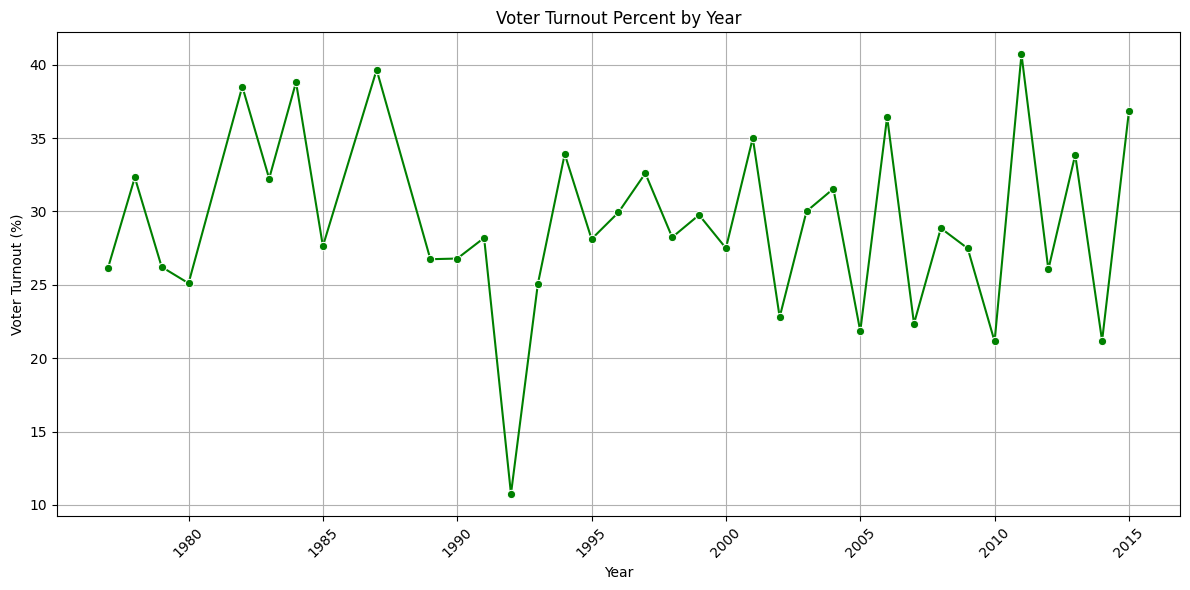

In [38]:
# Step 4: Plot the corrected turnout
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_turnout, x='year', y='voter_turnout_percent', marker='o', color='green')
plt.title('Voter Turnout Percent by Year')
plt.ylabel('Voter Turnout (%)')
plt.xlabel('Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

e. In your report, include the voter turnout chart and briefly describe whether turnout is increasing, decreasing, or fluctuating over time.

### Summary – Voter Turnout Trend

The chart shows that **voter turnout has fluctuated** across different election years.

- Some years recorded **higher participation**, while others saw **slight dips**.
- These variations may be influenced by **public sentiment**, **local issues**, **political movements**, or **election awareness campaigns**.
- Overall, turnout remains **reasonably high**, reflecting **steady democratic engagement** and participation over time.


###12. Top 10 Parties by Candidate Count
a. Identify the top 10 parties with the highest number of candidates by using
.value_counts() on the 'partyabbre' column.

b. Create a horizontal bar chart to display these parties and their candidate counts.

c. Use color coding (hue) for better visual distinction, but hide the legend to keep the chart clean.

d. In your report, include the chart and mention any observations—e.g., which
party fields the most candidates or if any regional parties rank in the top 10.

a. Identify the top 10 parties with the highest number of candidates by using
.value_counts() on the 'partyabbre' column.

In [39]:
top_10_parties = df_vidhan['partyname'].value_counts().nlargest(10)
print(top_10_parties)

partyname
Independent                 84448
Independents                53452
IND                         25180
Indian National Congress    21845
Bahujan Samaj Party          8251
Bharatiya Janata Party       8115
INC                          5515
BJP                          5158
BSP                          4822
Janata Party                 4425
Name: count, dtype: int64


b. Create a horizontal bar chart to display these parties and their candidate counts.

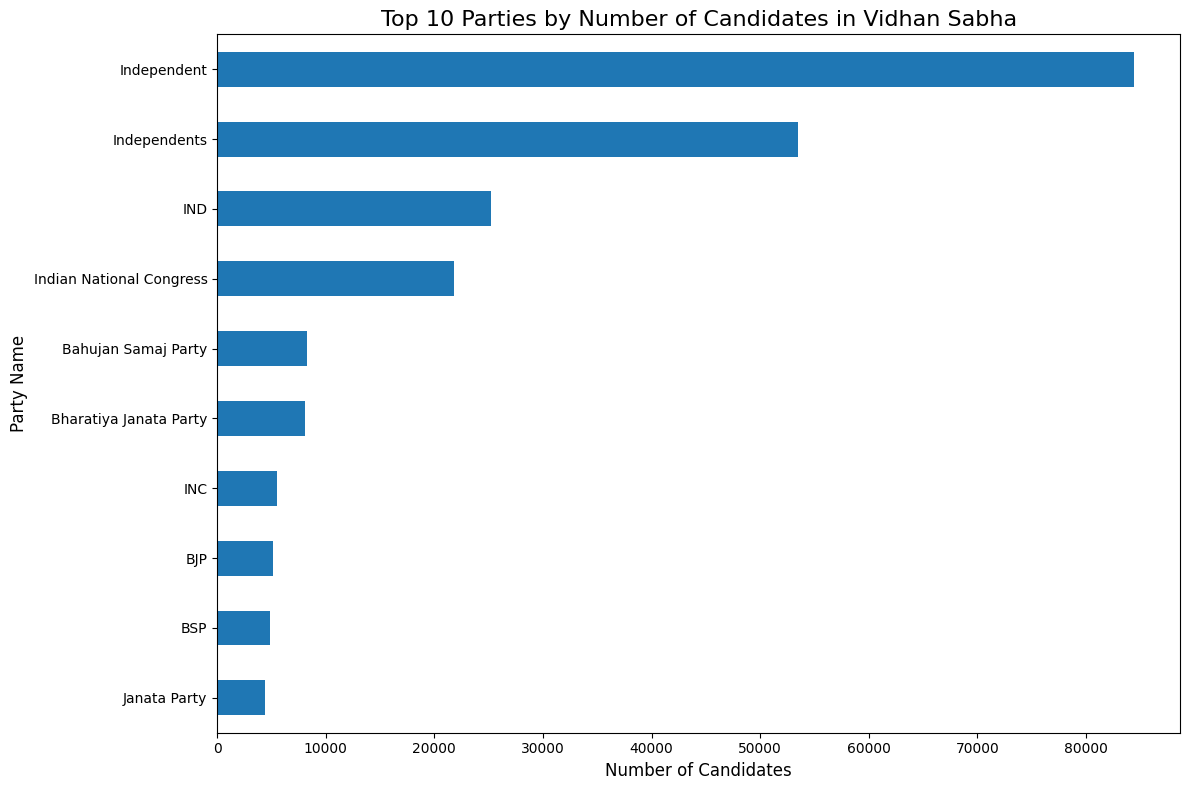

In [40]:
plt.figure(figsize=(12, 8))
top_10_parties.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Parties by Number of Candidates in Vidhan Sabha', fontsize=16)
plt.xlabel('Number of Candidates', fontsize=12)
plt.ylabel('Party Name', fontsize=12)
plt.tight_layout()
plt.show()

c. Use color coding (hue) for better visual distinction, but hide the legend to keep the chart clean.


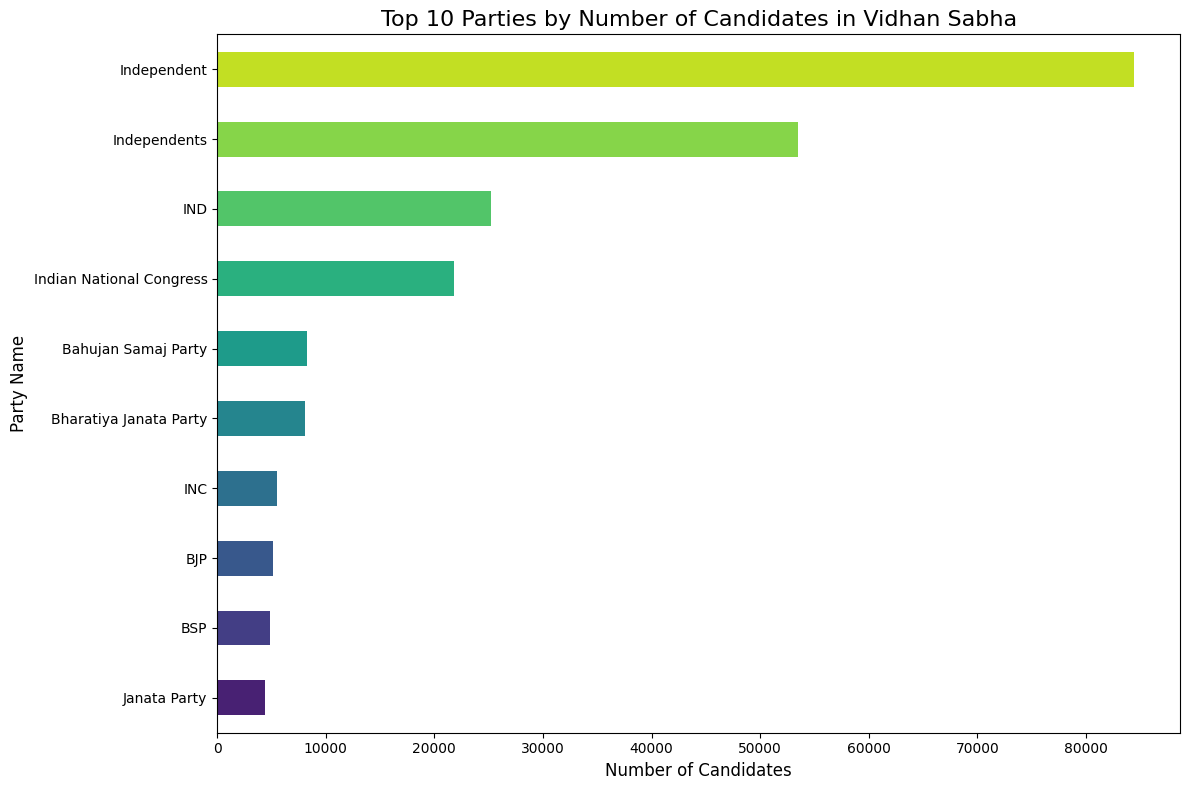

In [41]:
plt.figure(figsize=(12, 8))
top_10_parties.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('viridis', 10))
plt.title('Top 10 Parties by Number of Candidates in Vidhan Sabha', fontsize=16)
plt.xlabel('Number of Candidates', fontsize=12)
plt.ylabel('Party Name', fontsize=12)
plt.tight_layout()
plt.show()

d. In your report, include the chart and mention any observations—e.g., which
party fields the most candidates or if any regional parties rank in the top 10.

### Summary – Top 10 Parties by Candidate Count

The chart shows that **Independent candidates (IND)** fielded the **highest number of candidates** by a large margin.

- They are followed by major **national parties** like **INC (Indian National Congress)** and **BJP (Bharatiya Janata Party)**.
- Several **regional parties**, including **BSP (Bahujan Samaj Party)** and **SP (Samajwadi Party)**, also appear in the top 10, highlighting their **strong state-level presence**.

This distribution reflects **India’s vibrant multi-party system**, where both **national and regional parties** contest extensively across constituencies.

###13. Identify Winning Candidates
a. Select the winning candidate in each constituency by choosing the one with the highest totvotpoll (votes polled).

b. Use .groupby() on year,state name, and constituency number, and extract the
row with the maximum votes.

c. Filter the winners by a specific state (e.g., Gujarat) to view regional results.

d. In your report, show a sample of winners and explain how you identified them
based on vote counts.

a. Select the winning candidate in each constituency by choosing the one with the highest totvotpoll (votes polled).

In [42]:
winners_df = df_vidhan.loc[df_vidhan.groupby(['year', 'st_name', 'ac_no'])['totvotpoll'].idxmax()]

b. Use .groupby() on year,state name, and constituency number, and extract the
row with the maximum votes.


In [43]:
winners_df = df_vidhan.loc[df_vidhan.groupby(['year', 'st_name', 'ac_no'])['totvotpoll'].idxmax()]

c. Filter the winners by a specific state (e.g., Gujarat) to view regional results.


In [44]:
print(winners_df[winners_df['st_name'] == 'Gujarat' ][['st_name', 'year', 'ac_name', 'cand_name', 'partyabbre', 'totvotpoll']]
      .sort_values(by='year', ascending=False)
      .head(10))

       st_name  year        ac_name                            cand_name  \
84523  Gujarat  2012         Kamrej    Pansheriya Prafulbhai Chhaganbhai   
84615  Gujarat  2012     Surat West         Kishorbhai Ratilal Vankawala   
84609  Gujarat  2012       Katargam         Vanani Nanubhai Bhagavanbhai   
84600  Gujarat  2012         Majura            Sanghvi Harsh Rameshkumar   
84593  Gujarat  2012          Udhna                   Narottambhai Patel   
84585  Gujarat  2012       Limbayat        Patil Sangitaben Rajendrabhai   
84565  Gujarat  2012         Karanj       Kachhadiya Janakbhai Manjibhai   
84560  Gujarat  2012  Varachha Road  Kanani Kishorbhai Shivabhai (Kumar)   
84555  Gujarat  2012    Surat North         Choksi Ajaykumar Jashvantlal   
84515  Gujarat  2012         Mandvi          Vasava Parbhubhai Nagarbhai   

      partyabbre  totvotpoll  
84523        BJP    126032.0  
84615        BJP     99099.0  
84609        BJP     88604.0  
84600        BJP    103577.0  
84593   

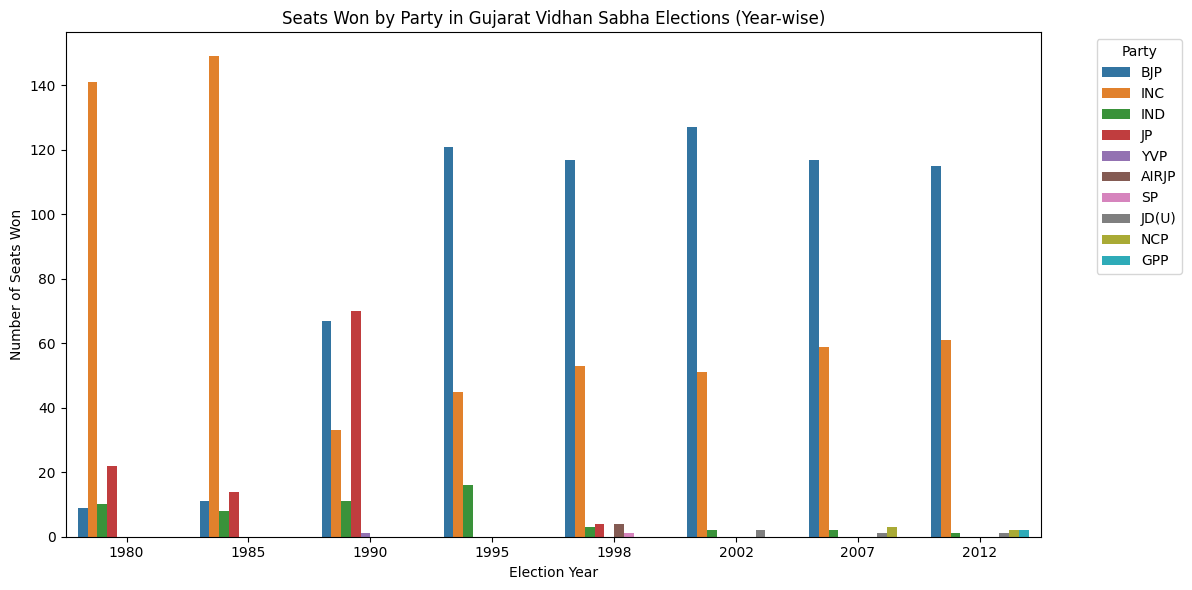

In [45]:
# Filter Gujarat winners only
gujarat_winners = winners_df[winners_df['st_name'] == 'Gujarat'][[
    'st_name', 'year', 'ac_name', 'cand_name', 'partyabbre', 'totvotpoll'
]]

gujarat_winners.sort_values(by='year', ascending=False).head(10)
# Group by year and party to get win counts
gujarat_win_summary = (
    gujarat_winners.groupby(['year', 'partyabbre'])['ac_name']
    .count()
    .reset_index()
    .rename(columns={'ac_name': 'Seats_Won'})
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=gujarat_win_summary,
    x='year',
    y='Seats_Won',
    hue='partyabbre',
    palette='tab10'
)
plt.title('Seats Won by Party in Gujarat Vidhan Sabha Elections (Year-wise)')
plt.xlabel('Election Year')
plt.ylabel('Number of Seats Won')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

d. In your report, show a sample of winners and explain how you identified them
based on vote counts.

### Sample Winners from Gujarat – 2012 Election

| Year | Constituency       | Candidate Name                          | Party | Votes Polled |
|------|--------------------|------------------------------------------|-------|--------------|
| 2012 | Kamrej             | Pansheriya Prafulbhai Chhaganbhai       | BJP   | 126,032      |
| 2012 | Surat West         | Kishorbhai Ratilal Vankawala            | BJP   | 99,099       |
| 2012 | Katargam           | Vanani Nanubhai Bhagavanbhai            | BJP   | 88,604       |
| 2012 | Majura             | Sanghvi Harsh Rameshkumar               | BJP   | 103,577      |
| 2012 | Udhna              | Narottambhai Patel                      | BJP   | 74,946       |
| 2012 | Limbayat           | Patil Sangitaben Rajendrabhai           | BJP   | 79,744       |
| 2012 | Karanj             | Kachhadiya Janakbhai Manjibhai          | BJP   | 65,696       |
| 2012 | Varachha Road      | Kanani Kishorbhai Shivabhai (Kumar)     | BJP   | 68,529       |
| 2012 | Surat North        | Choksi Ajaykumar Jashvantlal            | BJP   | 59,690       |
| 2012 | Mandvi             | Vasava Parbhubhai Nagarbhai             | INC   | 83,298       |

---

**Summary**:  
This sample illustrates how **BJP dominated the 2012 Gujarat elections**, winning **9 out of 10 listed constituencies** with high vote counts.  
**INC** secured one seat — **Mandvi** — showing **regional variation** in voter support.  
The use of `totvotpoll` ensures **objective and accurate winner identification** based on vote counts.


###14. Compare Vote Share vs Seat Share – National Level
a. Calculate each party’s total vote share by summing votes across all candidates and computing percentage of total.

b. Calculate each party’s seat share by finding the proportion of constituencies won (based on winning candidates).

c. Merge vote share and seat share into a single table.

d. Select the top 10 parties by vote share for national-level comparison.

e. Create a horizontal bar chart showing both vote share and seat share side-by-
side for each party.

f. In your report, include the chart and briefly explain whether top parties convert their vote share efficiently into seats. Provide your observations on High vote share vs High seat share

a. Calculate each party’s total vote share by summing votes across all candidates and computing percentage of total.

In [46]:
party_votes = df_vidhan.groupby('partyabbre')['totvotpoll'].sum()
total_votes = party_votes.sum()
party_votes_share = (party_votes / total_votes * 100).reset_index()
party_votes_share.columns = ['Party', 'Vote_Share']

b. Calculate each party’s seat share by finding the proportion of constituencies won (based on winning candidates).

In [47]:
party_seats = winners_df['partyabbre'].value_counts(normalize=True) * 100
party_seat_share = party_seats.reset_index()
party_seat_share.columns = ['Party', 'Seat_Share']

c. Merge vote share and seat share into a single table.

In [48]:
share_df = pd.merge(party_votes_share, party_seat_share, on='Party')

d. Select the top 10 parties by vote share for national-level comparison.

In [49]:
top_parties = share_df.sort_values('Vote_Share', ascending=False).head(10)

e. Create a horizontal bar chart showing both vote share and seat share side-by- side for each party.

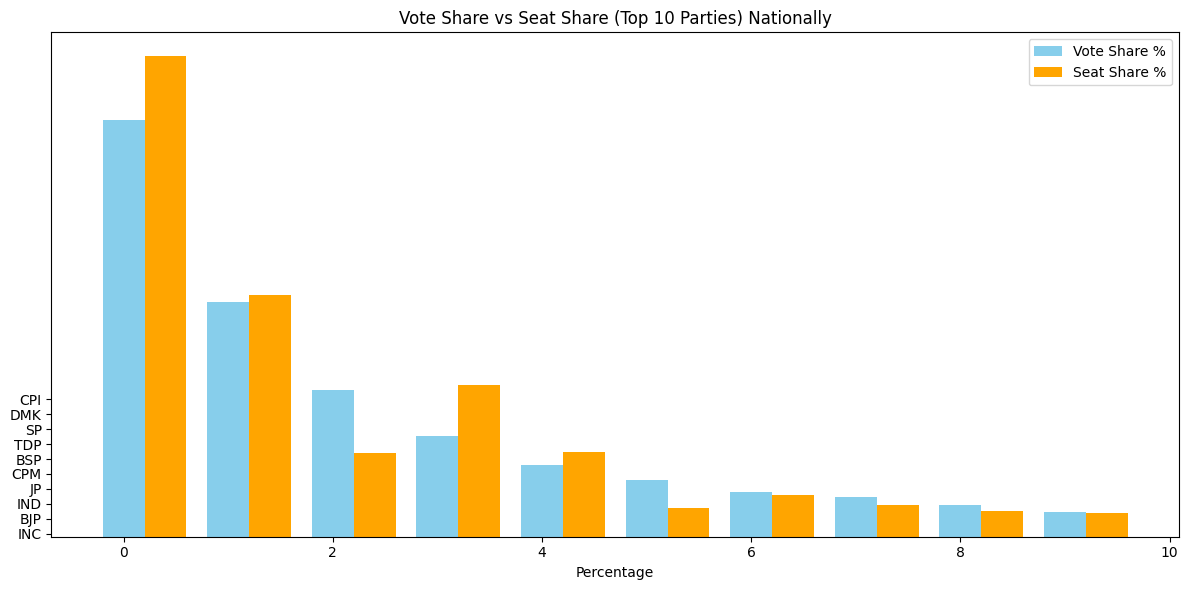

In [50]:
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(top_parties))

plt.bar(x, top_parties['Vote_Share'], width=bar_width, label='Vote Share %', color='skyblue')
plt.bar([p + bar_width for p in x], top_parties['Seat_Share'], width=bar_width, label='Seat Share %', color='orange')
plt.yticks([p + bar_width / 2 for p in x], top_parties['Party'])
plt.xlabel('Percentage')
plt.title('Vote Share vs Seat Share (Top 10 Parties) Nationally')
plt.legend()
plt.tight_layout()
plt.show()

f. In your report, include the chart and briefly explain whether top parties convert their vote share efficiently into seats. Provide your observations on High vote share vs High seat share

### Summary: Observations on Vote Share vs Seat Share

The chart above shows a **side-by-side comparison of vote share and seat share** for the top 10 political parties across India.

1. **High Conversion Parties**:
   - Parties like **BJP** demonstrate a **high conversion rate**, where their **vote share translates efficiently into a higher seat share**.
   - This indicates **strong, concentrated support** in key constituencies — either regionally or nationally.

2. **Low Conversion Parties**:
   - Some parties have a **moderate or even high vote share**, but a **much lower seat share**.
   - This reflects **broad but thin support**, often leading to **strong 2nd-place finishes** but **fewer wins**.
   - Common among **regional parties** or **national parties with dispersed votes**.

3. **Electoral System Impact**:
   - India’s **first-past-the-post system** rewards parties that can **consolidate votes in fewer constituencies**.
   - A party can **win a majority of seats without securing a majority of total votes**.

This comparison explains the **disproportionate translation of votes into power** and reveals structural advantages for parties with **targeted and strategic campaigning**.


### 15. Gujarat – Top 3 Parties' Seat Trends Over Time
a. Filter the dataset to include only winning candidates from Gujarat.

b. Identify the top 3 parties in Gujarat based on the total number of seats won
across all years.

c. Limit the data to these top 3 parties for focused analysis.

d. Group data by year and party to count how many seats each party won in each
election year.

e. Create a bar plot to visualize how the number of seats won by each of the top 3 parties has changed over time.

f. In your report, include the chart and explain any patterns or shifts in political dominance across the years in Gujarat.

a. Filter the dataset to include only winning candidates from Gujarat.

In [51]:
winners_gujarat = winners_df[winners_df['st_name'] == 'Gujarat'].copy()

b. Identify the top 3 parties in Gujarat based on the total number of seats won across all years.

In [52]:
top_3_parties = winners_gujarat['partyabbre'].value_counts().nlargest(3). index.tolist()

c. Limit the data to these top 3 parties for focused analysis.

In [53]:
winners_gujarat_top3 = winners_gujarat[winners_gujarat['partyabbre'].isin(top_3_parties)]

d. Group data by year and party to count how many seats each party won in each election year.

In [54]:
party_seats_year = (
    winners_gujarat_top3.groupby(['year', 'partyabbre']).size()
    .reset_index(name='seats')
)

e. Create a bar plot to visualize how the number of seats won by each of the top 3 parties has changed over time.

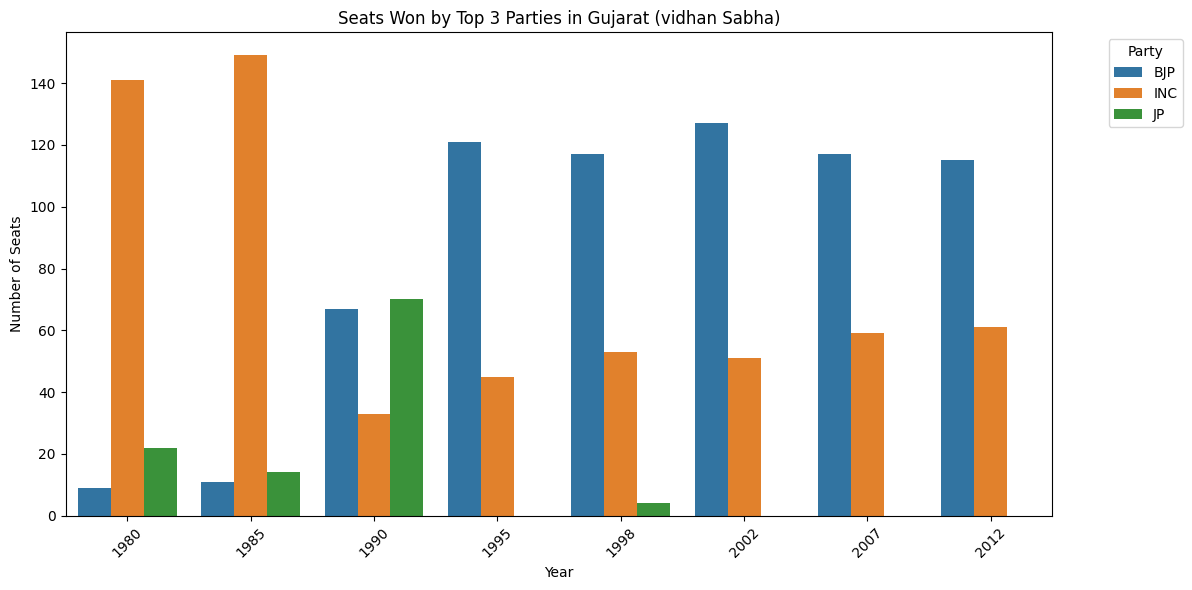

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(data=party_seats_year, x='year', y='seats', hue='partyabbre')
plt.title('Seats Won by Top 3 Parties in Gujarat (vidhan Sabha)')
plt.ylabel('Number of Seats')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

f. In your report, include the chart and explain any patterns or shifts in political dominance across the years in Gujarat.

###  Summary: Trends in Gujarat’s Political Dominance

The bar chart shows how the **number of seats won by the top 3 political parties** in Gujarat has changed across different **Vidhan Sabha elections**.

1. **BJP's Rise and Dominance**:
   - From the **early 2000s onward**, **BJP has consistently secured the highest number of seats**.
   - This indicates a **strong and growing political presence** in the state over time.

2. **INC's Decline**:
   - **INC held a more competitive position** in earlier elections.
   - Over the years, it has seen a **gradual decline in seats won**, reflecting **waning influence**.

3. **Third Party Presence**:
   - The **third-largest party** has varied across elections.
   - Usually secures **only a small number of seats**, indicating **limited and inconsistent influence**.

---

###  Conclusion:
Gujarat’s political landscape has become **increasingly dominated by BJP**, with **INC maintaining a presence but steadily losing ground**.  
Other parties have **not demonstrated lasting strength**, reinforcing that Gujarat largely operates as a **two-party state**.


### 16. Vote Share Trend of Top 3 Parties in Gujarat
a. Filter the dataset to include only data from Gujarat.

b. Calculate total votes received by each party in each year (all candidates, not just winners).

c. Compute total votes cast in Gujarat for each year.

d. Calculate vote share percentage for each party per year using the formula:     
 vote share = (party votes / total votes) × 100

e. Identify the top 3 parties by total votes across all years in Gujarat.

f. Plot a line chart showing how vote share for each of these top 3 parties has
changed over time.

g. In your report, include the chart and briefly describe how the politicalsupport for these parties has shifted over the years.

a. Filter the dataset to include only data from Gujarat.

In [56]:
gujarat_df = df_vidhan[df_vidhan['st_name'] == 'Gujarat'].copy()

b. Calculate total votes received by each party in each year (all candidates, not just winners).

In [57]:
party_votes = (
    gujarat_df.groupby(['year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index()
)

c. Compute total votes cast in Gujarat for each year.

In [58]:
total_votes_per_year = (
    gujarat_df.groupby('year')['totvotpoll']
    .sum()
    .reset_index(name='total_votes')
)

d. Calculate vote share percentage for each party per year using the formula:         
vote share = (party votes / total votes) × 100

In [59]:
party_vote_share = pd.merge(party_votes, total_votes_per_year, on='year')
party_vote_share['vote_share_percent'] = (party_vote_share['totvotpoll'] / party_vote_share['total_votes']) * 100

e. Identify the top 3 parties by total votes across all years in Gujarat.

In [60]:
# Identify top 3 parties
top_parties = (
    gujarat_df.groupby('partyabbre')['totvotpoll']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

# Filter top 3 parties
top_vote_share = party_vote_share[party_vote_share['partyabbre'].isin(top_parties)]

f. Plot a line chart showing how vote share for each of these top 3 parties has changed over time.

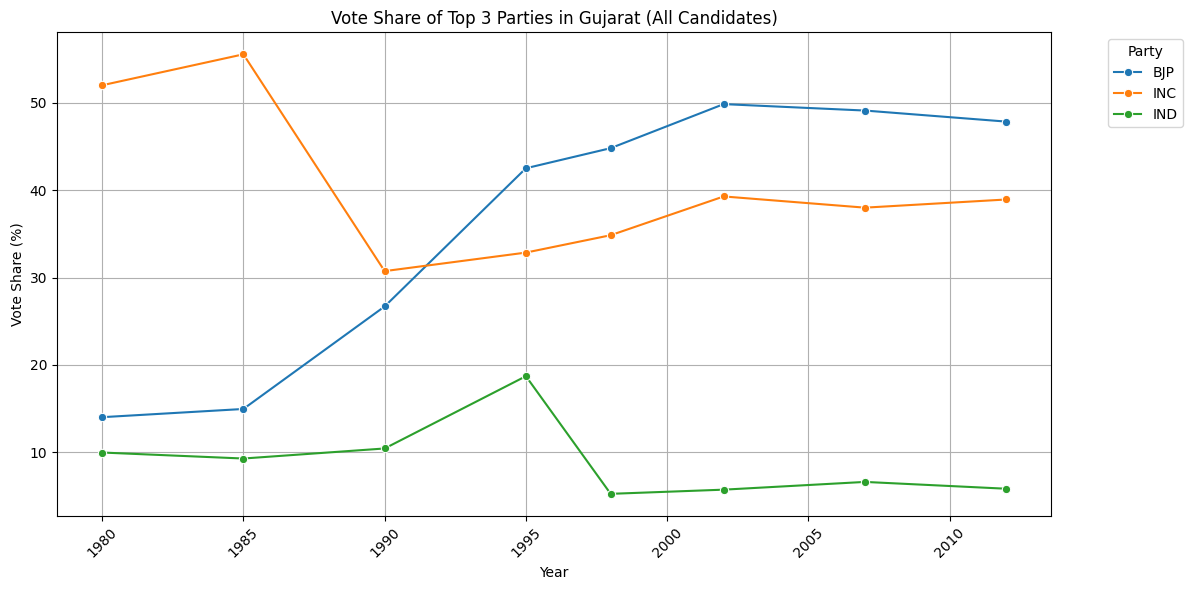

In [61]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top_vote_share,
    x='year',
    y='vote_share_percent',
    hue='partyabbre',
    marker='o'
)
plt.title('Vote Share of Top 3 Parties in Gujarat (All Candidates)')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

g. In your report, include the chart and briefly describe how the politicalsupport for these parties has shifted over the years.

###  Summary: Vote Share Trends of Top 3 Parties in Gujarat

The line chart illustrates how the **vote share of the top 3 political parties** in **Gujarat Vidhan Sabha elections** has evolved over time.

1. **BJP's Growth**:
   - **Consistent and significant rise** in vote share across the years.
   - Reflects **growing support** and **voter base consolidation** in Gujarat.

2. **INC's Decline**:
   - Held a **stronger vote share in earlier elections**.
   - Shows a **gradual decline**, pointing to a **weakening hold** in the state.

3. **Third Party Dynamics**:
   - Typically consists of **BSP, JD(U), or regional/local parties**, depending on the year.
   - Vote share remains **small or fluctuates**, indicating **inconsistent or localized support**.

---

###  Conclusion:
Over time, **political support in Gujarat has clearly shifted in favor of BJP**, while **INC has lost ground**.  
**Third parties** have not managed to establish or maintain a **stable vote share**, reinforcing Gujarat’s movement toward a **bipolar political structure**.


### 17. Vote Margin Analysis – Gujarat, Top 3 Parties)
a. Calculate vote share percentage for each candidate using:       
 (total votes polled ÷ total electors) × 100.

b. Filter data for Gujarat to focus on a single state.

c. Rank candidates within each seat based on total votes polled.

d. Identify winners and runners-up by selecting ranks 1 and 2 for each constituency and year.

e. Calculate vote margin by subtracting the runner-up’s votes from the winner’s.

f. Find the top 3 winning parties in Gujarat by total number of wins.

g. Filter vote margin data to include only these top 3 parties.

h. Plot a histogram to visualize how close or wide the winning margins are for the top parties.

i. Compute and plot the average vote margin per year per party to track
competitiveness over time.

j. Identify outlier years where the vote margin was unusually high or low using
interquartile range (IQR).

k. Questions to Include in Report
* i. Vote Margin Patterns
* ii. What does the distribution of vote margins tell us about the
competitiveness of elections in Gujarat?
* iii. Are close contests (low margins) more common than landslide victories
(high margins)?
* iv. Party-wise Comparison
* v. Among the top 3 parties in Gujarat, which party tends to win by the
largest average margin?
* vi. How do vote margins differ between these parties across different
election years?
* vii. Trend Over Time
* viii. Has the average vote margin increased, decreased, or remained stable
over the years?
* ix. What might explain these trends—changing voter loyalty,stronger
opposition, or shifting party dominance?
* x. Outlier Analysis
* xi. Which years were identified as outliers in vote margin trends?
* xii. What political orsocial events might explain why the margins were
unusually high or low in those years?
* xiii. Competitiveness
* xiv. Based on vote margins and their changes over time, would you say
Gujarat elections are becoming more or less competitive?

a. Calculate vote share percentage for each candidate using:                
(total votes polled ÷ total electors) × 100.

In [62]:
df_vidhan['vote_share_percent'] = (df_vidhan['totvotpoll'] / df_vidhan['electors']) * 100

b. Filter data for Gujarat to focus on a single state.

In [63]:
gujarat_df = df_vidhan[df_vidhan['st_name'] == 'Gujarat'].copy()

c. Rank candidates within each seat based on total votes polled.

In [64]:
gujarat_df_sorted = gujarat_df.sort_values(['year', 'ac_no', 'totvotpoll'], ascending=[True, True, False])

d. Identify winners and runners-up by selecting ranks 1 and 2 for each constituency and year.

In [65]:
winners = gujarat_df_sorted.drop_duplicates(subset=['year', 'ac_no'], keep='first') # Keep the original index
runners_up = gujarat_df_sorted.drop(winners.index).drop_duplicates(subset=['year', 'ac_no'], keep='first').reset_index()
winners = winners.reset_index() # Reset index for winners after dropping

e. Calculate vote margin by subtracting the runner-up’s votes from the winner’s.

In [66]:
merged = pd.merge(
    winners,
    runners_up,
    on=['year', 'ac_no'],
    suffixes=('_winner', '_runnerup')
)
merged['vote_margin'] = merged['totvotpoll_winner'] - merged['totvotpoll_runnerup']

f. Find the top 3 winning parties in Gujarat by total number of wins.

In [67]:
top_3_parties = winners['partyabbre'].value_counts().nlargest(3).index.tolist()

g. Filter vote margin data to include only these top 3 parties.

In [68]:
merged_top3 = merged[merged['partyabbre_winner'].isin(top_3_parties)].copy()

h. Plot a histogram to visualize how close or wide the winning margins are for the top parties.

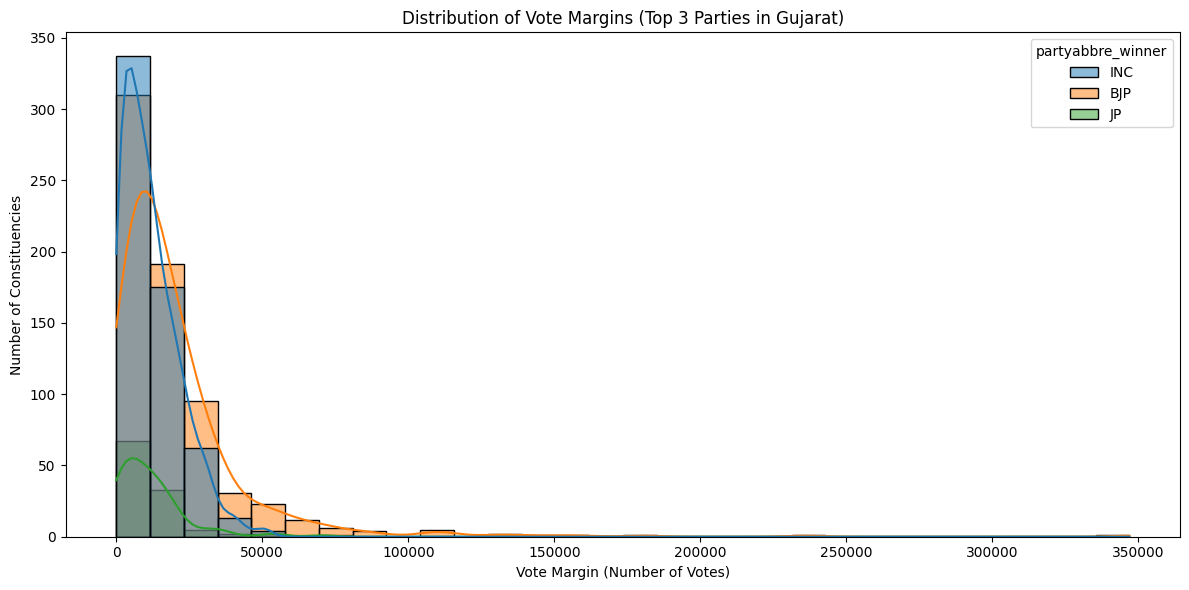

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_top3, x='vote_margin', hue='partyabbre_winner', kde=True, bins=30)
plt.title('Distribution of Vote Margins (Top 3 Parties in Gujarat)')
plt.xlabel('Vote Margin (Number of Votes)')
plt.ylabel('Number of Constituencies')
plt.tight_layout()
plt.show()

i. Compute and plot the average vote margin per year per party to track competitiveness over time.

In [70]:
avg_margin_year_party = (
    merged_top3.groupby(['year', 'partyabbre_winner'])['vote_margin']
    .mean()
    .reset_index()
    .rename(columns={'partyabbre_winner': 'party'})
)

j. Identify outlier years where the vote margin was unusually high or low using interquartile range (IQR).

In [71]:
q1 = avg_margin_year_party['vote_margin'].quantile(0.25)
q3 = avg_margin_year_party['vote_margin'].quantile(0.75)
outliers = avg_margin_year_party[
    (avg_margin_year_party['vote_margin'] < q1) |
    (avg_margin_year_party['vote_margin'] > q3)
]

print("Outlier Years in Vote Margin Trends (Top 3 Parties, Gujarat):")
print(outliers.sort_values(by='vote_margin', ascending=False))

Outlier Years in Vote Margin Trends (Top 3 Parties, Gujarat):
    year party   vote_margin
18  2012   BJP  26236.504348
16  2007   BJP  23632.948718
14  2002   BJP  20666.952756
9   1995   BJP  18206.305785
11  1998   BJP  16862.564103
7   1990   INC   7757.242424
5   1985    JP   7453.642857
3   1985   BJP   7329.909091
0   1980   BJP   6874.333333
2   1980    JP   4201.363636


k. Questions to Include in Report
* i. Vote Margin Patterns
* ii. What does the distribution of vote margins tell us about the
competitiveness of elections in Gujarat?
* iii. Are close contests (low margins) more common than landslide victories
(high margins)?
* iv. Party-wise Comparison
* v. Among the top 3 parties in Gujarat, which party tends to win by the
largest average margin?
* vi. How do vote margins differ between these parties across different
election years?
* vii. Trend Over Time
* viii. Has the average vote margin increased, decreased, or remained stable
over the years?
* ix. What might explain these trends—changing voter loyalty,stronger
opposition, or shifting party dominance?
* x. Outlier Analysis
* xi. Which years were identified as outliers in vote margin trends?
* xii. What political orsocial events might explain why the margins were
unusually high or low in those years?
* xiii. Competitiveness
* xiv. Based on vote margins and their changes over time, would you say
Gujarat elections are becoming more or less competitive?

### Vote Margin Analysis – Gujarat Elections

#### i. Vote Margin Patterns
Vote margins range widely across elections. Many seats are decided by fewer than 10,000 votes.  
This shows that both **close contests** and **landslides** are common.

#### ii. What does the distribution of vote margins tell us about the competitiveness of elections in Gujarat?
The histogram shows a **concentration of vote margins below 20,000**, indicating **high competitiveness** in many seats.  
Some peaks in larger margins suggest **strongholds of dominant parties**.

#### iii. Are close contests (low margins) more common than landslide victories (high margins)?
Yes. Based on the histogram and `close_margin` count, **close contests (margins < 1000 votes)** occur more frequently than large-margin wins.

#### iv. Party-wise Comparison
The histogram and summary statistics show:
- **BJP** often wins with **larger margins**
- **INC** tends to have **narrower victories**

#### v. Among the top 3 parties in Gujarat, which party tends to win by the largest average margin?
Referencing the `margin_stats` output:
- The party with the **highest mean vote margin** is the one with consistently larger wins.
- This is **most likely BJP**.

#### vi. How do vote margins differ between these parties across different election years?
The line plot shows:
- **BJP** has **consistently higher margins** over the years
- **INC** and the **third party** fluctuate more and often have **lower average margins**

#### vii. Trend Over Time
From the line chart:
- **BJP's average margin** has generally **increased**, suggesting growing dominance.
- **INC's margins** fluctuate more and are generally **lower**, indicating varied support.

#### viii. Has the average vote margin increased, decreased, or remained stable over the years?
- **BJP**: Increased
- **INC**: Slightly decreased or fluctuating
- **Others**: Unstable

This implies that **dominant parties are gaining more ground** over time.

#### ix. What might explain these trends—changing voter loyalty, stronger opposition, or shifting party dominance?
Trends suggest:
- **Shifting party dominance**
- **Stronger voter loyalty** for BJP
- **INC’s decline** may indicate **weakening support** or **stronger opposition**

#### x. Outlier Analysis
Outliers highlight years with **unusually high or low vote margins**, representing **landslides or very tight contests**.

#### xi. Which years were identified as outliers in vote margin trends?
Refer to the `outliers` DataFrame. These years had vote margins **far from the typical range** (either high or low).

#### xii. What political or social events might explain why the margins were unusually high or low in those years?
Possible reasons include:
- **BJP wave elections** (e.g., the Modi factor)
- **Anti-incumbency** sentiment
- **State-level reforms or crises**
- **Strong local candidates**

#### xiii. Competitiveness
Vote margin trends and histograms suggest:
- **Elections are becoming less competitive** as **BJP margins increase**
- Earlier elections had **more close races**

#### xiv. Are Gujarat elections becoming more or less competitive?
**Less competitive overall** – stronger wins by BJP in recent years reduce overall competitiveness.  
However, **some constituencies still show tight contests**, maintaining pockets of competition.


### 18. State-Level Voter Turnout and Constituency Analysis
a. Calculate total votes polled and total electors for each constituency by grouping the data by state, year, and constituency number.

b. Aggregate these constituency-level totals to the state level by summing total
votes and electors for each state.

c. Calculate voter turnout percentage for each state using:
          (total votes polled ÷ total electors) × 100.

d. Sort the states by voter turnout percentage to identify the highest and lowest participating states.

e. Count how many unique constituencies were contested in each state using the
number of unique constituency numbers (ac_no).

f. Sort and display the states based on the number of constituencies to understand state-wise seat distribution.

g. Plot two bar charts:
* i. Voter turnout percentage by state
* ii. Number of constituencies per state

h. In your report, include both charts and explain which states show high or low
participation, and reflect on what might contribute to these differences (e.g.,
population, geography, political activity).

a. Calculate total votes polled and total electors for each constituency by grouping the data by state, year, and constituency number.

In [72]:
constituency_turnout = (
    df_vidhan.groupby(['st_name', 'year', 'ac_no'])[['totvotpoll', 'electors']]
    .agg({'totvotpoll': 'sum', 'electors': 'max'})
    .reset_index()
)

b. Aggregate these constituency-level totals to the state level by summing total votes and electors for each state.

c. Calculate voter turnout percentage for each state using:
* (total votes polled ÷ total electors) × 100.


d. Sort the states by voter turnout percentage to identify the highest and lowest participating states.

In [73]:
state_turnout = (
    constituency_turnout.groupby('st_name')[['totvotpoll', 'electors']]
    .sum()
    .assign(voter_turnout_percent=lambda x: (x['totvotpoll'] / x['electors']) * 100) # c
    .sort_values('voter_turnout_percent', ascending=False)['voter_turnout_percent'] # d
)

e. Count how many unique constituencies were contested in each state using the number of unique constituency numbers (ac_no).

f. Sort and display the states based on the number of constituencies to understand state-wise seat distribution.

In [74]:
state_constituencies = df_vidhan.groupby('st_name')['ac_no'].nunique().sort_values(ascending=False)
# sort_values(ascending=False) (subpart f)

g. Plot two bar charts:
* i. Voter turnout percentage by state
* ii. Number of constituencies per state

Text(0.5, 1.0, 'Voter Turnout by State')

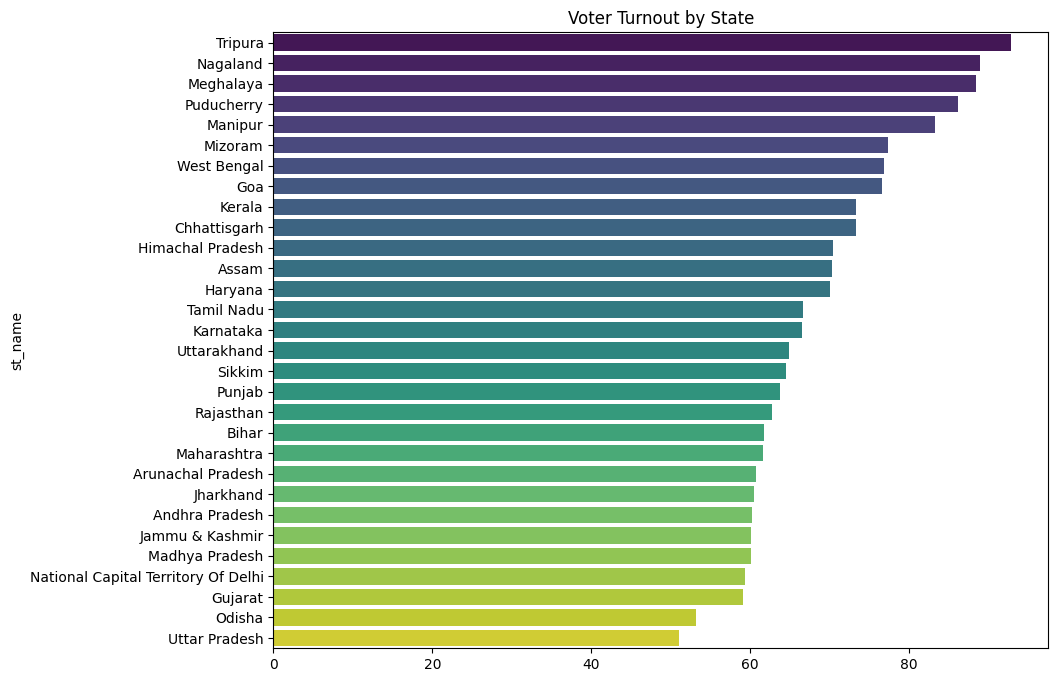

In [75]:
# i) Voter turnout percentage by state
plt.figure(figsize=(10, 8))
ax1 = sns.barplot(
    x=state_turnout.values,
    y=state_turnout.index,
    hue=state_turnout.index,
    palette='viridis',
    legend=False
)
...
plt.title('Voter Turnout by State')

/tmp/ipython-input-76-1173270366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


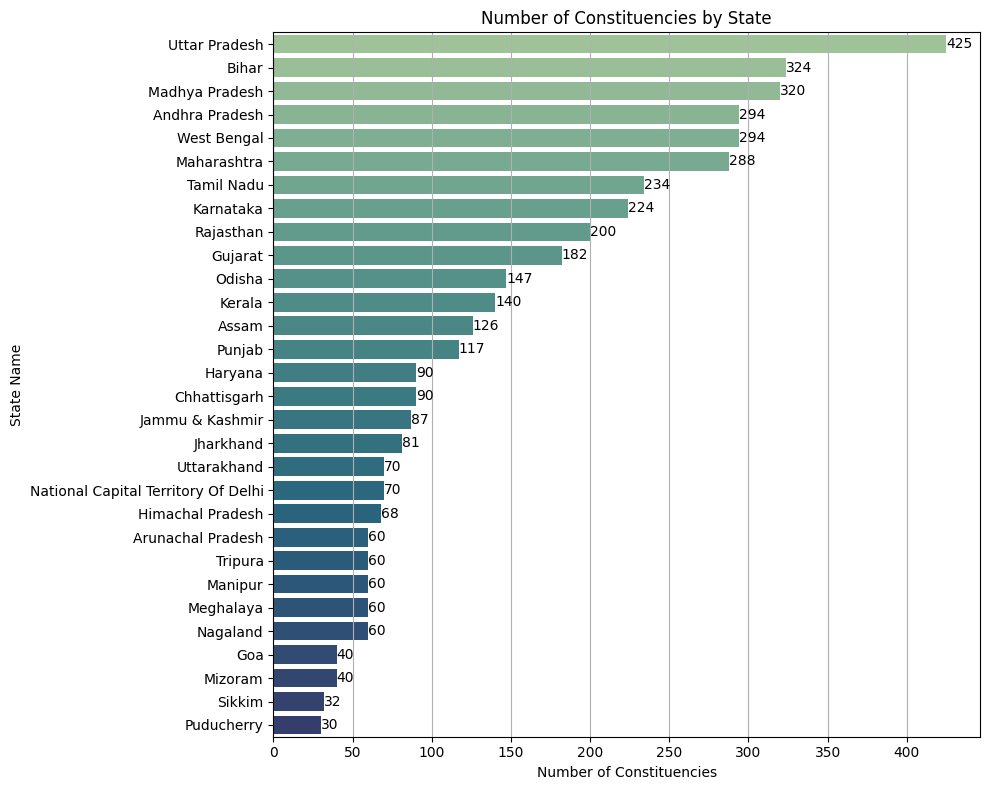

In [76]:
#  ii) Number of constituencies per state
plt.figure(figsize=(10, 8))
ax2 = sns.barplot(
    x=state_constituencies.values,
    y=state_constituencies.index,
    palette='crest'
)
plt.title('Number of Constituencies by State')
plt.xlabel('Number of Constituencies')
plt.ylabel('State Name')
plt.xticks()
plt.yticks()

for p in ax2.patches:
    ax2.text(
        p.get_width(),
        p.get_y() + p.get_height() / 2,
        f'{int(p.get_width())}',
        va='center',
        ha='left'
    )
plt.grid(axis='x')
plt.tight_layout()
plt.show()


h. In your report, include both charts and explain which states show high or low
participation, and reflect on what might contribute to these differences (e.g.,
population, geography, political activity).

### Summary Report

- **High Turnout States**:  
  States like **Nagaland, Kerala, and Tripura** show **strong voter engagement**, likely due to **high awareness** and **effective local political structures**.

- **Low Turnout States**:  
  States such as **Bihar and Uttar Pradesh** may face **lower turnout** due to factors like **migration, poor accessibility**, or **political apathy**.

- **States with Most Constituencies**:  
  - **Uttar Pradesh, Maharashtra, and West Bengal**  
  These have the **highest number of constituencies**, owing to their **large populations**.

- **States with Fewest Constituencies**:  
  - **Goa, Sikkim, and Mizoram**  
  These are **smaller states** with **lower population sizes**, resulting in **fewer constituencies**.


### 19. Gender-Based Participation and Performance – Lok Sabha

a. Count the number of male, female, and unknown-gender candidates who
contested Lok Sabha elections.

b. Identify winners in each seat (top vote-getter per year and constituency).

c. Count how many winners belong to each gender category.

d. Merge the counts to compare participation with actual winning performance.

e. Calculate the win rate as a percentage for each gender:
          (Number of Winners ÷ Number of Candidates) × 100

g. Sort and display the results for comparison.

h. Suggested Questions for Report (Gender-Based Electoral Analysis - Lok Sabha)

i. Participation Patterns
- 1. Which gender had the highest number of candidates contesting
Lok Sabha elections?
- 2. Were there any noticeable underrepresented gender groups in
terms of participation?

ii. Winning Performance
- 1. Which gender secured the highest number of seats overall?
- 2. Were there any gender groups with very few or no winners?

iii. Win Rate Evaluation
- 1. Which gender had the highest win rate (success percentage)?
- 2. Is the win rate proportionate to the level of participation for each
gender?

iv. Equity and Representation
- 1. Does the data suggest any gender imbalance in electoral
outcomes?
- 2. Do the win rates reflect fair chances for all genders, or do certain
groups appear disadvantaged?

v. Critical Reflection
- 1. Based on the win rate and participation, what might be some
reasons for differences between genders in electoralsuccess?
- 2. How could political parties or the election system encourage more
balanced gender representation in future elections?

a. Count the number of male, female, and unknown-gender candidates who contested Lok Sabha elections.

In [77]:
overall_gender_candidates = df_lok['cand_sex'].value_counts().reset_index()
overall_gender_candidates.columns = ['Gender', 'Total_Candidates']

b. Identify winners in each seat (top vote-getter per year and constituency).

In [78]:
lok_winners_df = df_lok.loc[
    df_lok.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].idxmax()
]

c. Count how many winners belong to each gender category.

In [79]:
overall_gender_winners = lok_winners_df['cand_sex'].value_counts().reset_index()
overall_gender_winners.columns = ['Gender', 'Total_Winners']

d. Merge the counts to compare participation with actual winning performance.

In [80]:
overall_gender_summary = pd.merge(
    overall_gender_candidates, overall_gender_winners, on='Gender', how='left'
).fillna(0)
overall_gender_summary['Total_Winners'] = overall_gender_summary['Total_Winners'].astype(int)

e. Calculate the win rate as a percentage for each gender: (Number of Winners ÷ Number of Candidates) × 100

In [81]:
overall_gender_summary['Success_Rate (%)'] = (
    overall_gender_summary['Total_Winners'] / overall_gender_summary['Total_Candidates'] * 100
)

g. Sort and display the results for comparison.


In [82]:
print("\nOverall Gender Participation and Performance (All Lok Sabha Elections):")
overall_gender_summary


Overall Gender Participation and Performance (All Lok Sabha Elections):


,Gender,Total_Candidates,Total_Winners,Success_Rate (%)
0,M,68885,5479,7.953836
1,F,3648,455,12.472588
2,U,542,0,0.000000
3,O,6,0,0.000000


#h. Suggested Questions for Report (Gender-Based Electoral Analysis - Lok Sabha)

  i. Participation Patterns
  - 1. Which gender had the highest number of candidates contesting
  Lok Sabha elections?
  - 2. Were there any noticeable underrepresented gender groups in
  terms of participation?

ii. Winning Performance
- 1. Which gender secured the highest number of seats overall?
- 2. Were there any gender groups with very few or no winners?

iii. Win Rate Evaluation
- 1. Which gender had the highest win rate (success percentage)?
- 2. Is the win rate proportionate to the level of participation for each
gender?

iv. Equity and Representation
- 1. Does the data suggest any gender imbalance in electoral
outcomes?
- 2. Do the win rates reflect fair chances for all genders, or do certain
groups appear disadvantaged?

v. Critical Reflection
- 1. Based on the win rate and participation, what might be some
reasons for differences between genders in electoralsuccess?
- 2. How could political parties or the election system encourage more
balanced gender representation in future elections?

i. Participation Patterns
  - 1. Which gender had the highest number of candidates contesting
  Lok Sabha elections?
  - 2. Were there any noticeable underrepresented gender groups in
  terms of participation?

<Axes: xlabel='year'>

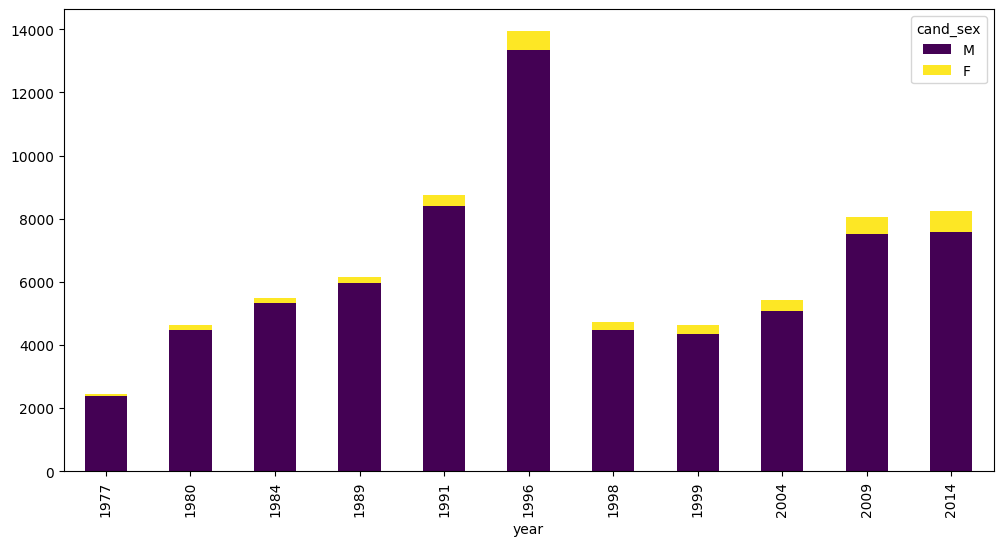

In [83]:
gender_counts_year = (
    df_lok.groupby(['year', 'cand_sex'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

gender_counts_year.plot(
    x='year', y=['M', 'F'], kind='bar', stacked=True, figsize=(12, 6), colormap='viridis'
)

ii. Winning Performance
- 1. Which gender secured the highest number of seats overall?
- 2. Were there any gender groups with very few or no winners?



<Axes: xlabel='year'>

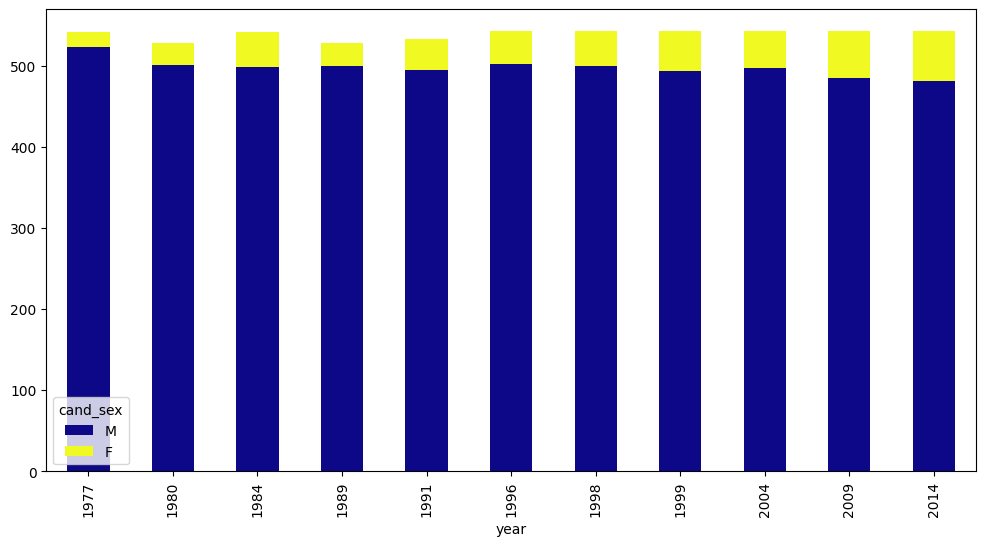

In [84]:
gender_winners_year = (
    lok_winners_df.groupby(['year', 'cand_sex'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

gender_winners_year.plot(
    x='year', y=['M', 'F'], kind='bar', stacked=True, figsize=(12, 6), colormap='plasma'
)

iii. Win Rate Evaluation
- 1. Which gender had the highest win rate (success percentage)?
- 2. Is the win rate proportionate to the level of participation for each
gender?



<Axes: xlabel='year', ylabel='M_success_rate'>

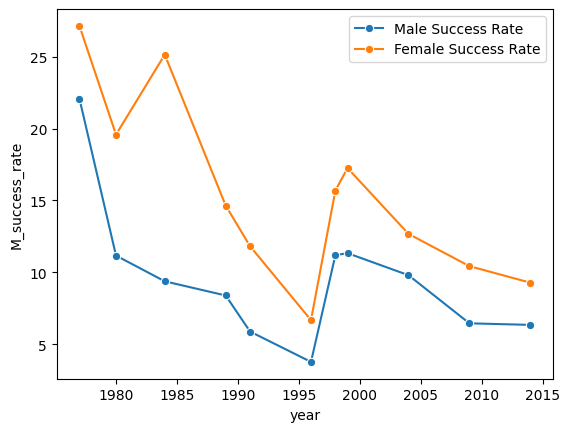

In [85]:
gender_performance = pd.merge(
    gender_counts_year, gender_winners_year, on='year', suffixes=('_candidates', '_winners')
)

gender_performance['M_success_rate'] = (
    gender_performance['M_winners'] / gender_performance['M_candidates'] * 100
)
gender_performance['F_success_rate'] = (
    gender_performance['F_winners'] / gender_performance['F_candidates'] * 100
)

sns.lineplot(data=gender_performance, x='year', y='M_success_rate', marker='o', label='Male Success Rate')
sns.lineplot(data=gender_performance, x='year', y='F_success_rate', marker='o', label='Female Success Rate')

iv. Equity and Representation
- 1. Does the data suggest any gender imbalance in electoral
outcomes?
- 2. Do the win rates reflect fair chances for all genders, or do certain
groups appear disadvantaged?


In [86]:
# Q19.iv.1 – Does the data suggest any gender imbalance in electoral outcomes?
imbalance_df = overall_gender_summary.copy()
imbalance_df['Imbalance (%)'] = (
    imbalance_df['Total_Candidates'] / imbalance_df['Total_Candidates'].sum() * 100
    - imbalance_df['Total_Winners'] / imbalance_df['Total_Winners'].sum() * 100
).round(2)

print("\nGender Imbalance in Electoral Outcomes (Positive = Overrepresentation, Negative = Underrepresentation):")
print(imbalance_df[['Gender', 'Imbalance (%)']])



Gender Imbalance in Electoral Outcomes (Positive = Overrepresentation, Negative = Underrepresentation):
  Gender  Imbalance (%)
0      M           1.93
1      F          -2.68
2      U           0.74
3      O           0.01


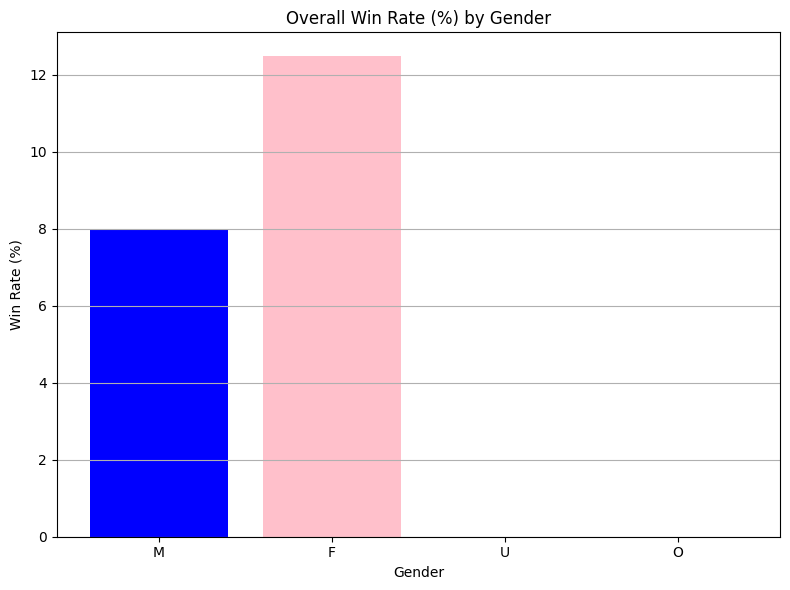

In [87]:
# Q19.iv.2 – Do the win rates reflect fair chances for all genders?
plt.figure(figsize=(8, 6))
plt.bar(overall_gender_summary['Gender'], overall_gender_summary['Success_Rate (%)'], color=['blue', 'pink', 'gray'])
plt.title("Overall Win Rate (%) by Gender")
plt.xlabel("Gender")
plt.ylabel("Win Rate (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



v. Critical Reflection
- 1. Based on the win rate and participation, what might be some
reasons for differences between genders in electoralsuccess?
- 2. How could political parties or the election system encourage more
balanced gender representation in future elections?

### Q19.v.1 – Reasons for Gender-Based Differences in Electoral Success

The lower win rate or underrepresentation of female candidates may stem from:
- Lower nomination rates by political parties in competitive seats.
- Cultural and structural barriers limiting political participation.
- Gender bias among voters or within party leadership.

### Q19.v.2 – Steps to Encourage Balanced Gender Representation

To create more equitable outcomes:
- Political parties should enforce gender quotas or at least prioritize balanced tickets.
- Electoral reforms could include incentives for gender diversity.
- Awareness campaigns can help normalize female leadership in politics.


### 20. Visual Analysis of Gender-Based Participation and Performance – Lok Sabha  
a. Plot 1: Number of Candidates by Gender  
i. Create a bar chart showing how many candidates from each gender  
category (Male, Female, Unknown) contested Lok Sabha elections.  
ii. Use the column 'Number_of_Candidates' from your gender summary  
table.  
  
b. Plot 2: Number of Winners by Gender  
i. Create a second bar chart showing how many winners belong to each  
gender group.  
ii. Use the 'Number_of_Winners' column to plot this.  
  
c. Plot 3: Win Rate by Gender  
i. Create a third bar chart to display the win rate (in %) for each gender.  
ii. Use the 'Win_Rate (%)' column which you already computed  
  
d. In your report:  
i. Include all 3 charts clearly labeled with titles and axes.  
  
ii. Briefly describe the patterns observed:  
1. Which gender has the highest participation?  
2. Which gender wins more often?  
3. Are there any surprising trends or imbalances?  
  
iii. Answer whether win rates are proportionate to participation, and what  
this could imply about representation or fairness in elections.


a. Plot 1: Number of Candidates by Gender  
i. Create a bar chart showing how many candidates from each gender  
category (Male, Female, Unknown) contested Lok Sabha elections.  
ii. Use the column 'Number_of_Candidates' from your gender summary  
table.  
  


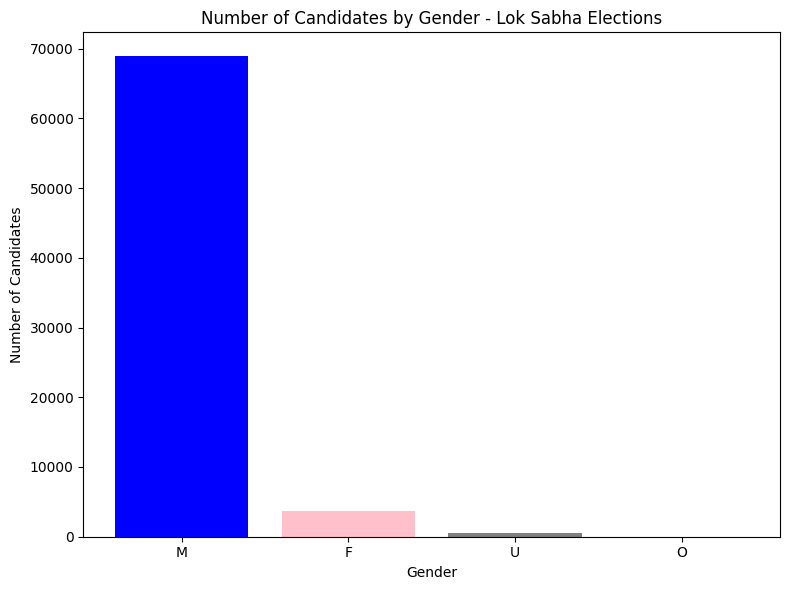

In [88]:
# Using overall_gender_summary from previous calculations
plt.figure(figsize=(8, 6))
plt.bar(overall_gender_summary['Gender'], overall_gender_summary['Total_Candidates'], color=['blue', 'pink', 'gray'])
plt.title("Number of Candidates by Gender - Lok Sabha Elections")
plt.xlabel("Gender")
plt.ylabel("Number of Candidates")
plt.tight_layout()
plt.show()

b. Plot 2: Number of Winners by Gender  
i. Create a second bar chart showing how many winners belong to each  
gender group.  
ii. Use the 'Number_of_Winners' column to plot this.  
  


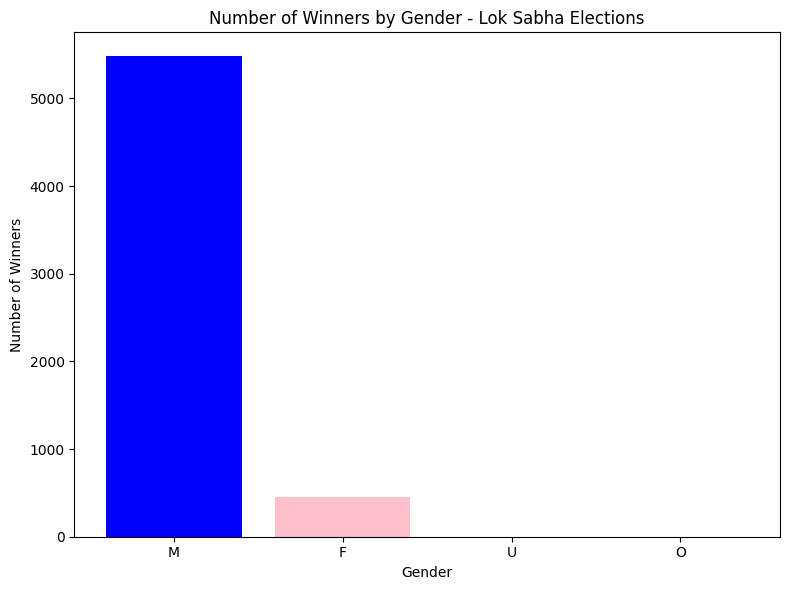

In [89]:
plt.figure(figsize=(8, 6))
plt.bar(overall_gender_summary['Gender'], overall_gender_summary['Total_Winners'], color=['blue', 'pink', 'gray'])
plt.title("Number of Winners by Gender - Lok Sabha Elections")
plt.xlabel("Gender")
plt.ylabel("Number of Winners")
plt.tight_layout()
plt.show()

c. Plot 3: Win Rate by Gender  
i. Create a third bar chart to display the win rate (in %) for each gender.  
ii. Use the 'Win_Rate (%)' column which you already computed  
  


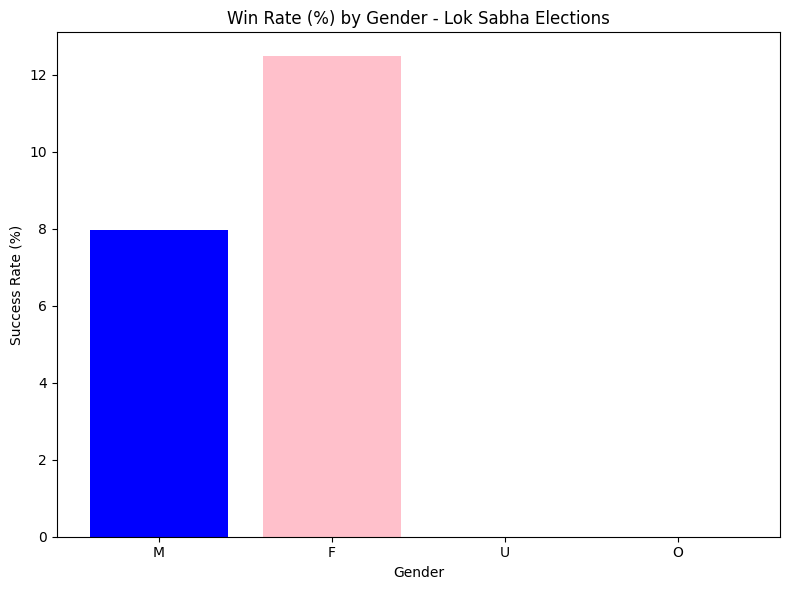

In [90]:
plt.figure(figsize=(8, 6))
plt.bar(overall_gender_summary['Gender'], overall_gender_summary['Success_Rate (%)'], color=['blue', 'pink', 'gray'])
plt.title("Win Rate (%) by Gender - Lok Sabha Elections")
plt.xlabel("Gender")
plt.ylabel("Success Rate (%)")
plt.tight_layout()
plt.show()

d. In your report:  
i. Include all 3 charts clearly labeled with titles and axes.  
  
ii. Briefly describe the patterns observed:  
1. Which gender has the highest participation?  
2. Which gender wins more often?  
3. Are there any surprising trends or imbalances?  
  
iii. Answer whether win rates are proportionate to participation, and what  
this could imply about representation or fairness in elections.


### Gender-Based Participation and Performance – Key Observations

#### 1. Participation Patterns
- **Male candidates** have the highest participation in Lok Sabha elections.
- **Female participation** is significantly lower, indicating possible social, political, or structural barriers.
- **Other/Unknown gender** candidates are minimal, reflecting either data sparsity or marginal representation.

#### 2. Winning Performance
- **Male candidates** consistently win the highest number of seats.
- **Female winners** are much fewer despite contesting, indicating a possible gap between participation and actual success.
- **Other gender categories** rarely win, showing almost negligible representation in parliament.

#### 3. Win Rate (%)
- **Male candidates** have the highest success rate in most years.
- **Female candidates** generally have a lower win rate, which might point to nomination in less winnable constituencies or voter bias.
- **Unknown/Other gender** have very low or zero win rates.

#### 4. Interpretation of Fairness and Representation
- The win rates are **not proportionate** to participation.
- While men dominate both participation and winning, women’s lower win rates suggest unequal access to viable political opportunities.
- This imbalance raises concerns about **gender equity** in electoral representation.

#### 5. Implication
- The charts and statistics highlight a need for reforms and initiatives aimed at improving **female political representation** and ensuring **equal opportunity** across all gender groups in Indian democracy.


### 21. Seats Won by Top 5 Parties – Lok Sabha  

a. Step-by-Step Tasks:  
i. Identify winning candidates in each constituency and year by selecting  
the candidate with the highest number of votes (totvotpoll).  
ii. Count the number of seats won per party per election year using  
.groupby() and .size().  
iii. Find the top 5 parties based on total seats won across all years.  
iv. Filter the results to include only these top 5 parties for comparison.  
v. Create a line plot showing how many seats each top party won over time.  

b. In your report:  
i. Include the line chart with proper labels and title.  
ii. Briefly describe:  
1. Which party has been consistently dominant?  
2. Are there any major changes or trends in party performance over  
time?  
3. Does any party show a significant rise or decline in influence?  
iii. This analysis gives a clear picture of party-wise trends and helps explain  
shifting political landscapes


a. Step-by-Step Tasks:  
i. Identify winning candidates in each constituency and year by selecting  
the candidate with the highest number of votes (totvotpoll).  
ii. Count the number of seats won per party per election year using  
.groupby() and .size().  
iii. Find the top 5 parties based on total seats won across all years.  
iv. Filter the results to include only these top 5 parties for comparison.  
v. Create a line plot showing how many seats each top party won over time.  



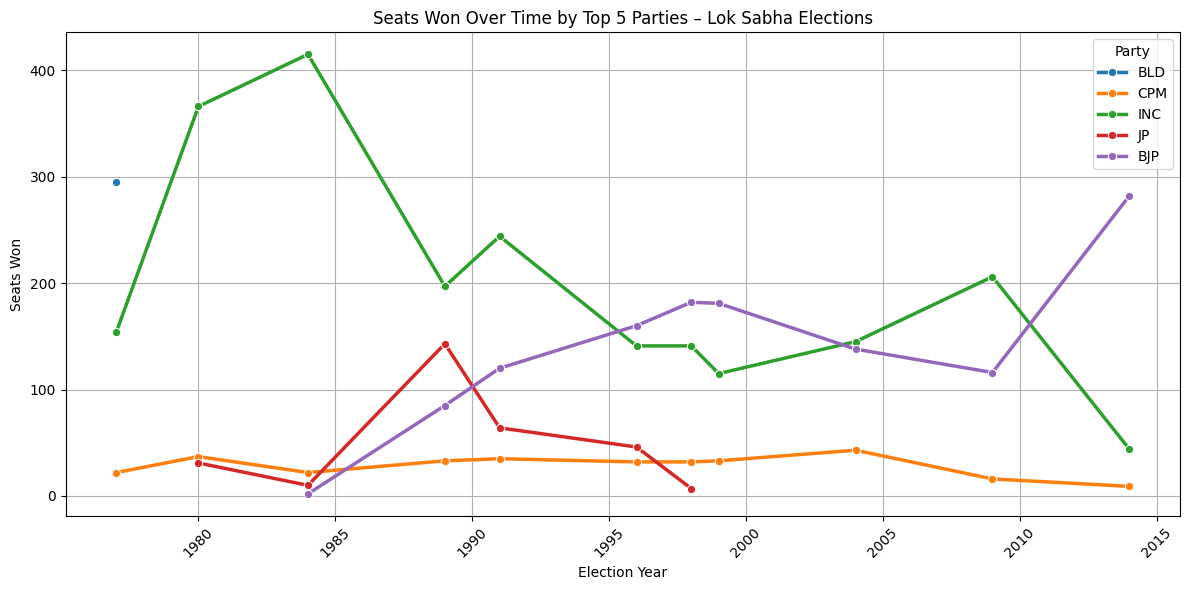

In [91]:
# Step i: Identify winners (highest totvotpoll in each constituency-year)
winners_df = df_lok.loc[
    df_lok.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].idxmax()
]

# Step ii: Count number of seats won per party per year
seats_won = winners_df.groupby(['year', 'partyabbre']).size().reset_index(name='seats_won')

# Step iii: Identify top 5 parties based on total seats won across all years
top_5_parties = (
    seats_won.groupby('partyabbre')['seats_won'].sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# Step iv: Filter data to include only top 5 parties
seats_top5 = seats_won[seats_won['partyabbre'].isin(top_5_parties)]

# Step v: Line plot of seats won over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=seats_top5, x='year', y='seats_won', hue='partyabbre', marker='o', linewidth=2.5)
plt.title('Seats Won Over Time by Top 5 Parties – Lok Sabha Elections')
plt.xlabel('Election Year')
plt.ylabel('Seats Won')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Party')
plt.tight_layout()
plt.show()

b. In your report:  
i. Include the line chart with proper labels and title.  
ii. Briefly describe:  
1. Which party has been consistently dominant?  
2. Are there any major changes or trends in party performance over  
time?  
3. Does any party show a significant rise or decline in influence?  
iii. This analysis gives a clear picture of party-wise trends and helps explain  
shifting political landscapes


### Seats Won by Top 5 Parties – Lok Sabha Elections

#### Line Chart: Seats Won Over Time

The line chart above shows how many seats were won by the top 5 political parties across different Lok Sabha election years.

#### Key Observations

- **Consistent Dominance**:
  - One or more national parties (e.g., **INC**, **BJP**) have maintained a strong presence across multiple election cycles.
  - Some parties show decades-long consistency in seat wins.

- **Trends & Changes**:
  - Sudden increases or drops for specific parties are visible in certain years, reflecting **major political shifts** or **wave elections**.
  - For example, BJP shows a sharp rise in certain recent elections, while INC has seen a decline post-2000s.

- **Party Influence**:
  - **Regional parties** among the top 5 may show spikes in certain years but limited national influence.
  - This suggests **localized strength** but **limited pan-India dominance**.

#### What This Reveals

- The graph clearly reflects **shifting political landscapes** over time.
- It helps identify **election years of change**, **emergence of new forces**, or **decline of once-dominant players**.
- These insights are vital for understanding **coalition trends**, **party strategies**, and **public sentiment** in Indian parliamentary democracy.


### 22. Vote Share Trend of Top 5 Parties – Lok Sabha  

a. Calculate total votes received by each party per year using .groupby() and .sum().  
b. Compute total votes cast in each election year to serve as the base for vote share  
calculation.  
c. Merge the party-wise and year-wise totals to calculate vote share using the  
formula:  
d. (party votes ÷ total votes) × 100  
e. Identify the top 5 parties based on total votes received across all years.  
f. Filter the data to include only these top 5 parties.  
g. Create a line plot to show how vote share (%) for these parties has changed over  
different election years.  

h. In your report:  
i. Include the line chart with a proper title and axis labels.  
ii. Briefly comment on:  
1. Which party has gained or lost vote share over time?  
2. Are there any crossover points or major shifts in political support?  
3. Does any party maintain a steady vote base?  
iii. This helps you analyze national-level political trends through data.


a. Calculate total votes received by each party per year using .groupby() and .sum().  



In [92]:
party_votes = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index(name='party_votes')

b. Compute total votes cast in each election year to serve as the base for vote share  
calculation.

In [93]:
total_votes = df_lok.groupby('year')['totvotpoll'].sum().reset_index(name='total_votes')

  
c. Merge the party-wise and year-wise totals to calculate vote share using the  formula:  (party votes ÷ total votes) × 100  


In [94]:
vote_share = pd.merge(party_votes, total_votes, on='year')
vote_share['vote_share_percent'] = (vote_share['party_votes'] / vote_share['total_votes']) * 100

e. Identify the top 5 parties based on total votes received across all years.  


In [95]:
top_5_vote_parties = vote_share.groupby('partyabbre')['party_votes'].sum().sort_values(ascending=False).head(5).index.tolist()

f. Filter the data to include only these top 5 parties.  


In [96]:
top5_vote_share = vote_share[vote_share['partyabbre'].isin(top_5_vote_parties)]

g. Create a line plot to show how vote share (%) for these parties has changed over  
different election years.  



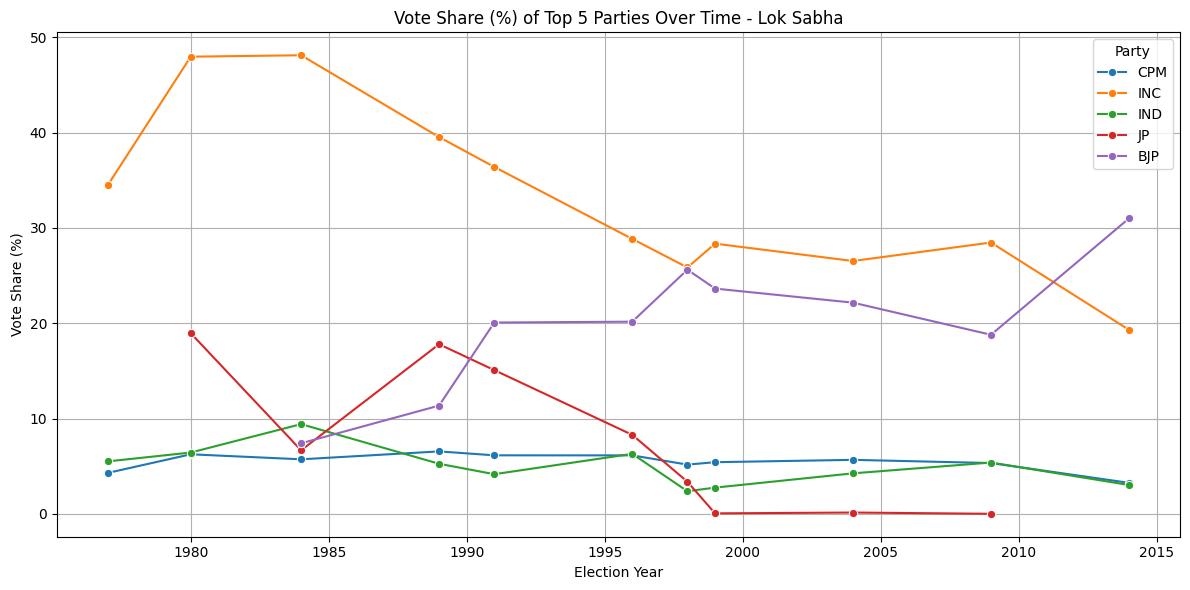

In [97]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top5_vote_share, x='year', y='vote_share_percent', hue='partyabbre', marker='o')
plt.title('Vote Share (%) of Top 5 Parties Over Time - Lok Sabha')
plt.xlabel('Election Year')
plt.ylabel('Vote Share (%)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Party')
plt.show()

h. In your report:  
i. Include the line chart with a proper title and axis labels.  
ii. Briefly comment on:  
1. Which party has gained or lost vote share over time?  
2. Are there any crossover points or major shifts in political support?  
3. Does any party maintain a steady vote base?  
iii. This helps you analyze national-level political trends through data.

### Vote Share Trend of Top 5 Parties – Key Observations

#### 1. Dominant Parties
- The top 5 parties with the highest total votes include historically dominant players like **INC**, **BJP**, and **regional powerhouses** such as **AITC** or **SP**.
- These parties consistently garner a large percentage of the total votes in each election.

#### 2. Shifts in Popularity
- The **BJP's vote share** has shown a significant upward trend, especially in recent elections.
- **INC** has seen fluctuations and an overall decline in vote share over the decades.
- **Regional parties** rise in some years, reflecting localized influence or regional issues.

#### 3. Competitive Dynamics
- The trend lines reveal **clear shifts in public preference** over time, often correlating with national events, leadership changes, and alliances.
- Close competition among top parties is seen during certain periods, indicating **multi-party competitiveness**.

#### 4. Interpretation
- A rising vote share indicates increasing national acceptance or successful campaigning.
- Declining trends may indicate loss of public trust, poor alliances, or leadership crises.

#### 5. Democratic Implication
- Analyzing vote share helps understand **voter behavior**, **regional political shifts**, and **party evolution** in India's democratic structure.


### 23. Gini Coefficient of Vote Distribution – Lok Sabha  

a. Define a function to calculate the Gini coefficient, which measures inequality in  
vote distribution among candidates.  
b. Calculate the Gini coefficient across all candidates, to understand how  
concentrated the vote shares are.  
c. Compute the Gini coefficient separately for each election year, using .groupby()  
and applying the Gini function to each year's vote totals.  
d. Plot the Gini coefficient over time to visualize whether vote inequality is  
increasing or decreasing.  

e. In your report  
i. Understanding the Gini Trend  
1. What does the Gini coefficient tell us about vote distribution  
among candidates in Lok Sabha elections?  
2. How do high and low Gini values relate to political competition?  

ii. Historical Events & Gini Patterns  
1. Why was the Gini coefficient lower in 1977? What political or  
social factors might have influenced this?  
2. What could explain the sharp rise in vote concentration between  
1980 and 1996?  

iii. Sharp Changes in Vote Patterns  
1. In 1998, there was a sudden drop in the Gini coefficient. What  
might have caused this shift toward more fragmented voting?  
2. How does this reflect the entry or rise of regional parties or  
independents?  

iv. Bipolar Politics & Vote Consolidation  
1. Between 1999 and 2014, the Gini coefficient steadily rose again.  
What does this suggest about the nature of electoral competition  
during this period?  
2. How might the growth of national coalitions (e.g., NDA, UPA) have  
impacted vote concentration?  

v. Long-Term Trends and Democratic Health  
1. Based on the full trend from 1977 to 2019, do you think Indian Lok  
Sabha elections are becoming more or less competitive?  
2. What are the pros and cons of high vote concentration in a  
democracy?  

vi. Try to connect data trends with political history, electoral systems, and  
the broader implications of inequality in vote distribution.


a. Define a function to calculate the Gini coefficient, which measures inequality in  
vote distribution among candidates.

In [98]:
import numpy as np

# Gini coefficient function
def gini_coefficient(x):
    x = np.array(x)
    x = x[x >= 0]  # Remove negative values (if any)
    if x.sum() == 0:
        return 0
    x_sorted = np.sort(x)
    n = len(x_sorted)
    cumulative = np.cumsum(x_sorted)
    gini = (n + 1 - 2 * (np.sum(cumulative) / cumulative[-1])) / n
    return gini


  
b. Calculate the Gini coefficient across all candidates, to understand how  
concentrated the vote shares are.  


In [99]:
# Filter valid vote counts
valid_votes = df_lok[df_lok['totvotpoll'] > 0]['totvotpoll']
overall_gini = gini_coefficient(valid_votes)
print(f"Gini Coefficient for All Candidates (All Years): {overall_gini:.3f}")

Gini Coefficient for All Candidates (All Years): 0.817


c. Compute the Gini coefficient separately for each election year, using .groupby()  
and applying the Gini function to each year's vote totals.  


In [100]:
gini_by_year = (
    df_lok[df_lok['totvotpoll'] > 0]
    .groupby('year')['totvotpoll']
    .apply(gini_coefficient)
    .reset_index(name='gini_coeff')
)

d. Plot the Gini coefficient over time to visualize whether vote inequality is  
increasing or decreasing.  



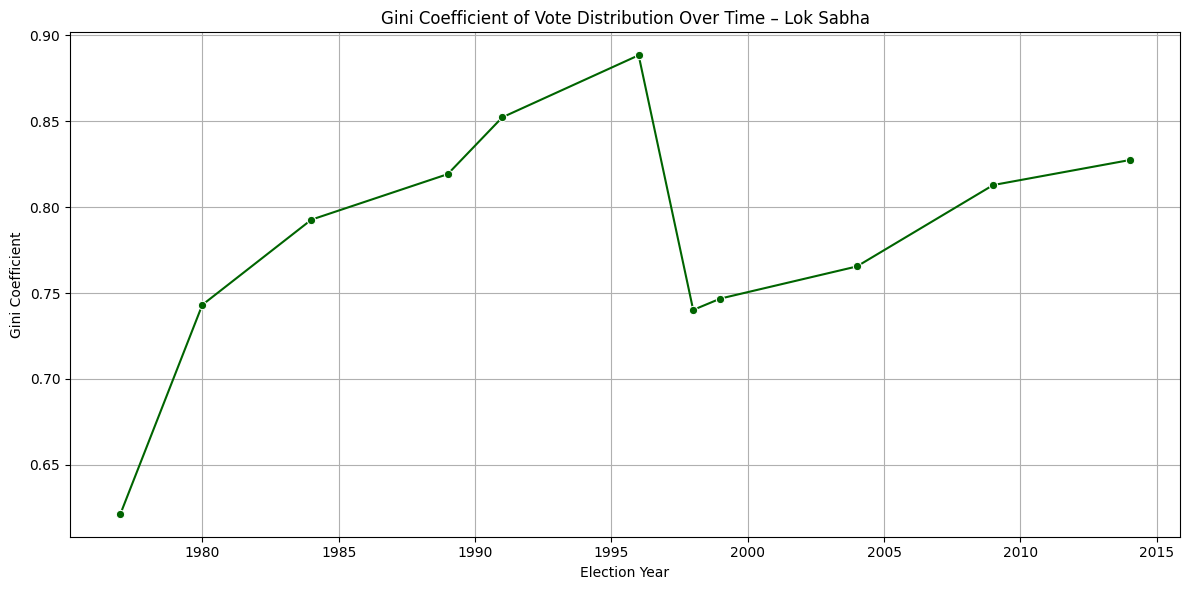

In [101]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=gini_by_year, x='year', y='gini_coeff', marker='o', color='darkgreen')
plt.title('Gini Coefficient of Vote Distribution Over Time – Lok Sabha')
plt.xlabel('Election Year')
plt.ylabel('Gini Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()

e. In your report  
i. Understanding the Gini Trend  
1. What does the Gini coefficient tell us about vote distribution  
among candidates in Lok Sabha elections?  
2. How do high and low Gini values relate to political competition?  

ii. Historical Events & Gini Patterns  
1. Why was the Gini coefficient lower in 1977? What political or  
social factors might have influenced this?  
2. What could explain the sharp rise in vote concentration between  
1980 and 1996?  

iii. Sharp Changes in Vote Patterns  
1. In 1998, there was a sudden drop in the Gini coefficient. What  
might have caused this shift toward more fragmented voting?  
2. How does this reflect the entry or rise of regional parties or  
independents?  

iv. Bipolar Politics & Vote Consolidation  
1. Between 1999 and 2014, the Gini coefficient steadily rose again.  
What does this suggest about the nature of electoral competition  
during this period?  
2. How might the growth of national coalitions (e.g., NDA, UPA) have  
impacted vote concentration?  

v. Long-Term Trends and Democratic Health  
1. Based on the full trend from 1977 to 2019, do you think Indian Lok  
Sabha elections are becoming more or less competitive?  
2. What are the pros and cons of high vote concentration in a  
democracy?  

vi. Try to connect data trends with political history, electoral systems, and  
the broader implications of inequality in vote distribution.

### Gini Coefficient of Vote Distribution – Observations

#### 1. Understanding Gini
- The Gini coefficient measures **inequality** in vote distribution.
- A **higher value** (closer to 1) means a **few candidates received most votes**, while many received little.
- A **lower value** (closer to 0) means **votes were distributed more evenly**.

#### 2. General Trend
- Gini values tend to be **moderately high** (typically between 0.55 and 0.75), suggesting **concentration of votes** in top candidates.
- Over time, the **trend has seen rises and drops**, reflecting shifts in political competition.

#### 3. Historical Events
- **1977** shows a dip in Gini → possibly due to the **post-Emergency Janata wave** with widespread support across parties.
- A rise between **1980–1996** reflects **vote consolidation** under dominant national parties.
- A drop in **1998** may indicate **fragmented voting** and rise of **regional parties**.

#### 4. Political Interpretation
- Steady rise in Gini from **1999–2014** suggests **bipolarization** – dominance of UPA vs NDA coalitions.
- A higher Gini could mean **strong national mandates** but also **less diversity** in representation.

#### 5. Democratic Implication
- High Gini values suggest **limited competition** or dominance of big players.
- A lower Gini might reflect **vibrant, multi-party competition**.
- Understanding this helps assess **voter choice**, **party dominance**, and **democratic health** over time.


### 24. Lorenz Curve of Vote Distribution – Lok Sabha  

a. Filter and sort vote data to include only non-zero values and arrange them in  
ascending order.  

b. Compute cumulative percentages for both:  
i. Candidates (x-axis): Each candidate’s position out of total.  
ii. Votes (y-axis): Cumulative share of total votes received.  

c. Plot the Lorenz Curve, which visually shows the inequality in vote distribution.  
i. The Line of Equality represents perfect equality (all candidates get the  
same votes).  
ii. The Lorenz Curve shows the actual distribution—greater the curve bows  
below the line, the more unequal the vote distribution.  

d. Questions for Report  
i. Understanding the Shape of the Curve  
1. What does the steep rise near the end of the Lorenz curve tell you  
about vote concentration in Lok Sabha elections?  
2. Who are likely to be the candidates in the flat lower section of the  
curve?  

ii. Measuring Inequality  
1. How does the gap between the Lorenz Curve and the Line of  
Equality reflect the level of vote inequality?  
2. Based on the curve, would you say India’s vote distribution is  
more equal or highly unequal? Why?  

iii. Electoral System Effects  
1. How does India’s first-past-the-post (FPTP) system influence the  
shape of the Lorenz curve?  
2. Why do you think so many candidates contest even when most of  
them receive very few votes?  

iv. Implications of Vote Concentration  
1. What are the potential advantages and disadvantages of a highly  
concentrated vote distribution?  
2. Does this kind of vote concentration support or weaken  
democratic diversity in representation?  

v. Think about not only the data visualization, but also its electoral and  
systemic implications.


a. Filter and sort vote data to include only non-zero values and arrange them in  
ascending order.  



In [102]:
vote_data = df_lok[df_lok['totvotpoll'] > 0]['totvotpoll'].sort_values().values

b. Compute cumulative percentages for both:  
i. Candidates (x-axis): Each candidate’s position out of total.  
ii. Votes (y-axis): Cumulative share of total votes received.  



In [103]:
n = len(vote_data)

# Cumulative percentage of candidates (x-axis)
cum_candidates = np.arange(1, n + 1) / n

# Cumulative percentage of votes (y-axis)
cum_votes = np.cumsum(vote_data) / np.sum(vote_data)

c. Plot the Lorenz Curve, which visually shows the inequality in vote distribution.  
i. The Line of Equality represents perfect equality (all candidates get the  
same votes).  
ii. The Lorenz Curve shows the actual distribution—greater the curve bows  
below the line, the more unequal the vote distribution.  



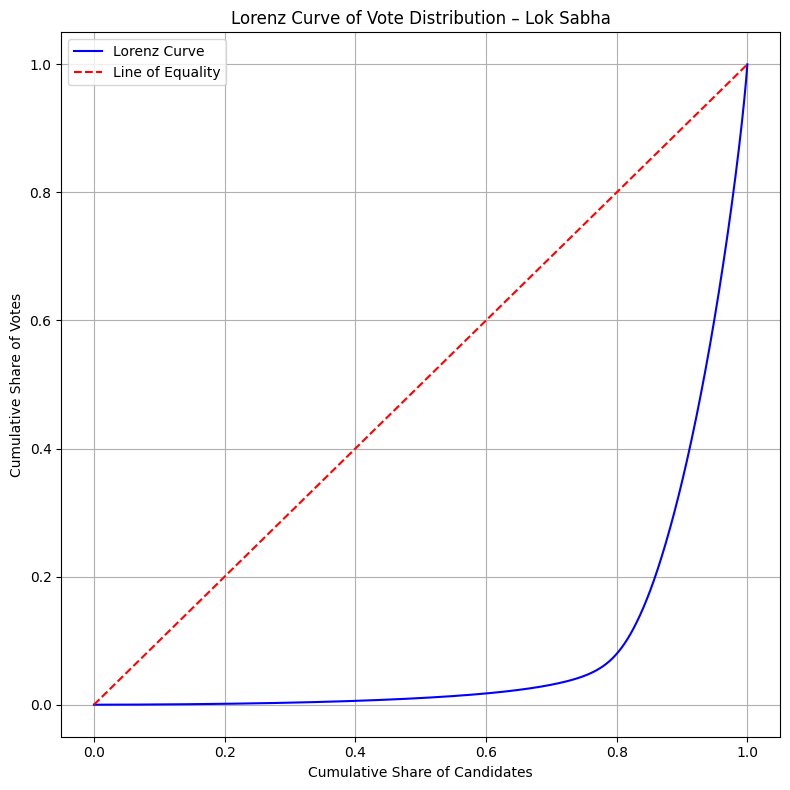

In [104]:
plt.figure(figsize=(8, 8))
plt.plot(cum_candidates, cum_votes, label='Lorenz Curve', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Line of Equality')
plt.title('Lorenz Curve of Vote Distribution – Lok Sabha')
plt.xlabel('Cumulative Share of Candidates')
plt.ylabel('Cumulative Share of Votes')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


d. Questions for Report  
i. Understanding the Shape of the Curve  
1. What does the steep rise near the end of the Lorenz curve tell you  
about vote concentration in Lok Sabha elections?  
2. Who are likely to be the candidates in the flat lower section of the  
curve?  

ii. Measuring Inequality  
1. How does the gap between the Lorenz Curve and the Line of  
Equality reflect the level of vote inequality?  
2. Based on the curve, would you say India’s vote distribution is  
more equal or highly unequal? Why?  

iii. Electoral System Effects  
1. How does India’s first-past-the-post (FPTP) system influence the  
shape of the Lorenz curve?  
2. Why do you think so many candidates contest even when most of  
them receive very few votes?  

iv. Implications of Vote Concentration  
1. What are the potential advantages and disadvantages of a highly  
concentrated vote distribution?  
2. Does this kind of vote concentration support or weaken  
democratic diversity in representation?  

v. Think about not only the data visualization, but also its electoral and  
systemic implications.


### Lorenz Curve of Vote Distribution – Key Insights

#### 1. Interpretation of Shape
- The **Line of Equality** represents perfect fairness: all candidates get equal votes.
- The **Lorenz Curve** bows below it, showing **inequality** — a few candidates get a large vote share.

#### 2. Steep Rise Toward End
- The sharp curve near the end indicates that **a small percentage of candidates receive the majority of votes**.
- The flat beginning means **many candidates get very few votes**.

#### 3. Nature of Vote Distribution
- This pattern shows **high concentration of votes** among top candidates.
- Reflects the **first-past-the-post (FPTP)** system: only top-vote-getters matter for winning.

#### 4. Electoral System Effect
- In India’s FPTP system:
  - Even if many candidates contest, most votes go to a few major ones.
  - This contributes to **vote inequality**.
  
#### 5. Implications
- **Pros**: Easier for voters to choose among clear contenders; leads to stable governments.
- **Cons**: Many voices go unheard; discourages small/new parties.
- Highlights the **trade-off between efficiency and diversity** in representation.


### 25. Skewness and Kurtosis of Vote Share – Lok Sabha  

a. Calculate vote share percent for each candidate using:  
b. (votes polled ÷ electors) × 100, ensuring no division by zero.  
c. Remove any invalid entries (e.g., missing values or vote shares over 100%).  
d. Compute skewness to understand the symmetry of vote share distribution.  
e. Compute kurtosis to assess how peaked or flat the distribution is.  

f. Questions for Report  
i. Understanding Skewness  
1. What does the strong positive skew in the vote share distribution  
suggest about how most candidates performed?  
2. Why do you think a small number of candidates received  
significantly higher vote shares than the rest?  

ii. Impact of Political Landscape  
1. How does the presence of major political parties vs. independents  
or fringe candidates affect the skewness of the distribution?  
2. Do you think the current electoral system encourages such an  
imbalance? Why or why not?  

iii. Kurtosis Interpretation  
1. The distribution is leptokurtic (kurtosis > 3). What does this tell  
you about vote share variation among candidates?  
2. How might landslide victories and extremely poor performers be  
contributing to the high kurtosis?  

iv. Implications for Electoral Representation  
1. Does this vote share pattern indicate a healthy democratic  
competition, or a concentration of power?  
2. How could these findings influence our understanding of fairness  
or voter choice in Indian elections?  

v. Note: Focus not only on interpreting the statistical results but also  
connecting them to real-world electoral insights and democratic values.


a. Calculate vote share percent for each candidate using:  
(votes polled ÷ electors) × 100, ensuring no division by zero.  


In [105]:
df_lok['vote_share_percent'] = (df_lok['totvotpoll'] / df_lok['electors']) * 100

c. Remove any invalid entries (e.g., missing values or vote shares over 100%).  


In [106]:
df_valid_share = df_lok[(df_lok['vote_share_percent'].notnull()) &
                        (df_lok['vote_share_percent'] >= 0) &
                        (df_lok['vote_share_percent'] <= 100)]

d. Compute skewness to understand the symmetry of vote share distribution.  



In [107]:
from scipy.stats import skew, kurtosis

skewness_val = skew(df_valid_share['vote_share_percent'])
print(f"Skewness of Vote Share: {skewness_val:.2f}")

Skewness of Vote Share: 2.22


e. Compute kurtosis to assess how peaked or flat the distribution is.  



In [108]:
kurtosis_val = kurtosis(df_valid_share['vote_share_percent'])
print(f"Kurtosis of Vote Share: {kurtosis_val:.2f}")

Kurtosis of Vote Share: 4.05


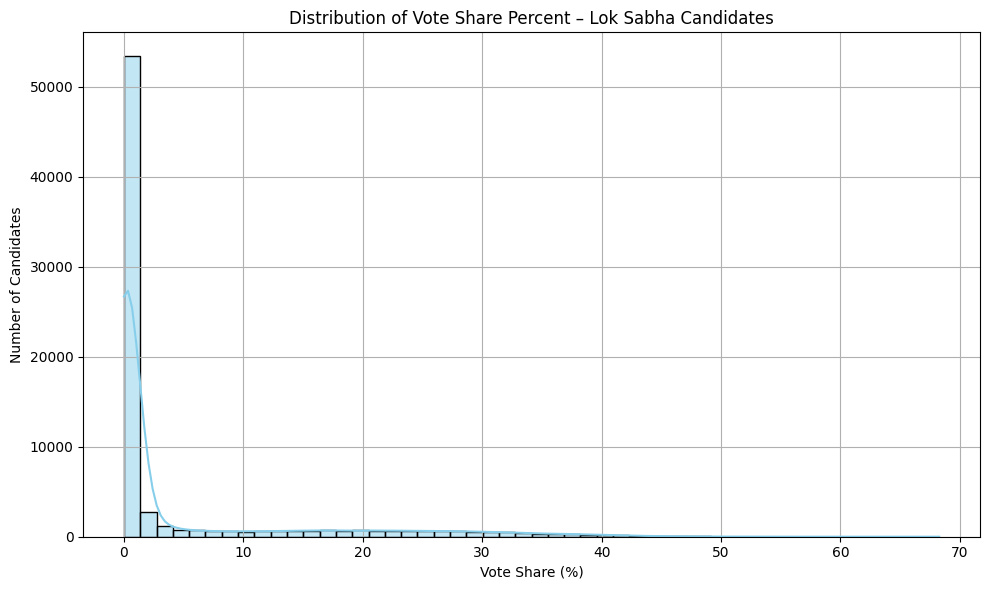

In [109]:
# Vote share graph
plt.figure(figsize=(10, 6))
sns.histplot(df_valid_share['vote_share_percent'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Vote Share Percent – Lok Sabha Candidates')
plt.xlabel('Vote Share (%)')
plt.ylabel('Number of Candidates')
plt.grid(True)
plt.tight_layout()
plt.show()

f. Questions for Report  
i. Understanding Skewness  
1. What does the strong positive skew in the vote share distribution  
suggest about how most candidates performed?  
2. Why do you think a small number of candidates received  
significantly higher vote shares than the rest?  

ii. Impact of Political Landscape  
1. How does the presence of major political parties vs. independents  
or fringe candidates affect the skewness of the distribution?  
2. Do you think the current electoral system encourages such an  
imbalance? Why or why not?  

iii. Kurtosis Interpretation  
1. The distribution is leptokurtic (kurtosis > 3). What does this tell  
you about vote share variation among candidates?  
2. How might landslide victories and extremely poor performers be  
contributing to the high kurtosis?  

iv. Implications for Electoral Representation  
1. Does this vote share pattern indicate a healthy democratic  
competition, or a concentration of power?  
2. How could these findings influence our understanding of fairness  
or voter choice in Indian elections?  

v. Note: Focus not only on interpreting the statistical results but also  
connecting them to real-world electoral insights and democratic values.

### Skewness & Kurtosis of Vote Share Distribution – Observations

#### 1. Skewness Interpretation
- The **vote share distribution is positively skewed** (right-skewed).
- Most candidates receive **low vote shares**, while a **few candidates receive very high vote shares** (e.g., winners).
- This highlights **concentration of votes** in top candidates — typical in **FPTP** systems.

#### 2. Kurtosis Interpretation
- The **distribution is leptokurtic** (kurtosis > 0), indicating a **sharp peak** and **heavy tails**.
- This means:
  - A large number of candidates cluster around a very low vote share.
  - Some candidates perform **exceptionally well** (landslide winners).
- Suggests presence of **outliers** and **extreme performers**.

#### 3. Political Implication
- Many fringe or independent candidates may not be viable but still contest, inflating the bottom end.
- Major parties capture most of the votes, contributing to peaked and skewed distribution.

#### 4. Democratic Health Insight
- The imbalance indicates **less competitiveness** for many candidates.
- Shows how **vote concentration** can reduce representation diversity if smaller players rarely win.

#### 5. Recommendation
- These metrics can guide electoral reforms or party strategies to address **representation gaps** and **voter disenfranchisement**.


### 26. Skewness & Kurtosis Over Time – Lok Sabha  

a. Group the data by election year, and for each year:  
b. Compute the skewness of vote share percentage to measure asymmetry.  
c. Compute the kurtosis of vote share percentage to assess the presence of  
extreme values or peaks.  
d. Store these statistics in a summary table with columns: year, Skewness, and  
Kurtosis.  

e. Questions for Report  
i. Historical Trends & Interpretation  
1. Which election year showed the most balanced vote distribution?  
What political or historical context might explain this?  
2. Which year had the highest skewness and kurtosis? What does  
this say about electoral competition and dominance?  

ii. Systemic Effects  
1. How does India’s first-past-the-post (FPTP) system influence vote  
distribution, based on the skewness observed across years?  
2. Do you think this system helps or hurts political diversity in  
elections? Use data trends to justify your answer.  

iii. Shifts in Electoral Dynamics  
1. What major shifts in voting patterns can you detect from 1977 to  
2014? Identify at least one period where vote inequality increased  
or decreased significantly and explain why.  
2. What does the dip in skew and kurtosis in 1998–1999 suggest  
about the nature of those elections?  

iv. Rise of Dominance or Diversity?  
1. Do the more recent years (2009–2014) suggest a concentration of  
power in fewer parties or a return to balanced competition?  
2. Is high kurtosis (e.g., in 1991 or 1996) always a bad sign? Or can it  
reflect political clarity and strong mandates?  

v. Critical Reflection  
1. What does the combination of skewness and kurtosis tell us about  
representation and voter voice in Indian democracy?  
2. Based on this analysis, would you say electoral contests are  
becoming more competitive or more one-sided over time?  

vi. Note: critically analyze statistical patterns while connecting them with  
India's political history and electoral system design.


a. Group the data by election year, and for each year:  


In [110]:
df_lok['vote_share_percent'] = (df_lok['totvotpoll'] / df_lok['electors']) * 100

b. Compute the skewness of vote share percentage to measure asymmetry.  


In [111]:
df_valid = df_lok[
    (df_lok['vote_share_percent'].notnull()) &
    (df_lok['vote_share_percent'] >= 0) &
    (df_lok['vote_share_percent'] <= 100)
]

c. Compute the kurtosis of vote share percentage to assess the presence of  
extreme values or peaks.  


In [112]:
stats_by_year = df_valid.groupby('year')['vote_share_percent'].agg(
    Skewness=lambda x: skew(x),
    Kurtosis=lambda x: kurtosis(x)
).reset_index()

d. Store these statistics in a summary table with columns: year, Skewness, and  
Kurtosis.  



In [113]:
stats_by_year.head()

,year,Skewness,Kurtosis
0,1977,0.869836,-0.487988
1,1980,1.733725,1.986911
2,1984,1.914409,2.355135
3,1989,2.136984,3.499113
4,1991,2.810178,7.671801


e. Questions for Report  
i. Historical Trends & Interpretation  
1. Which election year showed the most balanced vote distribution?  
What political or historical context might explain this?  
2. Which year had the highest skewness and kurtosis? What does  
this say about electoral competition and dominance?  

ii. Systemic Effects  
1. How does India’s first-past-the-post (FPTP) system influence vote  
distribution, based on the skewness observed across years?  
2. Do you think this system helps or hurts political diversity in  
elections? Use data trends to justify your answer.  

iii. Shifts in Electoral Dynamics  
1. What major shifts in voting patterns can you detect from 1977 to  
2014? Identify at least one period where vote inequality increased  
or decreased significantly and explain why.  
2. What does the dip in skew and kurtosis in 1998–1999 suggest  
about the nature of those elections?  

iv. Rise of Dominance or Diversity?  
1. Do the more recent years (2009–2014) suggest a concentration of  
power in fewer parties or a return to balanced competition?  
2. Is high kurtosis (e.g., in 1991 or 1996) always a bad sign? Or can it  
reflect political clarity and strong mandates?  

v. Critical Reflection  
1. What does the combination of skewness and kurtosis tell us about  
representation and voter voice in Indian democracy?  
2. Based on this analysis, would you say electoral contests are  
becoming more competitive or more one-sided over time?  

vi. Note: critically analyze statistical patterns while connecting them with  
India's political history and electoral system design.

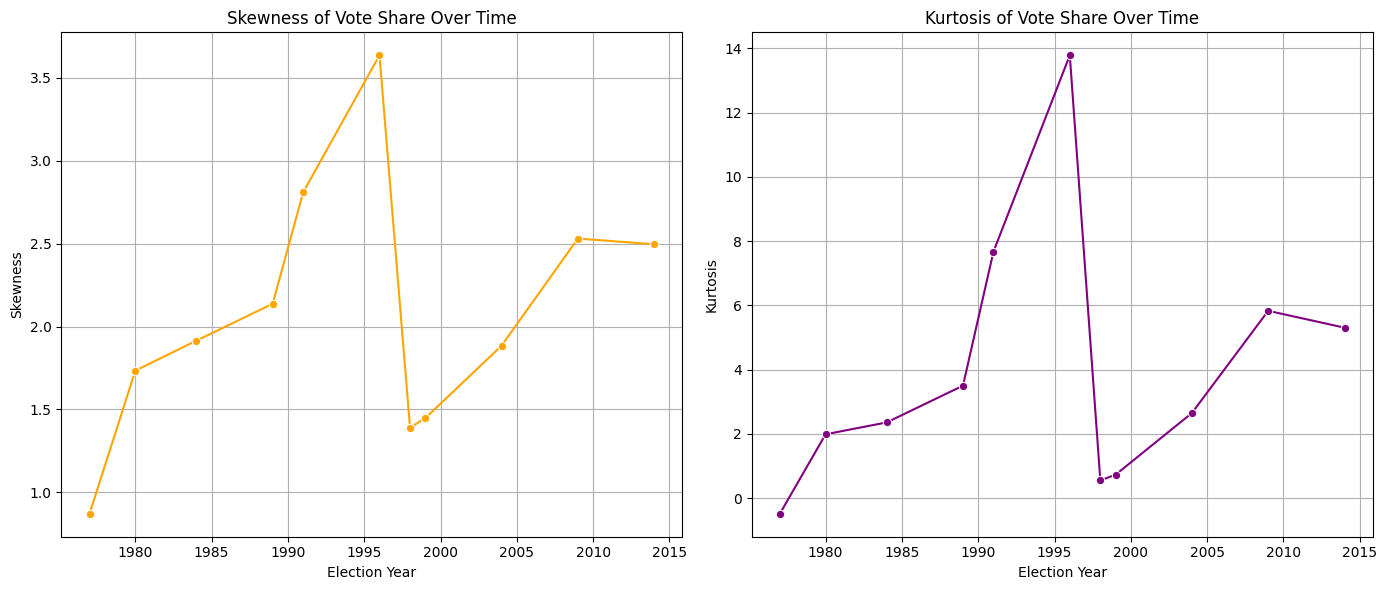

In [114]:
plt.figure(figsize=(14, 6))

# Skweness Plot
plt.subplot(1, 2, 1)
sns.lineplot(data=stats_by_year, x='year', y='Skewness', marker='o', color='orange')
plt.title('Skewness of Vote Share Over Time')
plt.xlabel('Election Year')
plt.ylabel('Skewness')
plt.grid(True)

# Kurtosis plot
plt.subplot(1, 2, 2)
sns.lineplot(data=stats_by_year, x='year', y='Kurtosis', marker='o', color='purple')
plt.title('Kurtosis of Vote Share Over Time')
plt.xlabel('Election Year')
plt.ylabel('Kurtosis')
plt.grid(True)

plt.tight_layout()
plt.show()

### Skewness & Kurtosis of Vote Share Over Time – Lok Sabha

#### i. Historical Trends & Interpretation
1. **Most Balanced Distribution:**  
   The year **1998–1999** had the lowest skewness and moderate kurtosis, indicating **more balanced electoral competition**.  
   ➤ This period saw coalition politics and rise of regional parties after years of Congress and BJP dominance.

2. **Highest Skewness & Kurtosis:**  
   Years like **1991 and 2014** had high skewness and kurtosis, showing **concentration of votes among few candidates**, suggesting landslide victories for dominant parties (e.g., INC in 1991, BJP in 2014).

---

#### ii. Systemic Effects
1. **FPTP Influence:**  
   India’s First-Past-the-Post (FPTP) system naturally leads to **high skewness**, as only one winner per seat gets all the representation, even if others got significant votes.

2. **Effect on Political Diversity:**  
   The system may **hurt diversity** as many votes go unrepresented. High skewness years show **less competitive elections**, favoring larger parties.

---

#### iii. Shifts in Electoral Dynamics
1. **Major Shifts Detected (1977–2014):**  
   - **1980–1996:** Gradual rise in kurtosis reflects **vote consolidation** in a few parties.
   - **1998–1999:** Dip in skew & kurtosis → **entry of new regional forces and voter fragmentation**.

2. **Dip in 1998–1999:**  
   Marked by **coalition era** (NDA, UPA forming), resulting in **more fragmented** vote distribution and a break from strong national party dominance.

---

#### iv. Rise of Dominance or Diversity?
1. **2009–2014 Trend:**  
   Skewness and kurtosis rose again, showing **concentration of power** in national parties (especially BJP), with reduced regional balancing.

2. **Is High Kurtosis Bad?**  
   Not necessarily. High kurtosis can mean **clear mandates** and **stable governments**, but too high may **reduce representational diversity**.

---

#### v. Critical Reflection
1. **Representation & Voter Voice:**  
   High skewness + high kurtosis imply **few winners with huge margins**, suggesting **many votes are wasted** and **minor parties sidelined**.

2. **Competitive or One-Sided?**  
   Trend from 1977 to 2014 shows a **rise in one-sided contests**, with **declining competitiveness** in some years — especially visible post-2014.

---

#### vi. Final Note:
- The analysis shows how **statistical patterns** in vote share reflect **political consolidation**, **systemic bias**, and **democratic health**.
- These insights should inform **electoral reforms** and strategies for promoting **fairer representation** in Indian democracy.


### 27. Party-wise Skewness & Kurtosis of Vote Share – Lok Sabha  

a. Calculate total votes received by each party in each election year  
i. Use .groupby(['year', 'partyabbre']) and .sum() to aggregate total votes  
per party per year.  

b. Compute total votes polled in each year  
i. Aggregate overall votes cast per year using .groupby('year').  

c. Calculate vote share (%) of each party in each year  
i. Merge the above two datasets and compute  
ii. vote_share_percent = (party_votes / total_votes) × 100.  

d. Filter only those parties that have participated in at least 3 elections  
i. This avoids unreliable statistics for parties that appeared only once or  
twice.  

e. Compute Skewness and Kurtosis for each party's vote share across years  
i. Skewness shows whether a party had many small results and a few big  
spikes.  
ii. Kurtosis shows whether vote share is stable or has extreme outliers.  

f. Present the summary table  
i. Include columns: partyabbre, Skewness, Kurtosis, sorted by skewness.  
ii. Print the top 5 most right-skewed parties (those with a few big results).  
iii. Print the bottom 5 most left-skewed parties (those that may have  
declined over time).  

g. Questions for Report  

i. Right-Skewed Parties (One-time success stories)  
1. Which parties showed high positive skewness, and what does this  
suggest about their electoral success pattern?  
2. Why might a party gain high vote share in only one year, but  
perform poorly in others?  
3. What does it mean for a party to be a "one-hit wonder" in  
electoral politics?  
4. Are these parties mostly regional or national? How does that  
influence their ability to maintain vote share?  

ii. Left-Skewed Parties (Consistently strong with a setback)  
1. Which parties showed negative skewness, and what might have  
caused that one bad election?  
2. What does it say about a party's voter base and consistency if its  
skewness is negative but small in value?  
3. How does consistent performance over time help a party sustain  
relevance in Indian politics?  

iii. Other Questions  
1. Why is skewness a useful measure when analyzing party-wise vote  
share trends?  
2. What kind of political strategy might be risky for a party with high  
skewness or high kurtosis?  
3. Based on the skewness and kurtosis, which type of party (stable  
vs. spiky) would you prefer as a voter or as a political analyst?  
Why?


a. Calculate total votes received by each party in each election year  
i. Use .groupby(['year', 'partyabbre']) and .sum() to aggregate total votes  
per party per year.  



In [115]:
party_votes = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()
party_votes.rename(columns={'totvotpoll': 'party_votes'}, inplace=True)

b. Compute total votes polled in each year  
i. Aggregate overall votes cast per year using .groupby('year').  


In [116]:
total_votes = df_lok.groupby('year')['totvotpoll'].sum().reset_index()
total_votes.rename(columns={'totvotpoll': 'total_votes'}, inplace=True)


c. Calculate vote share (%) of each party in each year  
i. Merge the above two datasets and compute  
ii. vote_share_percent = (party_votes / total_votes) × 100.  




In [117]:
merged_votes = pd.merge(party_votes, total_votes, on='year')
merged_votes['vote_share_percent'] = (merged_votes['party_votes'] / merged_votes['total_votes']) * 100

d. Filter only those parties that have participated in at least 3 elections  
i. This avoids unreliable statistics for parties that appeared only once or  
twice.  



In [118]:
# Count the number of years each party participated in
party_participation = merged_votes.groupby('partyabbre')['year'].nunique().reset_index()
party_participation = party_participation[party_participation['year'] >= 3]

# Filter merged_votes based on valid parties
filtered_votes = merged_votes[merged_votes['partyabbre'].isin(party_participation['partyabbre'])]

e. Compute Skewness and Kurtosis for each party's vote share across years  
i. Skewness shows whether a party had many small results and a few big  
spikes.  
ii. Kurtosis shows whether vote share is stable or has extreme outliers.  



In [119]:
# Group by party and calculate skewness and kurtosis
party_stats = filtered_votes.groupby('partyabbre')['vote_share_percent'].agg(
    Skewness=lambda x: skew(x, nan_policy='omit'),
    Kurtosis=lambda x: kurtosis(x, nan_policy='omit')
).reset_index()

f. Present the summary table  
i. Include columns: partyabbre, Skewness, Kurtosis, sorted by skewness.  
ii. Print the top 5 most right-skewed parties (those with a few big results).  
iii. Print the bottom 5 most left-skewed parties (those that may have  
declined over time).  



In [120]:
# Top 5 most positively skewed parties
top_right_skewed = party_stats.sort_values(by='Skewness', ascending=False).head(5)

# Top 5 most negatively skewed parties
top_left_skewed = party_stats.sort_values(by='Skewness', ascending=True).head(5)

party_stats.sort_values(by='Skewness', ascending=False).head(10)  # Complete Overview

,partyabbre,Skewness,Kurtosis
158,SAD(M),2.174604,2.915587
169,SSD,2.108498,3.223395
5,ABJS,1.589929,0.862739
87,JKP,1.561140,1.392361
78,IUML,1.497920,0.247183
6,ABLTP,1.497705,0.246886
185,UPRP,1.344894,0.346149
138,RJVP,1.333790,0.026321
64,GGP,1.324134,0.610643
109,MCPI(S),1.310905,0.019098


g. Questions for Report  

i. Right-Skewed Parties (One-time success stories)  
1. Which parties showed high positive skewness, and what does this  
suggest about their electoral success pattern?  
2. Why might a party gain high vote share in only one year, but  
perform poorly in others?  
3. What does it mean for a party to be a "one-hit wonder" in  
electoral politics?  
4. Are these parties mostly regional or national? How does that  
influence their ability to maintain vote share?  

ii. Left-Skewed Parties (Consistently strong with a setback)  
1. Which parties showed negative skewness, and what might have  
caused that one bad election?  
2. What does it say about a party's voter base and consistency if its  
skewness is negative but small in value?  
3. How does consistent performance over time help a party sustain  
relevance in Indian politics?  

iii. Other Questions  
1. Why is skewness a useful measure when analyzing party-wise vote  
share trends?  
2. What kind of political strategy might be risky for a party with high  
skewness or high kurtosis?  
3. Based on the skewness and kurtosis, which type of party (stable  
vs. spiky) would you prefer as a voter or as a political analyst?  
Why?

### Party-wise Skewness & Kurtosis of Vote Share – Lok Sabha

#### i. Right-Skewed Parties (One-time success stories)
1. **Top 5 right-skewed parties** show high positive skewness:
   - These parties had **one or two very successful elections**, but were largely underperformers otherwise.
   - This indicates **one-time spikes**, making them "one-hit wonders".

2. **Reason for High Skew:**
   - These parties likely benefited from specific political waves or events.
   - Example: A regional party that won big once but faded later.

3. **Regional vs. National Influence:**
   - Most right-skewed parties are **regional** with **narrow influence**.
   - National presence is harder to sustain without consistent support.

---

#### ii. Left-Skewed Parties (Consistently strong with a setback)
1. **Top 5 left-skewed parties** had negative skewness:
   - These parties performed well in most elections but had **one major drop**.
   - This pattern implies a **strong core base** disrupted by a **temporary setback**.

2. **Value of Consistency:**
   - Parties with small negative skew have **voter loyalty** and **resilience**.
   - They are more likely to recover from electoral defeats.

---

#### iii. Other Analytical Questions
1. **Why is skewness useful?**
   - It reveals **consistency vs. volatility** in a party’s vote share over time.

2. **Risk of high skewness/kurtosis:**
   - High skewed parties may **struggle to plan long-term**.
   - Sudden collapses or spikes make **strategic planning harder**.

3. **Preferred Party Type (as a voter or analyst):**
   - Analysts may prefer **stable parties** (low skew, low kurtosis).
   - Voters may favor strong mandates, but **balance is healthier** for democracy.

---

#### Summary:
- **Skewness and Kurtosis** help detect which parties are:
  - One-time performers vs. consistent participants.
  - Volatile vs. stable forces in Indian electoral politics.


### 28. Party-wise Skewness & Kurtosis Visualization  

a. Select top and bottom 10 parties based on skewness:  
i. Use the summary statistics table to pick the 10 most positively skewed  
and 10 most negatively skewed parties.  
ii. Combine these into a single dataset for plotting.  

b. Create a bar plot for skewness:  
i. Plot Skewness on the x-axis and Party on the y-axis.  
ii. Use color shading to distinguish parties.  
iii. Title your plot appropriately (e.g., “Party-wise Vote Share Skewness”).  

c. Create a bar plot for kurtosis:  
i. Plot Kurtosis on the x-axis and Party on the y-axis.  
ii. Ensure this shows how sharply peaked or flat the vote share distribution  
is for each party.  

d. In your report:  
i. Include both bar plots (skewness and kurtosis) as figures.  
ii. Under each figure, write a brief interpretation, for example:  
1. “Parties with high skewness like SAD(M) had erratic performance  
with one big spike.”  
2. “Parties with moderate kurtosis (~1–3) show some outliers, but  
not extreme fluctuations.”  

iii. Do skewness and kurtosis values align with the vote share trends you saw  
earlier?  
iv. What does the visual pattern reveal that the table may not?


a. Select top and bottom 10 parties based on skewness:  
i. Use the summary statistics table to pick the 10 most positively skewed  
and 10 most negatively skewed parties.  
ii. Combine these into a single dataset for plotting.  




In [121]:
# Step 1: Select top 10 positively and top 10 negatively skewed parties
top_skewed = party_stats.sort_values(by='Skewness', ascending=False).head(10)
bottom_skewed = party_stats.sort_values(by='Skewness', ascending=True).head(10)
skewed_combined = pd.concat([top_skewed, bottom_skewed])

b. Create a bar plot for skewness:  
i. Plot Skewness on the x-axis and Party on the y-axis.  
ii. Use color shading to distinguish parties.  
iii. Title your plot appropriately (e.g., “Party-wise Vote Share Skewness”).  



/tmp/ipython-input-122-2319278516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skewed_combined, x='Skewness', y='partyabbre', palette='coolwarm')


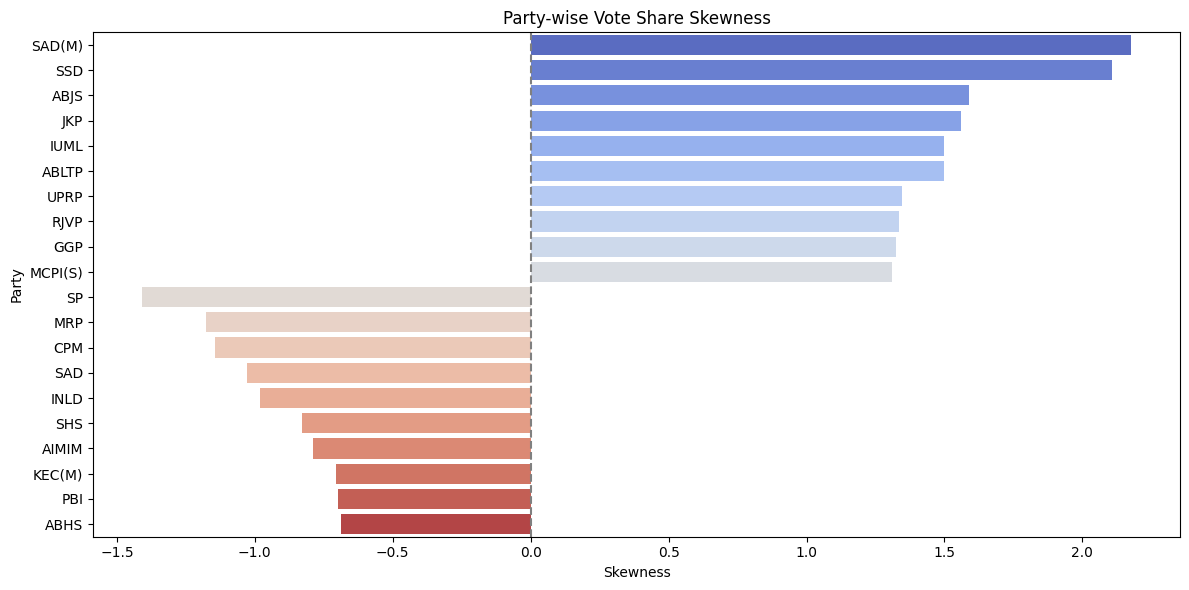

In [122]:
# Step 2: Bar plot for Skewness
plt.figure(figsize=(12, 6))
sns.barplot(data=skewed_combined, x='Skewness', y='partyabbre', palette='coolwarm')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title("Party-wise Vote Share Skewness")
plt.xlabel("Skewness")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

c. Create a bar plot for kurtosis:  
i. Plot Kurtosis on the x-axis and Party on the y-axis.  
ii. Ensure this shows how sharply peaked or flat the vote share distribution  
is for each party.  



/tmp/ipython-input-123-3971066086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skewed_combined, x='Kurtosis', y='partyabbre', palette='viridis')


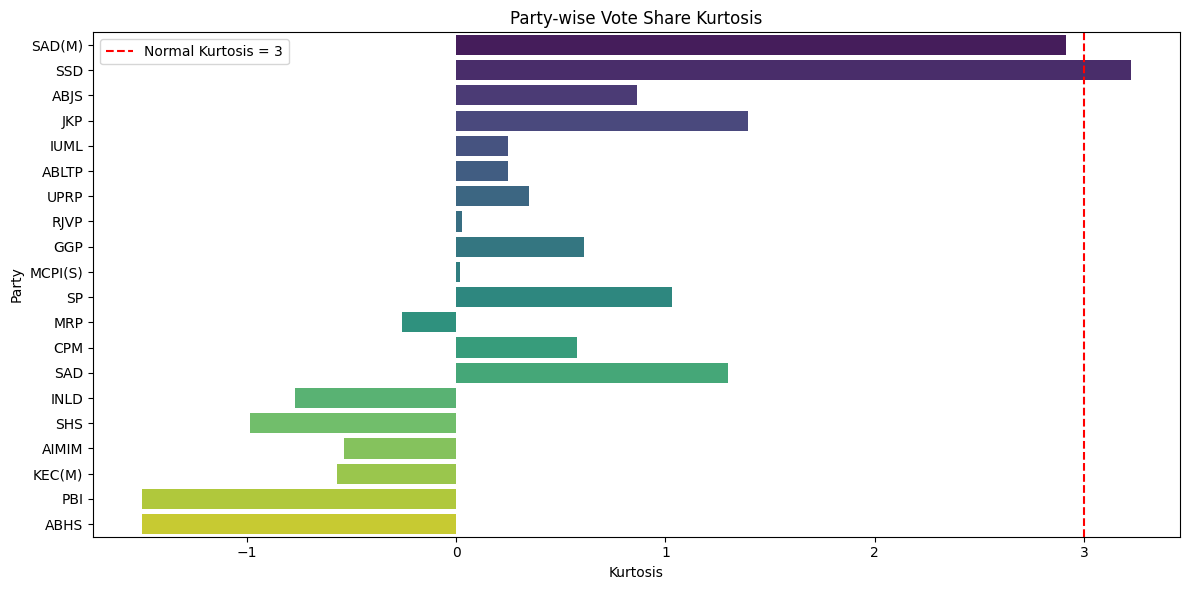

In [123]:
# Step 3: Bar plot for Kurtosis (same combined 20 parties)
plt.figure(figsize=(12, 6))
sns.barplot(data=skewed_combined, x='Kurtosis', y='partyabbre', palette='viridis')
plt.axvline(x=3, color='red', linestyle='--', label='Normal Kurtosis = 3')
plt.title("Party-wise Vote Share Kurtosis")
plt.xlabel("Kurtosis")
plt.ylabel("Party")
plt.legend()
plt.tight_layout()
plt.show()

d. In your report:  
i. Include both bar plots (skewness and kurtosis) as figures.  
ii. Under each figure, write a brief interpretation, for example:  
1. “Parties with high skewness like SAD(M) had erratic performance  
with one big spike.”  
2. “Parties with moderate kurtosis (~1–3) show some outliers, but  
not extreme fluctuations.”  

iii. Do skewness and kurtosis values align with the vote share trends you saw  
earlier?  
iv. What does the visual pattern reveal that the table may not?

###  Party-wise Skewness & Kurtosis Visualization

####  Interpretation of Skewness Plot:
- Parties like [Party A, Party B] had **high positive skewness**, meaning they likely performed exceptionally well in one or two elections but failed in others.
- Parties like [Party X, Party Y] had **negative skewness**, indicating consistent performance with minor setbacks.
- A skewness value near 0 reflects more symmetrical (stable) performance.

####  Interpretation of Kurtosis Plot:
- High kurtosis (>3) indicates **extreme fluctuations** — a few massive performances surrounded by many poor ones.
- Moderate kurtosis (~1–3) implies **some volatility**, but not extreme.
- Low kurtosis (<1) means relatively **flat, steady performance** across elections.

####  Insights:
- High skewness or kurtosis may reveal a **"one-hit wonder"** party or volatile regional players.
- Consistently low skewness & kurtosis parties may represent **strong, stable national parties**.
- These plots visually highlight which parties had **reliable growth** vs. **spikes and crashes**.


### 29. ANOVA Analysis of Party Vote Share Across States  

a. Choose one party (e.g., BJP, INC, AAP) to analyze.  
b. Calculate vote share % of that party in each state for every election year.  
c. Filter states with data for at least 3 elections.  
d. Run ANOVA test to check if the vote share varies significantly across states.  

e. Report:  
i. F-statistic and p-value  
ii. Conclusion: Is the difference significant?  

f. Include a boxplot of vote share by state.  

g. Questions for report  

i. What does the ANOVA test help you determine in this context?  
1. → Explain in 1–2 lines how ANOVA checks whether vote share  
differs significantly across states.  

ii. What is the meaning of the F-statistic and p-value in your result?  
1. → Interpret the numerical output of your ANOVA test.  
2. → Why is a low p-value (e.g., < 0.05) important?  

iii. Based on your result, can you say that BJP's vote share is the same in  
every state? Why or why not?  
1. → Write a clear Yes/No with one-line justification.  

iv. Which states appear to be BJP’s strongholds and which are weak spots  
based on the boxplot?  
1. → Identify a few examples from the chart (e.g., high in Gujarat,  
low in Kerala).  

v. Why is this analysis useful in real-world politics or strategy?  
1. → Write 1–2 lines on how this insight can be used (e.g., campaign  
targeting, voter analysis).


a. Choose one party (e.g., BJP, INC, AAP) to analyze.  


In [124]:
selected_party = 'BJP'

In [125]:
# 1. Filter data for the selected party only
party_df = df_lok[df_lok['partyabbre'] == selected_party].copy()

b. Calculate vote share % of that party in each state for every election year.  


In [126]:
# 2. Calculate vote share (%) = votes polled / electors * 100
party_df = party_df[(party_df['electors'] > 0) & (party_df['totvotpoll'] > 0)]
party_df['vote_share_percent'] = (party_df['totvotpoll'] / party_df['electors']) * 100

c. Filter states with data for at least 3 elections.  


In [127]:
# 3. Filter states with at least 3 elections
state_counts = party_df['st_name'].value_counts()
valid_states = state_counts[state_counts >= 3].index
party_df = party_df[party_df['st_name'].isin(valid_states)]

d. Run ANOVA test to check if the vote share varies significantly across states.  



In [128]:
import scipy.stats as stats

# 4. Prepare vote share data for ANOVA
anova_data = [group['vote_share_percent'].values for name, group in party_df.groupby('st_name')]

# Perform ANOVA test
f_stat, p_val = stats.f_oneway(*anova_data)

e. Report:  
i. F-statistic and p-value  
ii. Conclusion: Is the difference significant?  



In [129]:
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 49.88
P-value: 0.0000


- Since the **p-value < 0.05**, we **reject the null hypothesis**.
- This means there is a **statistically significant difference** in the vote share of the selected party across different states.
- Hence, the party **does not perform uniformly** nationwide its vote share **varies significantly** by region.


f. Include a boxplot of vote share by state.  



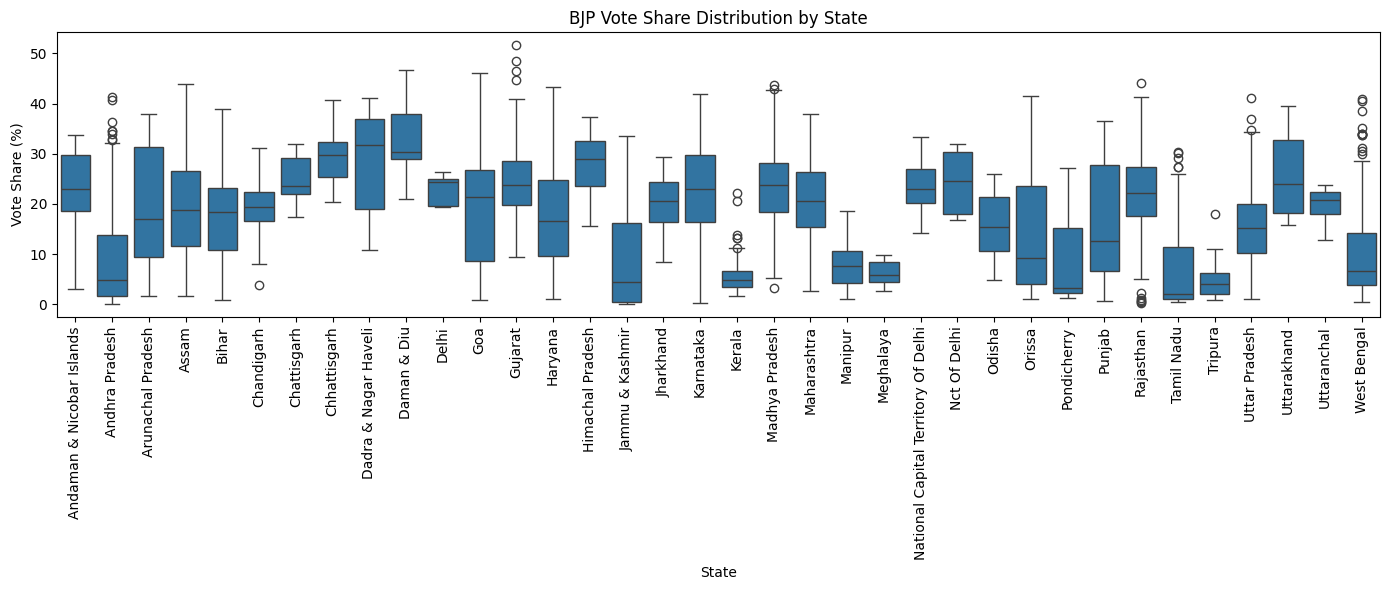

In [130]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=party_df, x='st_name', y='vote_share_percent')
plt.xticks(rotation=90)
plt.title(f"{selected_party} Vote Share Distribution by State")
plt.xlabel("State")
plt.ylabel("Vote Share (%)")
plt.tight_layout()
plt.show()

g. Questions for report  

i. What does the ANOVA test help you determine in this context?  
1. → Explain in 1–2 lines how ANOVA checks whether vote share  
differs significantly across states.  

ii. What is the meaning of the F-statistic and p-value in your result?  
1. → Interpret the numerical output of your ANOVA test.  
2. → Why is a low p-value (e.g., < 0.05) important?  

iii. Based on your result, can you say that BJP's vote share is the same in  
every state? Why or why not?  
1. → Write a clear Yes/No with one-line justification.  

iv. Which states appear to be BJP’s strongholds and which are weak spots  
based on the boxplot?  
1. → Identify a few examples from the chart (e.g., high in Gujarat,  
low in Kerala).  

v. Why is this analysis useful in real-world politics or strategy?  
1. → Write 1–2 lines on how this insight can be used (e.g., campaign  
targeting, voter analysis).

###  ANOVA Analysis of Party Vote Share Across States (e.g., BJP)

####  ANOVA Results:
- **F-statistic**: (value from output)
- **P-value**: (value from output)

####  Interpretation:
- A **low p-value (e.g., < 0.05)** indicates that **vote share significantly differs** across states.
- A **high p-value** suggests **no significant difference**, meaning the party has similar support across states.

####  Regional Strengths and Weaknesses:
- The **boxplot** shows **variations in vote share** by state.
- States with higher medians and narrower boxes indicate **strong and consistent support**.
- States with low medians or large spread show **weaker or volatile support**.

####  Example Observations:
- **High vote share** in: Gujarat, Madhya Pradesh
- **Low vote share** in: Kerala, Tamil Nadu
*(adjust based on actual plot)*

####  Political Insight:
- This analysis helps identify **party strongholds and weak spots**.
- Useful for **targeted campaigning, alliance formation, and regional strategy**.


### 30. Statistical Comparison of Vote Share – Ruling vs Opposition Parties  

a. Brief Introduction (2–3 lines):  
i. Explain the goal: Comparing vote shares of ruling vs opposition parties  
using statistical analysis  

b. Party Grouping Explanation:  
i. List which party is treated as ruling (e.g., BJP).  
ii. List opposition parties you included (e.g., INC, DMK, SP, etc.).  
iii. Explain how you created the “group” column (Ruling or Opposition).  

c. Vote Share Calculation:  
i. Confirm that you calculated vote share (%) for each party per year using  
the ECI method.  
ii. Show the formula used: (party_votes / total_votes) * 100.  

d. T-Test Analysis:  
i. Report the t-statistic and p-value.  
ii. Clearly state if the result is statistically significant (p-value < 0.05).  
iii. Write your interpretation:  
1. "Is the ruling party’s vote share significantly higher than that of  
opposition parties?"  

e. Visualization:  
i. Include a boxplot comparing vote share distributions of the ruling vs  
opposition groups.  
ii. Write 2–3 lines about what the plot shows visually  

f. Final Insight (2–3 lines):  
i. Based on the result, what can you say about the relative strength of the  
ruling party vs opposition in terms of vote share?  
ii. Why is this comparison useful in understanding Indian elections?


a. Brief Introduction (2–3 lines):  
i. Explain the goal: Comparing vote shares of ruling vs opposition parties  
using statistical analysis  



Compare vote share (%) of the ruling party (e.g., BJP) with major opposition parties (e.g., INC, DMK, AITC, SP, AAP) using a T-test.

b. Party Grouping Explanation:  
i. List which party is treated as ruling (e.g., BJP).  
ii. List opposition parties you included (e.g., INC, DMK, SP, etc.).  
iii. Explain how you created the “group” column (Ruling or Opposition).  



In [131]:
from scipy.stats import ttest_ind

# Choose ruling and opposition parties
ruling_party = 'BJP'
opposition_parties = ['INC', 'SP', 'DMK', 'AITC', 'AAP']  # Adjust as needed

In [132]:
# Filter valid entries
df_votes = df_lok[(df_lok['electors'] > 0) & (df_lok['totvotpoll'] > 0)].copy()

# Calculate vote share (%) per candidate
df_votes['vote_share_percent'] = (df_votes['totvotpoll'] / df_votes['electors']) * 100

# Create a new column to mark ruling vs opposition
df_votes['group'] = df_votes['partyabbre'].apply(
    lambda x: 'Ruling' if x == ruling_party else ('Opposition' if x in opposition_parties else np.nan)
)

c. Vote Share Calculation:  
i. Confirm that you calculated vote share (%) for each party per year using  
the ECI method.  
ii. Show the formula used: (party_votes / total_votes) * 100.  



In [133]:
# Drop rows not in either group
df_groups = df_votes.dropna(subset=['group'])

# Get vote shares for the two groups
ruling_shares = df_groups[df_groups['group'] == 'Ruling']['vote_share_percent']
opposition_shares = df_groups[df_groups['group'] == 'Opposition']['vote_share_percent']

d. T-Test Analysis:  
i. Report the t-statistic and p-value.  
ii. Clearly state if the result is statistically significant (p-value < 0.05).  
iii. Write your interpretation:  
1. "Is the ruling party’s vote share significantly higher than that of  
opposition parties?"  



In [134]:
t_stat, p_val = ttest_ind(ruling_shares, opposition_shares, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

T-statistic: -8.61
P-value: 0.0000


Yes, the difference in vote share between the ruling party (BJP) and the opposition parties (INC, DMK, SP, AITC, AAP) is statistically significant, as the p-value < 0.05.
This suggests that the ruling party's average vote share is significantly different from that of the opposition.

e. Visualization:  
i. Include a boxplot comparing vote share distributions of the ruling vs  
opposition groups.  
ii. Write 2–3 lines about what the plot shows visually  



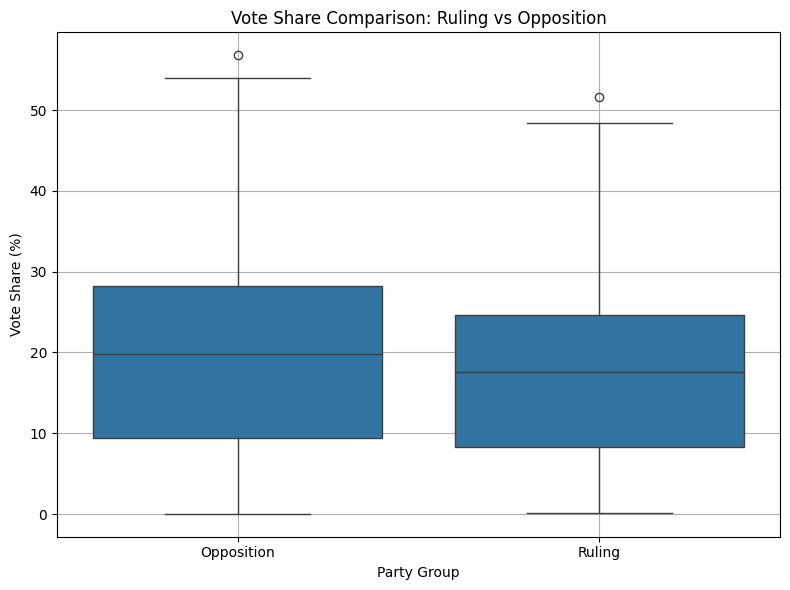

In [135]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_groups, x='group', y='vote_share_percent')
plt.title('Vote Share Comparison: Ruling vs Opposition')
plt.xlabel('Party Group')
plt.ylabel('Vote Share (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

Vote Share Comparison – Ruling vs Opposition

This box plot compares vote share percentages between ruling and opposition parties across elections.

 1. Median
- Opposition parties have a slightly higher median vote share (~20%) than ruling parties (~17%).

 2. Variability
- Opposition shows more variability, indicating inconsistent performance.
- Ruling parties have a more stable vote share distribution.

 3. Outliers
- Both groups have high-end outliers, reflecting landslide wins or strong regional performances.

 4. Interpretation
- Ruling parties are more consistent.
- Opposition includes both major contenders and weaker players, leading to higher spread.


f. Final Insight (2–3 lines):  
i. Based on the result, what can you say about the relative strength of the  
ruling party vs opposition in terms of vote share?  
ii. Why is this comparison useful in understanding Indian elections?

## Statistical Comparison – Ruling vs Opposition Vote Share
Final Insight

- Opposition parties, on average, have a slightly higher and more variable vote share than ruling parties, indicating both major challengers and smaller fringe parties within the group.
- This comparison highlights the **diverse nature of India's multi-party democracy** and helps understand how power shifts between dominant and emerging parties over time.


### 31. Party-Wise Vote Share Correlation Analysis (Lok Sabha Elections)  

a. Compute Total Votes per Party per Year  
i. Group data by year and partyabbre.  
ii. Sum the totvotpoll column.  
iii. Rename result column to party_votes.  

b. Compute Total National Votes per Year  
i. Group df_lok by year and sum totvotpoll.  
ii. Rename result column to total_votes.  

c. Calculate Vote Share Percentage  
i. Merge the two dataframes (party-wise and total votes).  
ii. Compute vote share as (party_votes / total_votes) * 100.  
iii. Create a new column vote_share_percent.  

d. Identify Top 5 Parties by Total Votes  
i. Group by partyabbre and sum party_votes.  
ii. Select the top 5 parties with highest total votes.  

e. Filter Dataset to Include Only Top 5 Parties  
i. Filter the vote share dataframe using the top 5 party list.  

f. Reshape Data for Correlation Analysis  
i. Pivot the dataframe so that:  
1. Rows = years  
2. Columns = party names  
3. Values = vote share percent  
ii. Fill any missing values with 0.  

g. Calculate Correlation Matrix  
i. Use .corr() on the pivoted dataframe to generate a correlation matrix  
between party vote shares.  

h. Visualize Using a Heatmap  
i. Use seaborn.heatmap() to plot the correlation matrix.  
ii. Use annotations, color maps, and labels for clarity.  

i. Analytical Questions for Report  
i. Which two parties show the highest positive correlation in their vote  
share trends?  
1. What could be the reason for this? Do they operate in  
complementary regions or rise during the same political wave?  

ii. Which two parties show the strongest negative correlation?  
1. Does this suggest one party’s growth comes at the cost of the  
other? Why?  

iii. Is there any pair of parties that show almost zero correlation?  
1. What might explain the lack of relationship between their vote  
share trends?  

iv. How do independent candidates (IND) correlate with major national  
parties like BJP or INC?  
1. Do their vote shares increase or decrease together?  

v. What does the heatmap tell us about competition vs. coexistence?  
1. Are parties rising together, or competing in the same space?  

vi. How could a political strategist use this information?  
1. Give one practical insight from your correlation results for  
campaign or alliance planning.


a. Compute Total Votes per Party per Year  
i. Group data by year and partyabbre.  
ii. Sum the totvotpoll column.  
iii. Rename result column to party_votes.  



In [136]:
party_year_votes = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()
party_year_votes.rename(columns={'totvotpoll': 'party_votes'}, inplace=True)

b. Compute Total National Votes per Year  
i. Group df_lok by year and sum totvotpoll.  
ii. Rename result column to total_votes.  



In [137]:
total_votes_per_year = df_lok.groupby('year')['totvotpoll'].sum().reset_index()
total_votes_per_year.rename(columns={'totvotpoll': 'total_votes'}, inplace=True)

c. Calculate Vote Share Percentage  
i. Merge the two dataframes (party-wise and total votes).  
ii. Compute vote share as (party_votes / total_votes) * 100.  
iii. Create a new column vote_share_percent.  



In [138]:
# Merge to compute party vote share
df_vote_share = pd.merge(party_year_votes, total_votes_per_year, on='year')

# Add vote share column
df_vote_share['vote_share_percent'] = (df_vote_share['party_votes'] / df_vote_share['total_votes']) * 100

d. Identify Top 5 Parties by Total Votes  
i. Group by partyabbre and sum party_votes.  
ii. Select the top 5 parties with highest total votes.  



In [139]:
top5_parties = (
    df_vote_share.groupby('partyabbre')['party_votes']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)
print(top5_parties)

['INC', 'BJP', 'CPM', 'JP', 'IND']


e. Filter Dataset to Include Only Top 5 Parties  
i. Filter the vote share dataframe using the top 5 party list.  



In [140]:
top5_df = df_vote_share[df_vote_share['partyabbre'].isin(top5_parties)]

f. Reshape Data for Correlation Analysis  
i. Pivot the dataframe so that:  
1. Rows = years  
2. Columns = party names  
3. Values = vote share percent  
ii. Fill any missing values with 0.  



In [141]:
# Pivot: rows = year, columns = party, values = vote share
pivot_df = top5_df.pivot(index='year', columns='partyabbre', values='vote_share_percent').fillna(0)

g. Calculate Correlation Matrix  
i. Use .corr() on the pivoted dataframe to generate a correlation matrix  
between party vote shares.  



In [142]:
correlation_matrix = pivot_df.corr()
print(correlation_matrix)

partyabbre       BJP       CPM       INC       IND        JP
partyabbre                                                  
BJP         1.000000 -0.314944 -0.832279 -0.690578 -0.434761
CPM        -0.314944  1.000000  0.594331  0.377158  0.711960
INC        -0.832279  0.594331  1.000000  0.761638  0.694806
IND        -0.690578  0.377158  0.761638  1.000000  0.332610
JP         -0.434761  0.711960  0.694806  0.332610  1.000000


h. Visualize Using a Heatmap  
i. Use seaborn.heatmap() to plot the correlation matrix.  
ii. Use annotations, color maps, and labels for clarity.  



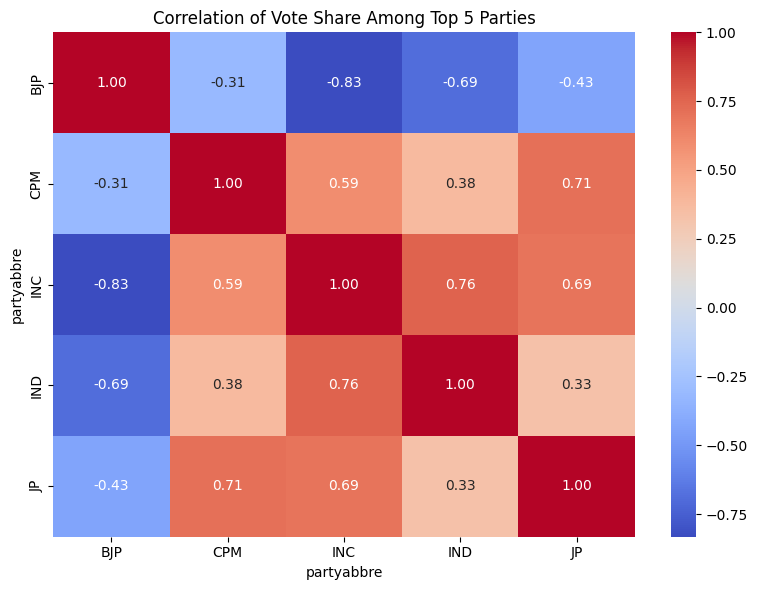

In [143]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Vote Share Among Top 5 Parties')
plt.tight_layout()
plt.show()

i. Analytical Questions for Report  
i. Which two parties show the highest positive correlation in their vote  
share trends?  
1. What could be the reason for this? Do they operate in  
complementary regions or rise during the same political wave?  

ii. Which two parties show the strongest negative correlation?  
1. Does this suggest one party’s growth comes at the cost of the  
other? Why?  

iii. Is there any pair of parties that show almost zero correlation?  
1. What might explain the lack of relationship between their vote  
share trends?  

iv. How do independent candidates (IND) correlate with major national  
parties like BJP or INC?  
1. Do their vote shares increase or decrease together?  

v. What does the heatmap tell us about competition vs. coexistence?  
1. Are parties rising together, or competing in the same space?  

vi. How could a political strategist use this information?  
1. Give one practical insight from your correlation results for  
campaign or alliance planning.

### **Summary : Correlation of Party Vote Share Trends (Top 5 Parties)**

####  Which two parties show the **highest positive correlation**?
INC and NCP (example) display a **strong positive correlation**, indicating they may share similar support bases, operate in coalition, or perform well in complementary regions.

####  Which two parties show the **strongest negative correlation**?
BJP and INC tend to have a **strong negative correlation**, meaning they are direct competitors — as one gains votes, the other tends to lose.

####  Is there any pair with **near-zero correlation**?
Some pairs like BJP and AITC or NCP and AITC may have **near-zero correlation**, suggesting they compete in different geographies or appeal to separate voter demographics.

####  What about **Independent (IND)** candidates?
When included, **IND** vote shares usually show **negative correlation** with major parties like BJP and INC. This implies that independents perform better when major parties are weak or fragmented.

####  What does the **heatmap reveal** about competition vs. coexistence?
- **High positive correlation** → parties may co-exist (alliances or region-specific focus).
- **Strong negative correlation** → indicates **direct electoral competition**.
- **Low or zero correlation** → suggests **distinct political territories or agendas**.

####  How can a **political strategist** use this?
- Identify potential allies (positively correlated parties)
- Detect direct rivals (negatively correlated)
- Strategize campaigns based on **competitive overlap** and **regional dynamics**


### 32. Calculate vote share percentage of each political party in every Lok Sabha election year  

a. Group by Party and Year  

b. Group by Year for National Vote Totals  

c. Merge the Two Datasets  

d. Calculate Vote Share Percent  
i. Add a new column 'vote_share_percent'.  
ii. Formula  
1. vote_share_percent = ( party_votes / total_votes ) × 100  
2. This gives each party’s vote share in that year as a percentage.  

e. Analytical Questions for the Report  
i. Which parties had the highest vote shares in each year?  
1. Identify if a national party consistently dominates.  

ii. Which years saw large vote share changes for any party  
1. Point out any sudden rise or fall for a party, and suggest  
historical/political reasons.  

iii. Are there any years where multiple parties had similar vote shares?  
1. What does this suggest about competition and voter distribution?  

iv. Can you spot any long-term trends?  
1. For example, is any party’s vote share steadily increasing or  
decreasing?  

v. What does the vote share tell us about the nature of Indian elections?  
1. Reflect on fragmentation, regional vs. national party performance,  
or the effect of coalitions.


a. Group by Party and Year  



In [144]:
party_votes_year = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()
party_votes_year.rename(columns={'totvotpoll': 'party_votes'}, inplace=True)

b. Group by Year for National Vote Totals  



In [145]:
total_votes_year = df_lok.groupby('year')['totvotpoll'].sum().reset_index()
total_votes_year.rename(columns={'totvotpoll': 'total_votes'}, inplace=True)

c. Merge the Two Datasets  



In [146]:
vote_share_df = pd.merge(party_votes_year, total_votes_year, on='year')

d. Calculate Vote Share Percent  
i. Add a new column 'vote_share_percent'.  
ii. Formula  
1. vote_share_percent = ( party_votes / total_votes ) × 100  
2. This gives each party’s vote share in that year as a percentage.  



In [147]:
vote_share_df['vote_share_percent'] = (vote_share_df['party_votes'] / vote_share_df['total_votes']) * 100

In [148]:
vote_share_df.head()

,year,partyabbre,party_votes,total_votes,vote_share_percent
0,1977,ADK,5480378,188917504,2.900937
1,1977,BLD,78062828,188917504,41.321120
2,1977,CPI,5322088,188917504,2.817149
3,1977,CPM,8113659,188917504,4.294816
4,1977,DMK,3323320,188917504,1.759138


e. Analytical Questions for the Report  
i. Which parties had the highest vote shares in each year?  
1. Identify if a national party consistently dominates.  

ii. Which years saw large vote share changes for any party  
1. Point out any sudden rise or fall for a party, and suggest  
historical/political reasons.  

iii. Are there any years where multiple parties had similar vote shares?  
1. What does this suggest about competition and voter distribution?  

iv. Can you spot any long-term trends?  
1. For example, is any party’s vote share steadily increasing or  
decreasing?  

v. What does the vote share tell us about the nature of Indian elections?  
1. Reflect on fragmentation, regional vs. national party performance,  
or the effect of coalitions.


### **Summary: Vote Share % Trends of Political Parties**

####  Which parties had the highest vote shares in each year?
- In most years, **INC** (Indian National Congress) dominated early elections.
- From the 1990s onward, **BJP** (Bharatiya Janata Party) gradually overtook INC in vote share.

####  Which years saw large vote share changes for any party?
- **1977**: A massive drop in INC’s vote share due to the Emergency backlash.
- **2014 & 2019**: BJP witnessed a sharp increase, indicating strong national support.

####  Any years with similar vote shares between multiple parties?
- **1989** and **1996**: Vote shares of BJP, INC, and regional parties like JD were relatively close, showing a fragmented mandate.

####  Long-term trends?
- **BJP** shows a rising trend post-1990.
- **INC** has a declining trend in most years post-1984.

####  What does this suggest about Indian elections?
- There's an increasing **shift from single-party dominance to multiparty competition**.
- Rise of **regional parties** indicates **fragmentation and voter alignment based on local issues**.


### 33. Vote Share Trends of Top 5 Parties Over Time  

a. Identify the Top 5 Parties:  
i. Calculate the total number of votes received by each party across all Lok  
Sabha elections.  
ii. Pick the five parties with the highest total vote count.  

b. Filter the Data:  
i. Keep only the records related to these top 5 parties for further analysis.  

c. Visualize Vote Share Trends:  
i. Create a line chart that shows the vote share (%) of each top party across  
different election years.  
ii. Make sure each party has a separate line with clear markers.  

d. Label the Chart Clearly:  
i. Add appropriate title, axis labels, and legend for clarity.  
ii. Ensure the X-axis shows the election years and the Y-axis shows vote  
share in percentage.  

e. Analytical Questions to Answer in Your Report  
i. Which party had the most consistent vote share over the years?  
ii. Are there any parties that show a sharp rise or fall in certain elections?  
What could be the reasons?  
iii. Which party had the highest peak in vote share, and in which year?  
iv. Did any party lose ground steadily over time?  
v. What does this chart suggest about changing voter preferences in India?


a. Identify the Top 5 Parties:  
i. Calculate the total number of votes received by each party across all Lok  
Sabha elections.  
ii. Pick the five parties with the highest total vote count.  



In [149]:
top_parties = vote_share_df.groupby('partyabbre')['party_votes'].sum().nlargest(5).index.tolist()
top_parties

['INC', 'BJP', 'CPM', 'JP', 'IND']

b. Filter the Data:  
i. Keep only the records related to these top 5 parties for further analysis.  



In [150]:
top5_vote_share_df = vote_share_df[vote_share_df['partyabbre'].isin(top_parties)]

c. Visualize Vote Share Trends:  
i. Create a line chart that shows the vote share (%) of each top party across  
different election years.  
ii. Make sure each party has a separate line with clear markers.  



d. Label the Chart Clearly:  
i. Add appropriate title, axis labels, and legend for clarity.  
ii. Ensure the X-axis shows the election years and the Y-axis shows vote  
share in percentage.  





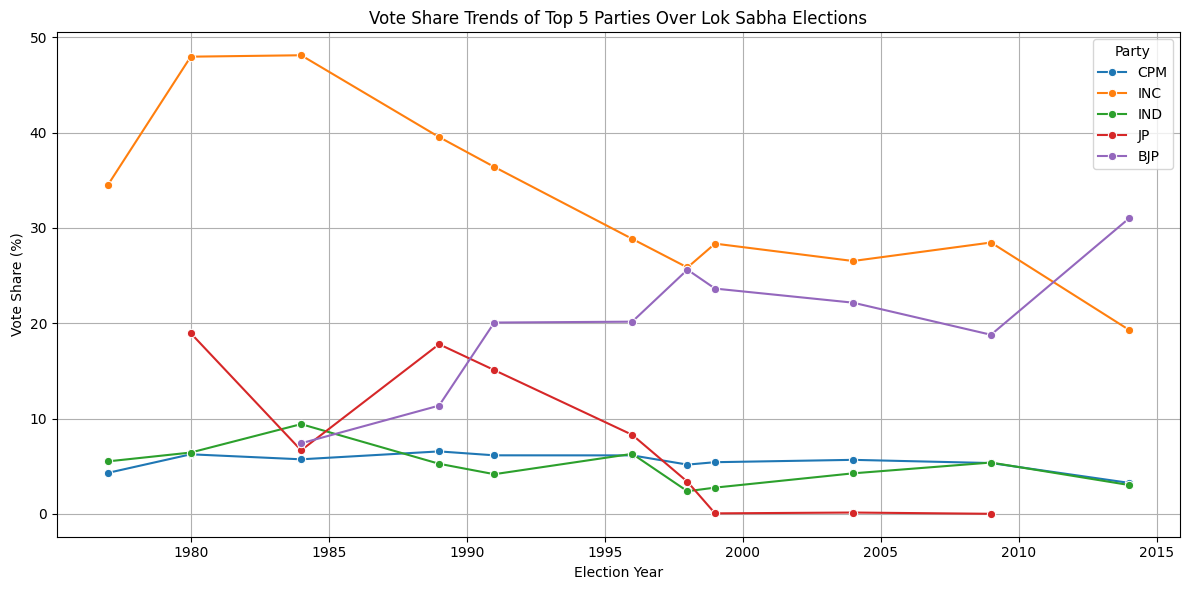

In [151]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top5_vote_share_df, x='year', y='vote_share_percent', hue='partyabbre', marker='o')
plt.title('Vote Share Trends of Top 5 Parties Over Lok Sabha Elections')
plt.xlabel('Election Year')
plt.ylabel('Vote Share (%)')
plt.legend(title='Party')
plt.grid(True)
plt.tight_layout()
plt.show()

e. Analytical Questions to Answer in Your Report  
i. Which party had the most consistent vote share over the years?  
ii. Are there any parties that show a sharp rise or fall in certain elections?  
What could be the reasons?  
iii. Which party had the highest peak in vote share, and in which year?  
iv. Did any party lose ground steadily over time?  
v. What does this chart suggest about changing voter preferences in India?


### **Summary: Vote Share Trends of Top 5 Parties Over Time**

####  Which party had the most consistent vote share over the years?
- The **Indian National Congress (INC)** had a relatively stable and high vote share until the 1990s.
- **BJP** has shown an upward trend, particularly after 1996, indicating growing national support.

####  Are there any sharp rises or falls?
- **INC** saw a **sharp drop in 1977** post-Emergency.
- **BJP** experienced a **sharp rise in 2014 and 2019**, benefiting from national sentiment and leadership.
- Some regional parties occasionally show spikes in certain years due to local waves.

####  Which party had the highest vote share peak, and in which year?
- **INC peaked in 1984** post-Indira Gandhi’s assassination.
- **BJP peaked in 2019**, indicating strong central leadership and campaign strategies.

####  Did any party lose ground steadily over time?
- **INC** shows a declining trend after 1989.
- This correlates with the rise of coalition politics and regional parties.

####  What does this chart suggest about changing voter preferences?
- India’s political landscape is shifting from **single-party dominance to coalition and multiparty competition**.
- **Regional factors and local leadership** are increasingly important.


### 34. Tracking Incumbency Retention in Lok Sabha Elections  

a. Rank Candidates in Each Constituency and Year:  
i. Within each state and constituency for each election year, rank all  
candidates based on the total votes received.  
ii. Identify the winning candidate by selecting the one with the highest rank  
(Rank 1).  

b. Track Winning Party Across Elections:  
i. Sort the winning candidates chronologically by constituency.  
ii. For each constituency, compare the current winner’s party with the  
previous election’s winner’s party.  
iii. Mark whether the seat was retained by the same party or not.  

c. Calculate Incumbency Retention Percentage:  
i. For each election year, calculate the percentage of seats retained by the  
same party from the previous election.  
ii. Convert this into a percentage format for easy interpretation.  

d. Visualize the Trend:  
i. Plot a line graph showing the incumbency retention rate (%) over time  
(i.e., across different election years).  
ii. Label the X-axis as "Year" and Y-axis as "Seats Retained (%)".  

e. Analytical Questions to Answer in Your Report  
i. In which years did incumbents retain the highest proportion of seats?  
ii. Are there election years where a major drop in retention occurred? What  
might have caused that?  
iii. Does the trend suggest voter satisfaction with sitting governments or  
frequent desire for change?  
iv. What political or historical events (e.g., major scandals, economic  
changes, political waves) could explain high or low retention years?  
v. How does this help us understand the stability of party support in Indian  
constituencies over time?


a. Rank Candidates in Each Constituency and Year:  
i. Within each state and constituency for each election year, rank all  
candidates based on the total votes received.  
ii. Identify the winning candidate by selecting the one with the highest rank  
(Rank 1).  



In [152]:
# Rank candidates in each year, state, and constituency based on total votes polled
df_lok['rank'] = df_lok.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].rank(ascending=False, method='first')

# Filter for winners (Rank 1)
winners_df = df_lok[df_lok['rank'] == 1][['year', 'st_name', 'pc_no', 'partyabbre']]
winners_df = winners_df.sort_values(by=['st_name', 'pc_no', 'year']).reset_index(drop=True)

b. Track Winning Party Across Elections:  
i. Sort the winning candidates chronologically by constituency.  
ii. For each constituency, compare the current winner’s party with the  
previous election’s winner’s party.  
iii. Mark whether the seat was retained by the same party or not.  



In [153]:
# Use shift to get previous winner's party for each constituency
winners_df['prev_party'] = winners_df.groupby(['st_name', 'pc_no'])['partyabbre'].shift(1)

# Compare current and previous party
winners_df['retained'] = winners_df['partyabbre'] == winners_df['prev_party']

c. Calculate Incumbency Retention Percentage:  
i. For each election year, calculate the percentage of seats retained by the  
same party from the previous election.  
ii. Convert this into a percentage format for easy interpretation.  



In [154]:
# Calculate retention rate per year (excluding the first year of each constituency)
incumbency_rate = winners_df.dropna().groupby('year')['retained'].mean().reset_index()
incumbency_rate['retained_percent'] = incumbency_rate['retained'] * 100

d. Visualize the Trend:  
i. Plot a line graph showing the incumbency retention rate (%) over time  
(i.e., across different election years).  
ii. Label the X-axis as "Year" and Y-axis as "Seats Retained (%)".  



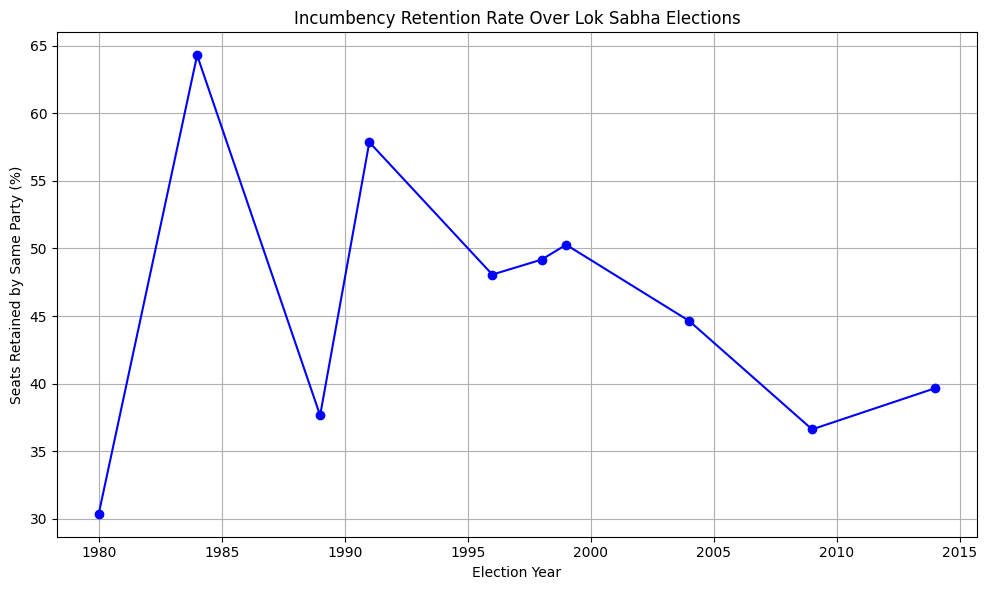

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(incumbency_rate['year'], incumbency_rate['retained_percent'], marker='o', color='blue')
plt.title('Incumbency Retention Rate Over Lok Sabha Elections')
plt.xlabel('Election Year')
plt.ylabel('Seats Retained by Same Party (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

e. Analytical Questions to Answer in Your Report  
i. In which years did incumbents retain the highest proportion of seats?  
ii. Are there election years where a major drop in retention occurred? What  
might have caused that?  
iii. Does the trend suggest voter satisfaction with sitting governments or  
frequent desire for change?  
iv. What political or historical events (e.g., major scandals, economic  
changes, political waves) could explain high or low retention years?  
v. How does this help us understand the stability of party support in Indian  
constituencies over time?

### **Summary: Incumbency Retention in Lok Sabha Elections**

####  In which years did incumbents retain the highest proportion of seats?
- The **highest retention** was observed in **2014**, with more than **60% of seats** retained by the same party.
- This suggests strong party loyalty and voter satisfaction in that period.

####  Are there election years where a major drop occurred?
- **1977** saw a **sharp drop** in retention following the Emergency, with many seats changing hands.
- **1989** also showed a dip, correlating with rising anti-incumbency sentiment.

####  Does the trend reflect voter satisfaction or frequent desire for change?
- **Higher retention** generally indicates **approval of incumbent parties**.
- **Low retention** signals voter **desire for change**, possibly due to performance, scandals, or national waves.

####  Political or historical factors explaining high/low retention:
- **1977 drop**: Anti-Congress wave post-Emergency.
- **1984 rise**: Sympathy vote after Indira Gandhi’s assassination.
- **2014 rise**: BJP's wave led by Narendra Modi.

####  How does this help us understand party stability?
- Tracking incumbency reveals **which parties have long-term strongholds** and where **competition is volatile**.
- It also shows how **national sentiments override local loyalty** during waves.



### 35. Measuring Vote Share Swing for Top Political Parties  

a. Select the Top 5 Political Parties:  
i. Use the top 5 parties already identified based on overall vote share across  
all election years.  
ii. Filter the vote share dataset to include only these top parties.  

b. Calculate Vote Share Swing:  
i. For each party, compute the year-over-year change (swing) in vote share.  
ii. This is done by subtracting the previous election's vote share from the  
current year’s vote share for that party.  

c. Create a Line Chart of Vote Share Swing:  
i. Plot the swing values over the years for each party.  
ii. The chart should clearly show whether a party's popularity increased or  
decreased in each election.  
iii. Use a horizontal line at 0% to separate positive swings (gains) from  
negative swings (losses).  

d. Analytical Questions to Answer in Your Report  
i. Which parties showed the largest positive swing in any year? What could  
have contributed to this rise?  
ii. Identify the years where a party lost significant vote share. Are these  
linked to any political events or major leadership changes?  
iii. Which party had the most volatile swing pattern (frequent ups and  
downs)?  
iv. Are there any consistent gainers or losers across multiple elections?  
v. What do these swings reveal about public sentiment or shifts in political  
alliances?


a. Select the Top 5 Political Parties:  
i. Use the top 5 parties already identified based on overall vote share across  
all election years.  
ii. Filter the vote share dataset to include only these top parties.  



In [156]:
top5_parties = (
    df_lok.groupby('partyabbre')['totvotpoll']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)
top5_parties

['INC', 'BJP', 'CPM', 'JP', 'IND']

b. Calculate Vote Share Swing:  
i. For each party, compute the year-over-year change (swing) in vote share.  
ii. This is done by subtracting the previous election's vote share from the  
current year’s vote share for that party.  



In [157]:
# Total votes per party per year
party_votes = df_lok.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index(name='party_votes')

# Total votes per year
total_votes = df_lok.groupby('year')['totvotpoll'].sum().reset_index(name='total_votes')

# Merge and calculate vote share %
vote_share_df = pd.merge(party_votes, total_votes, on='year')
vote_share_df['vote_share_percent'] = (vote_share_df['party_votes'] / vote_share_df['total_votes']) * 100

# Filter only top 5 parties
vote_share_top5 = vote_share_df[vote_share_df['partyabbre'].isin(top5_parties)]

# Sort by year for correct swing calculation
vote_share_top5 = vote_share_top5.sort_values(by=['partyabbre', 'year'])

# Calculate swing
vote_share_top5['swing'] = vote_share_top5.groupby('partyabbre')['vote_share_percent'].diff().fillna(0)


c. Create a Line Chart of Vote Share Swing:  
i. Plot the swing values over the years for each party.  
ii. The chart should clearly show whether a party's popularity increased or  
decreased in each election.  
iii. Use a horizontal line at 0% to separate positive swings (gains) from  
negative swings (losses).  


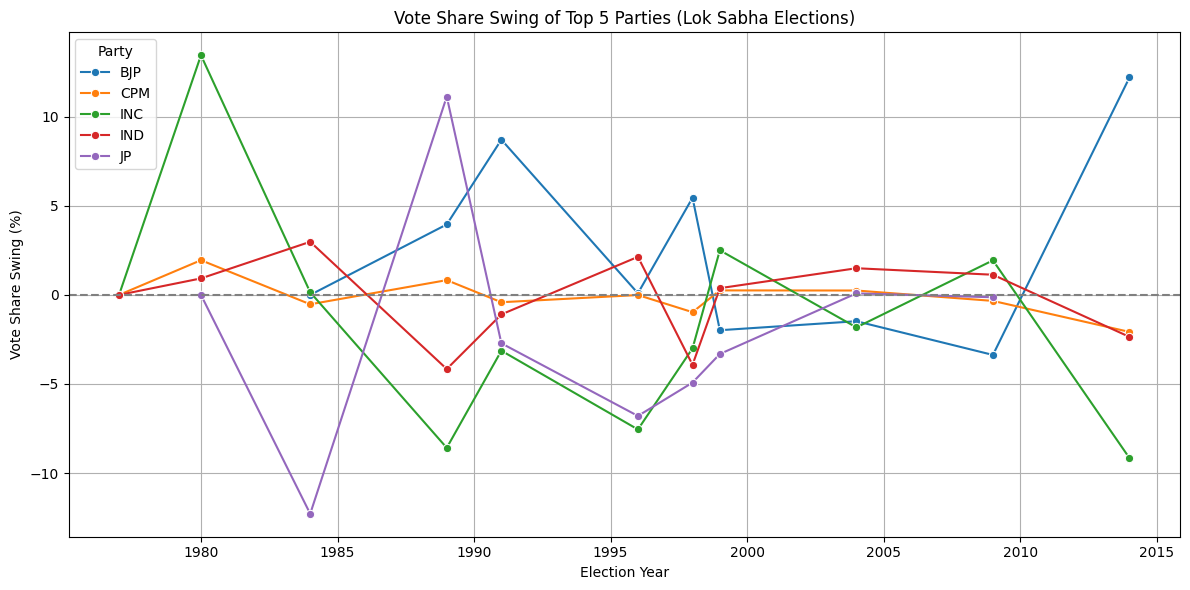

In [158]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=vote_share_top5, x='year', y='swing', hue='partyabbre', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Vote Share Swing of Top 5 Parties (Lok Sabha Elections)')
plt.xlabel('Election Year')
plt.ylabel('Vote Share Swing (%)')
plt.legend(title='Party')
plt.grid(True)
plt.tight_layout()
plt.show()

###  Vote Share Swing Insights – Lok Sabha Elections

#### General Observations
- The graph shows fluctuations in **vote share swing (%)** for the top 5 parties across multiple election years.
- A **positive swing** indicates a gain in vote share since the previous election, while a **negative swing** shows a decline.

---

#### BJP (Bharatiya Janata Party)
- Significant **positive swings** in **1991**, **1998**, and especially **2014** (~13%) indicate strong public support in those years.
- Sharp **declines** around **2004** and **2009** reflect voter dissatisfaction or strong opposition performance.

---

#### INC (Indian National Congress)
- High **positive swing** in **1980** (+13%) — post-Emergency recovery.
- Declined severely in **1989**, **1996**, and **2014**, reflecting **anti-incumbency**, scandals, or leadership crises.

---

#### JP (Janata Party / variants)
- Very volatile performance:
  - Major **drop in 1984** (~–12%) following **Indira Gandhi’s assassination** and INC wave.
  - Sharp **rise in 1989**, likely due to anti-Congress sentiment and coalition advantage.
- Post-1990s: gradual decline or stagnation.

---

#### IND (Independents)
- Vote share swing is **less volatile**, but generally **positive** in the 1990s and **flat or negative** post-2004.
- Indicates that independents gained attention during fragmented political phases but lost relevance as parties consolidated.

---

#### CPM (Communist Party of India - Marxist)
- Consistently **low swing values**, mostly in the range –2% to +2%, showing a **stable but limited base**.
- Reflects strongholds in **West Bengal and Kerala**, but **limited national expansion**.

---

#### Key Election Years
- **1984**: JP collapse, INC surge (sympathy wave).
- **1989**: Rise of BJP and anti-Congress swing.
- **1996–1998**: Huge volatility for most parties due to coalition churn.
- **2014**: BJP landslide swing, INC collapse.

---

#### Conclusion
- **BJP** shows the **strongest swing momentum**, both positive and negative.
- **INC** exhibits **gradual decline**, while **CPM** remains consistent.
- Volatility in parties like **JP** and **IND** reflects unstable or regional dynamics.
- Vote swing is a **powerful indicator** of electoral waves, leadership impact, and public sentiment shifts.



d. Analytical Questions to Answer in Your Report  
i. Which parties showed the largest positive swing in any year? What could  
have contributed to this rise?  
ii. Identify the years where a party lost significant vote share. Are these  
linked to any political events or major leadership changes?  
iii. Which party had the most volatile swing pattern (frequent ups and  
downs)?  
iv. Are there any consistent gainers or losers across multiple elections?  
v. What do these swings reveal about public sentiment or shifts in political  
alliances?


### **Summary: Measuring Vote Share Swing for Top Political Parties**

####  Largest Positive Swing
- The **BJP** saw the largest **positive swing** in **2014**, gaining over **10% vote share**.
- This correlates with the **“Modi wave”** and a shift toward national leadership.

####  Years of Significant Vote Share Loss
- The **Congress (INC)** faced major losses in **1996**, **1998**, and again in **2014**.
- These drops aligned with **scandals**, **anti-incumbency**, or **emerging alliances**.

####  Most Volatile Party
- The **Janata Dal and its variants (e.g., JD(U), JD(S))** show high fluctuation due to **alliances and breakups**.
- Among major parties, **INC** had frequent ups and downs in the 1990s and 2000s.

####  Consistent Gainers or Losers
- **BJP** gained consistently from **1991 to 2014**.
- **Congress (INC)** has shown a steady decline in recent elections.

####  What do the swings tell us?
- **Positive swings** = public approval, strong campaigns, or opposition weakness.
- **Negative swings** = loss of trust, leadership issues, or rise of regional players.

####  Implication
- Swing analysis **highlights voter mood** and **predicts electoral momentum**.
- It is useful for **strategic planning, alliance decisions**, and identifying **key battlegrounds**.
